In [1]:
!pip3 install flake8 pycodestyle_magic

In [2]:
!pip3 install scikit-learn==0.24


     |████████████████████████████████| 22.3 MB 861 kB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.2 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 0.24.0 which is incompatible.


In [3]:
from pickle import Unpickler as Upck
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn import tree
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, DotProduct
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, normalize
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, ShuffleSplit, KFold, RepeatedKFold, LeaveOneOut, LeavePOut, StratifiedKFold, RepeatedStratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer

from scipy.stats import normaltest, norm, gamma, chisquare, f_oneway, kruskal, spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor  as vif 

pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)

%load_ext pycodestyle_magic
%pycodestyle_on

# Récupération des données

In [15]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', sep=',')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', sep=',')
y = df_train[['SalePrice']]

In [16]:
# Visualisation train
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
# Visualisation train
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [18]:
print('df_train: ', df_train.shape)
print('df_test: ', df_test.shape)

df_train:  (1460, 81)
df_test:  (1459, 80)


In [19]:
# check the column are equal
df_train.columns.values[:-1].tolist() == df_test.columns.values.tolist()

True

In [20]:
# Count of NA values %
df_train.count()/df_train.shape[0]

Id               1.000000
MSSubClass       1.000000
MSZoning         1.000000
LotFrontage      0.822603
LotArea          1.000000
Street           1.000000
Alley            0.062329
LotShape         1.000000
LandContour      1.000000
Utilities        1.000000
LotConfig        1.000000
LandSlope        1.000000
Neighborhood     1.000000
Condition1       1.000000
Condition2       1.000000
BldgType         1.000000
HouseStyle       1.000000
OverallQual      1.000000
OverallCond      1.000000
YearBuilt        1.000000
YearRemodAdd     1.000000
RoofStyle        1.000000
RoofMatl         1.000000
Exterior1st      1.000000
Exterior2nd      1.000000
MasVnrType       0.994521
MasVnrArea       0.994521
ExterQual        1.000000
ExterCond        1.000000
Foundation       1.000000
BsmtQual         0.974658
BsmtCond         0.974658
BsmtExposure     0.973973
BsmtFinType1     0.974658
BsmtFinSF1       1.000000
BsmtFinType2     0.973973
BsmtFinSF2       1.000000
BsmtUnfSF        1.000000
TotalBsmtSF 

In [21]:
# Suppress columns too empty
limit = 0.6

for col in df_train:
    if df_train[col].count()/df_train.shape[0] < limit:
        del(df_train[col])
        del(df_test[col])
        print('col deleted', col)

df_train.head()

col deleted Alley
col deleted FireplaceQu
col deleted PoolQC
col deleted Fence
col deleted MiscFeature


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [22]:
# Check there is no negative value or outliers
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [23]:
# Look at the columns types
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [24]:
# values.count() per feature
# we can see that many feature contains almost times the same value
# this kind of feature is useless for any model
for col in df_train:
    if df_train[col].dtypes == 'object':
        print(df_train[col].value_counts(), '\n')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Pave    1454
Grvl       6
Name: Street, dtype: int64 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 

Norm      1260
Feedr     

### check the link between categorical value and 'SalePrice'

MSZoning :  3.0807239995999556e-57
Street :  0.08012555757743882
LotShape :  1.6403232738441862e-32
LandContour :  1.0479232964716673e-07
Utilities :  0.5233079667064577
LotConfig :  3.297912123318503e-07
LandSlope :  0.1395379643115706
Neighborhood :  6.696799031738868e-168
Condition1 :  6.492599567606712e-13
Condition2 :  0.013031585671629023
BldgType :  2.500857956442707e-14
HouseStyle :  1.3885066980303377e-36
RoofStyle :  1.5807327219164252e-07
RoofMatl :  0.008597464371448
Exterior1st :  1.6944856533946873e-56
Exterior2nd :  1.0476359663623384e-51
MasVnrType :  1.8268011798676196e-59
ExterQual :  8.180798192071324e-148
ExterCond :  1.8323647163959772e-09
Foundation :  2.169096402016262e-103
BsmtQual :  1.265030205346026e-136
BsmtCond :  2.0726962079526017e-13


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


BsmtExposure :  6.34355767661834e-30
BsmtFinType1 :  2.4134040375820298e-62
BsmtFinType2 :  0.05027077499679824
Heating :  3.3312797209470924e-06
HeatingQC :  6.036448505067046e-76
CentralAir :  5.319641624535031e-33
Electrical :  1.93221822133569e-27
KitchenQual :  4.720112898518107e-143
Functional :  1.2741797160981692e-05
GarageType :  8.166414793120863e-89
GarageFinish :  1.9747749828598703e-110
GarageQual :  1.3605580197843262e-12
GarageCond :  2.419814088459915e-12
PavedDrive :  7.012267959594329e-26
SaleType :  9.119744067696711e-30
SaleCondition :  1.663313168753084e-34


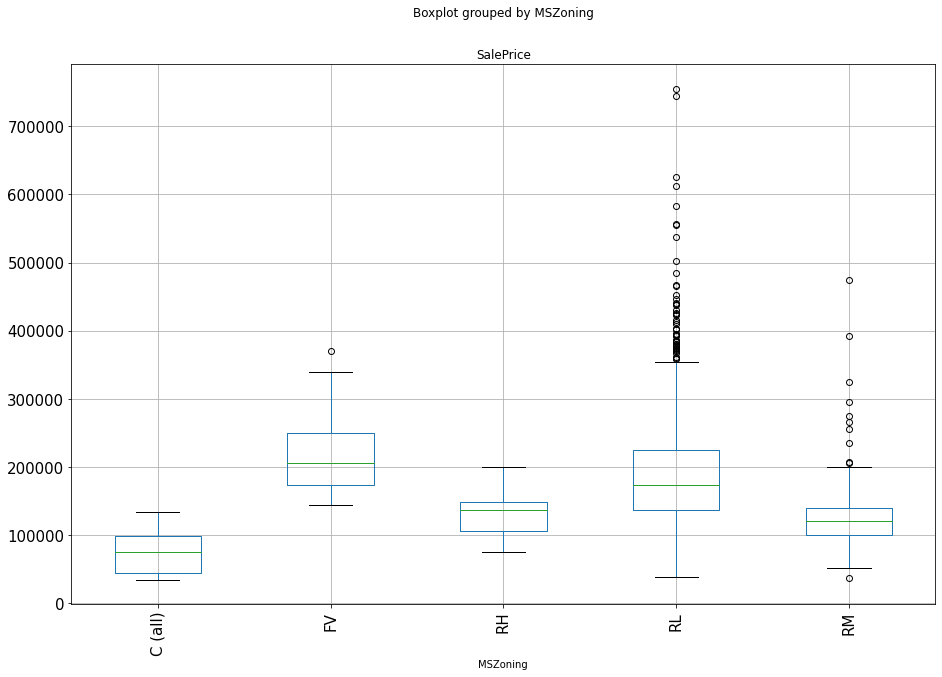

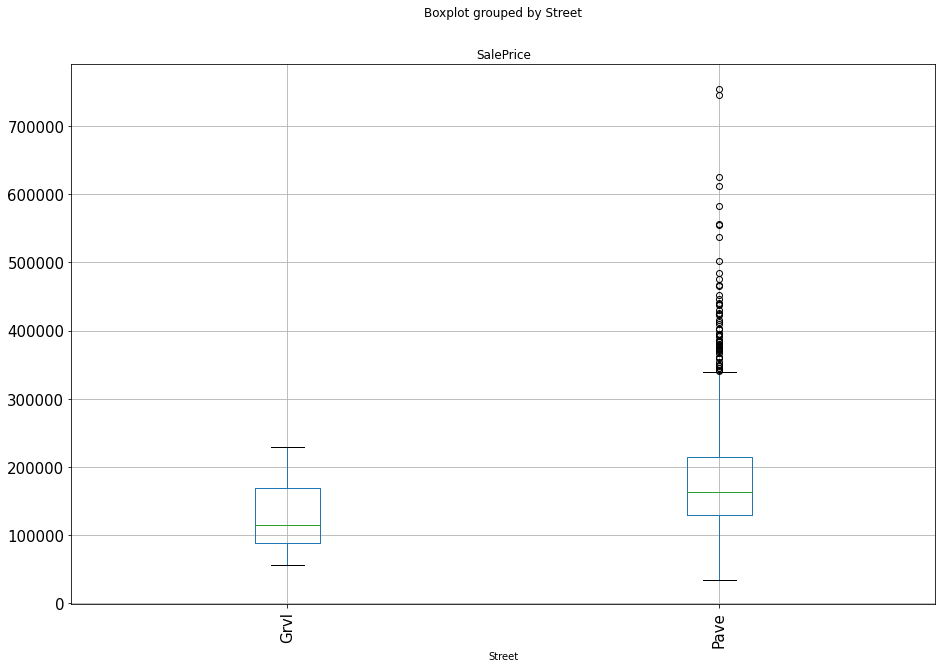

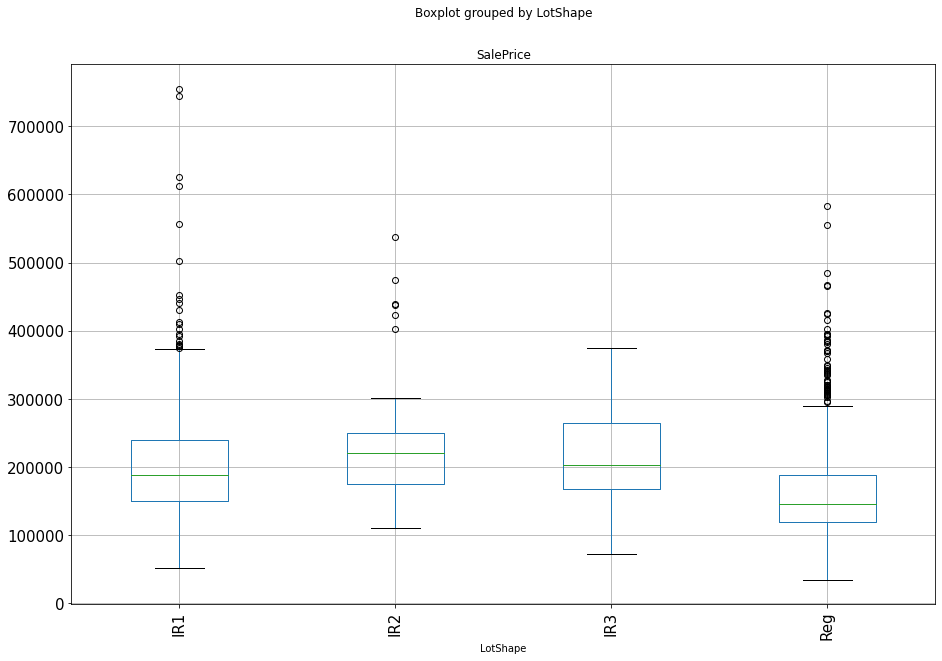

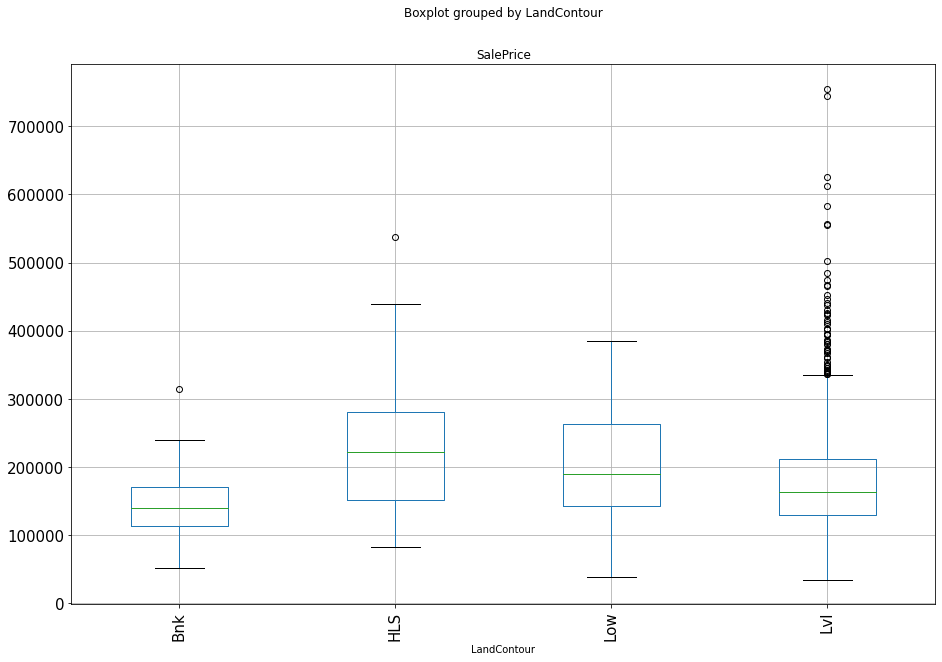

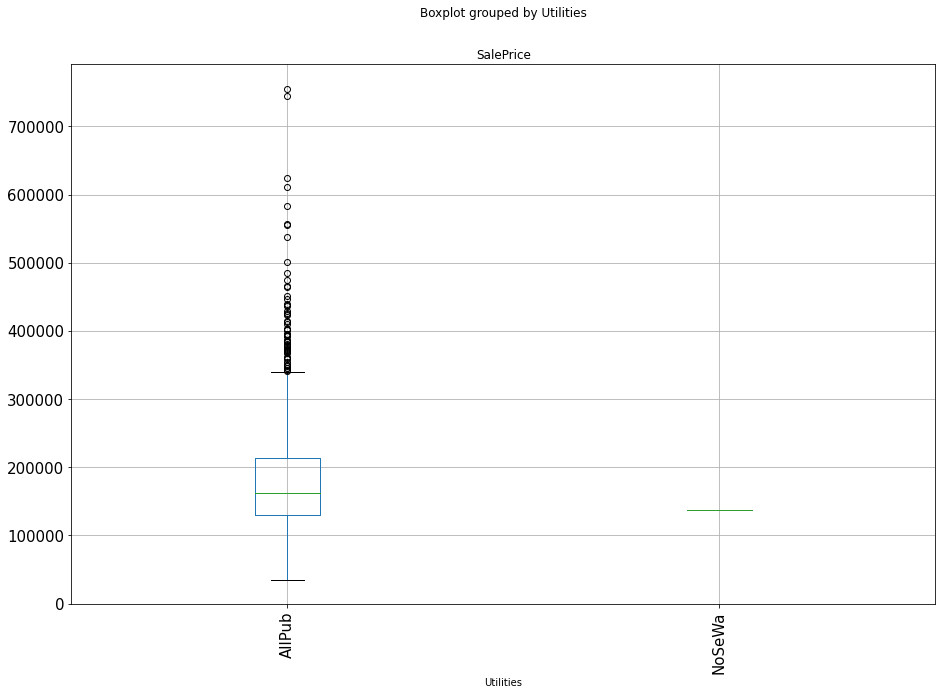

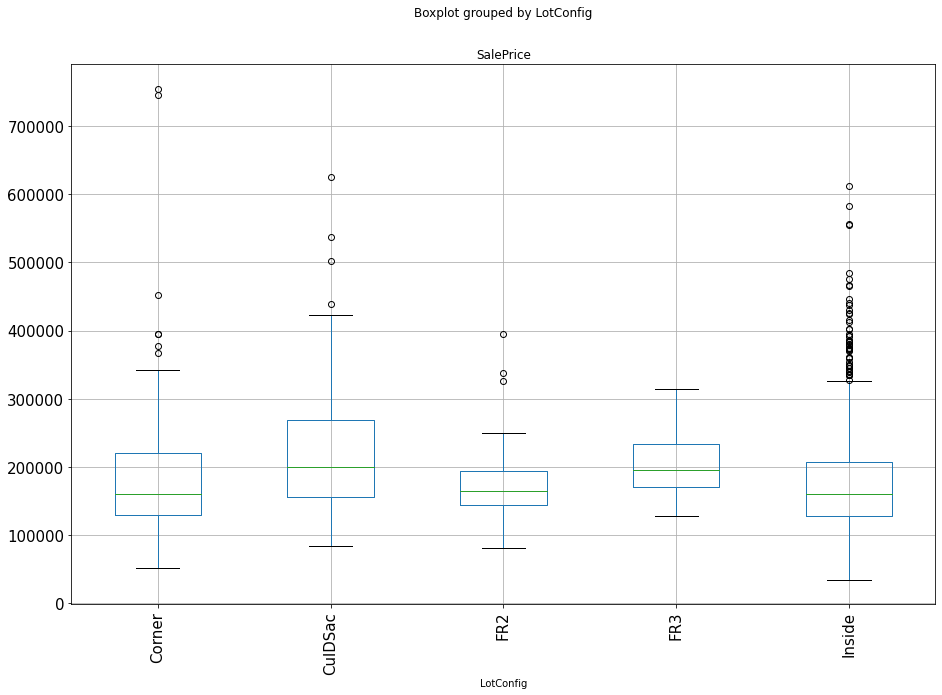

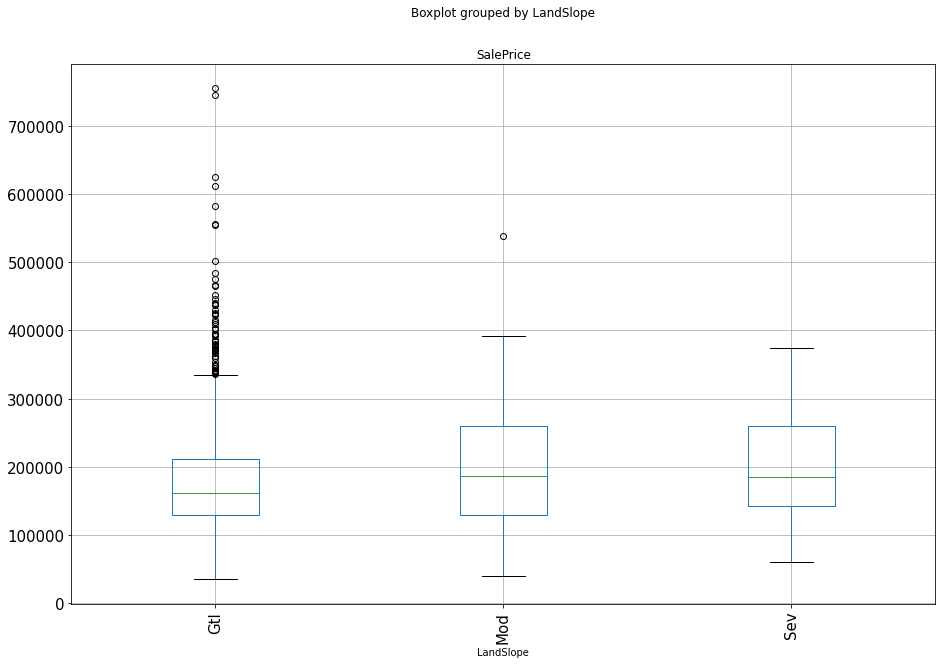

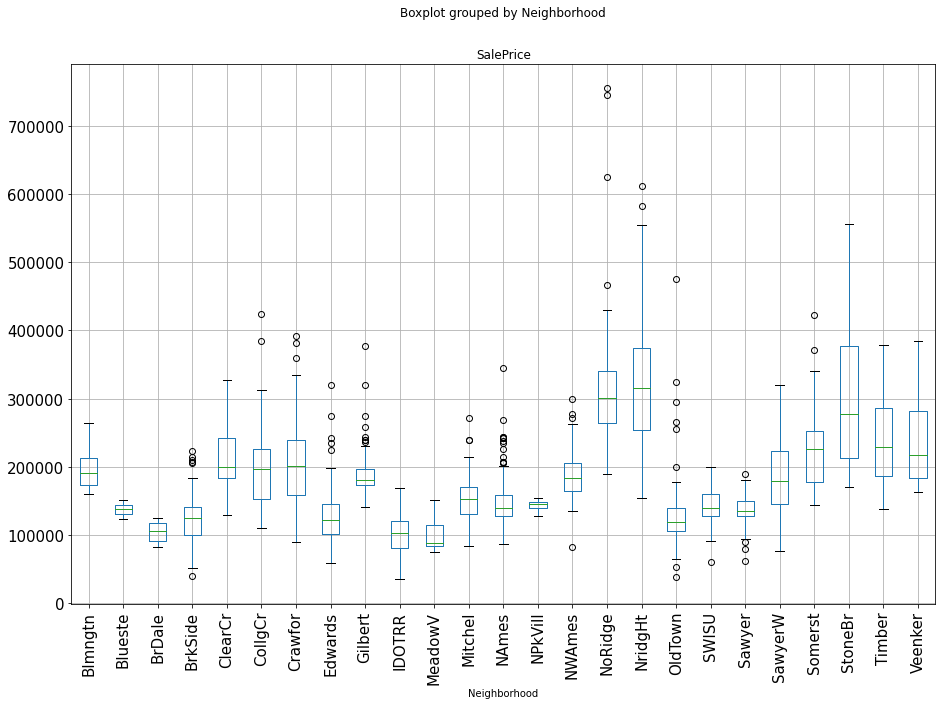

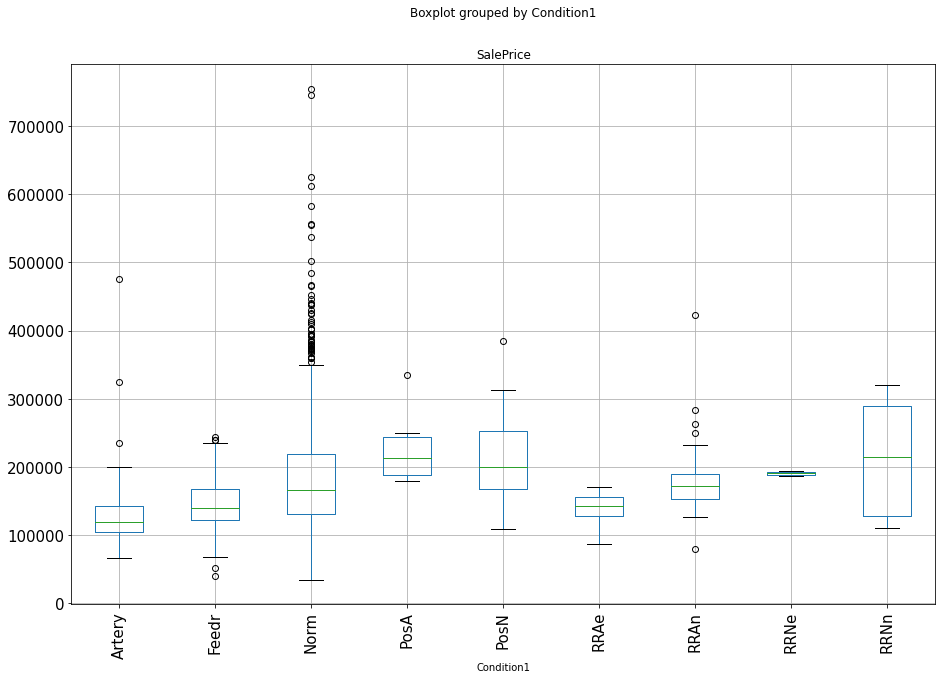

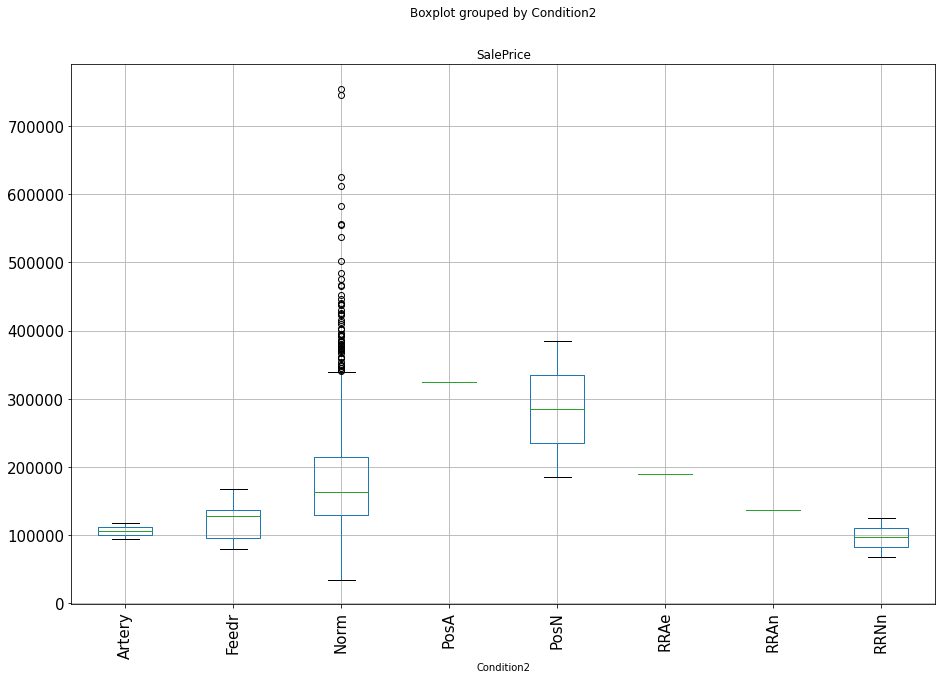

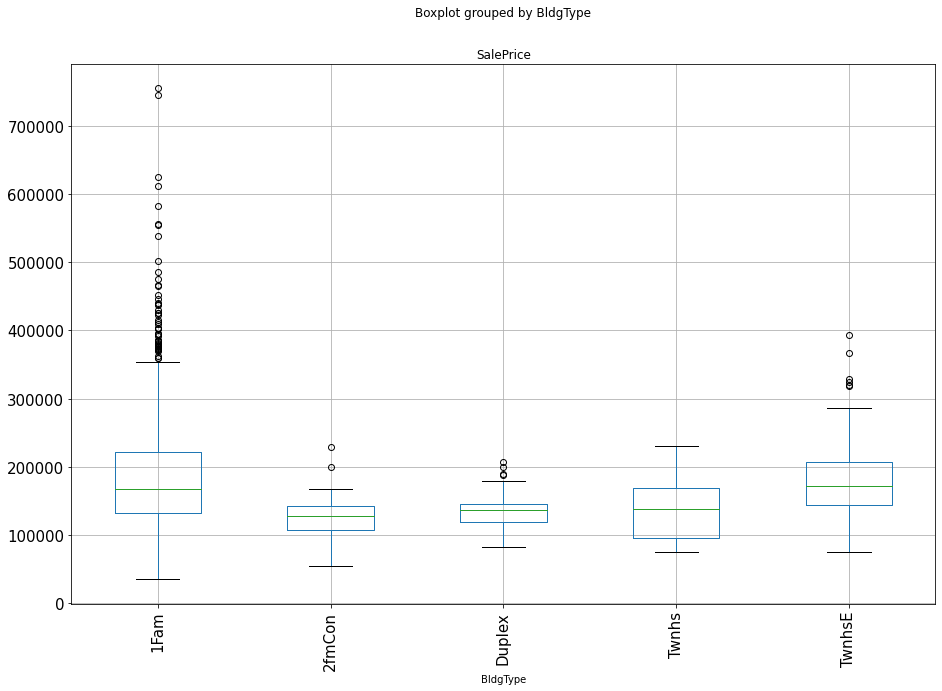

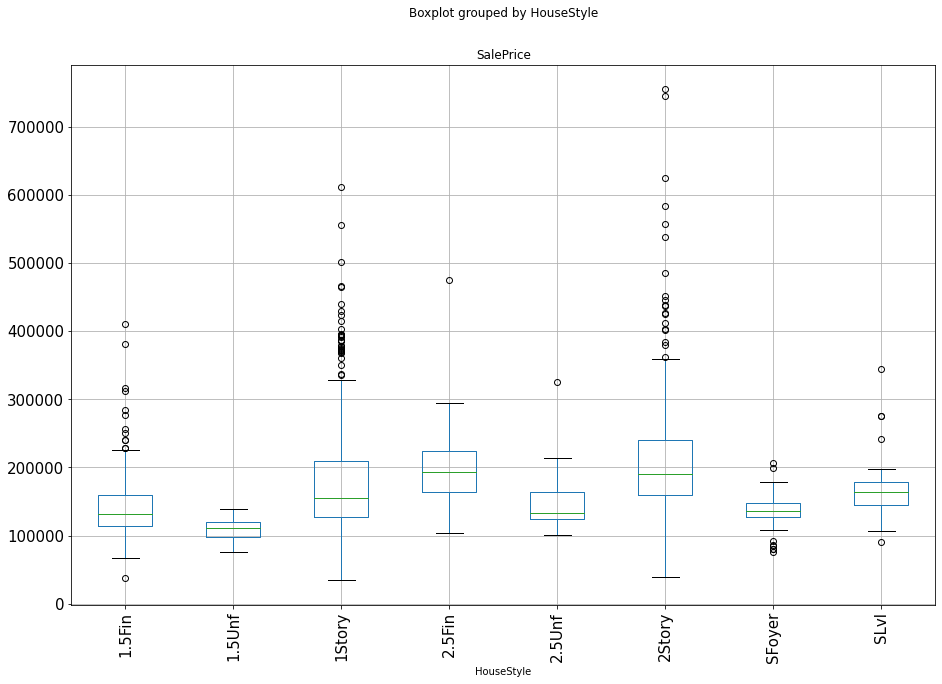

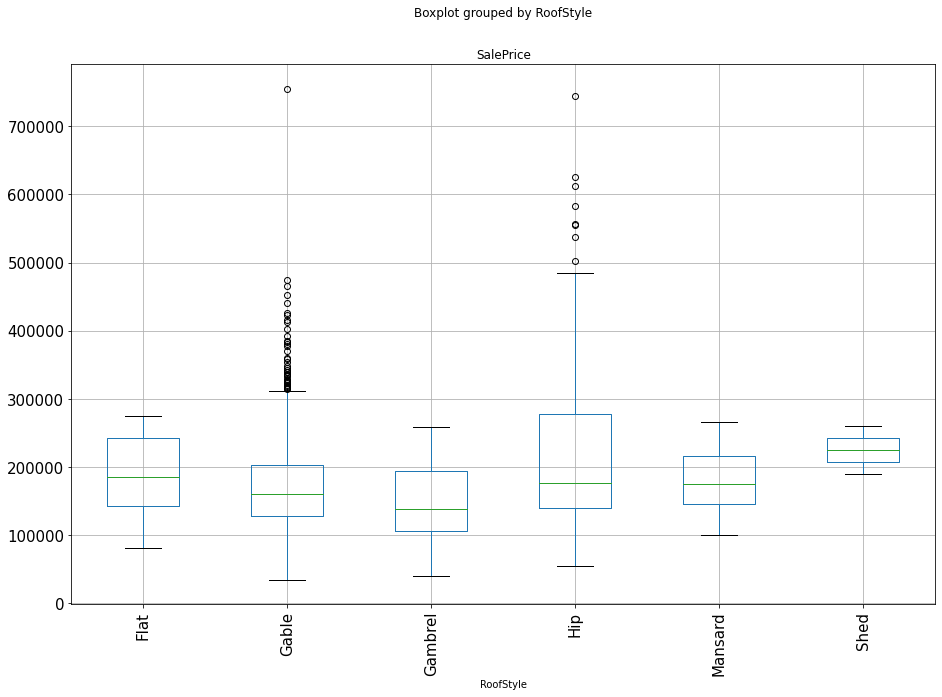

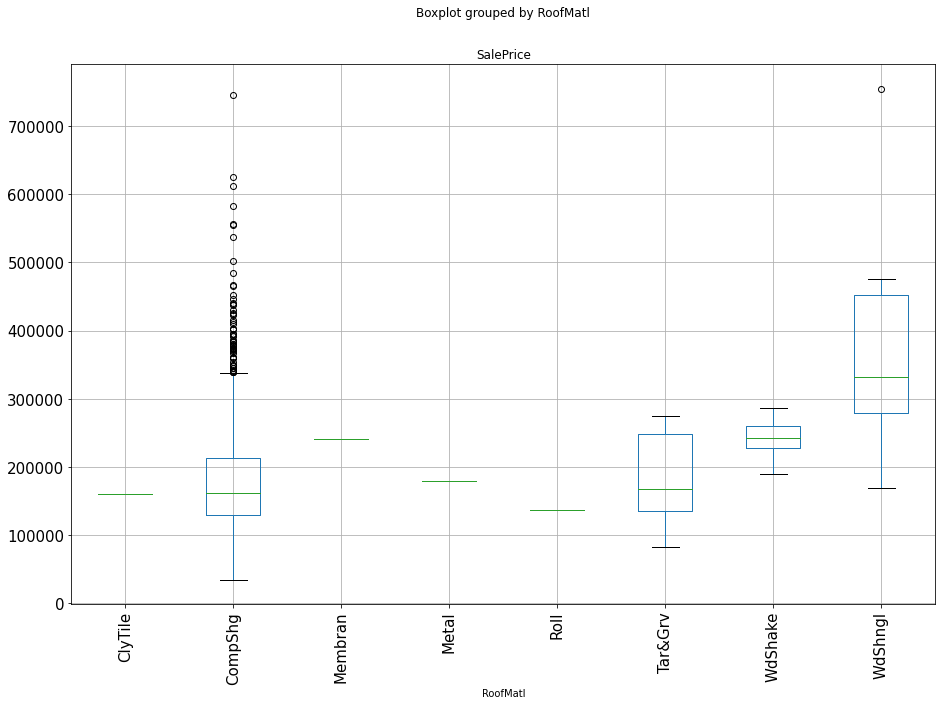

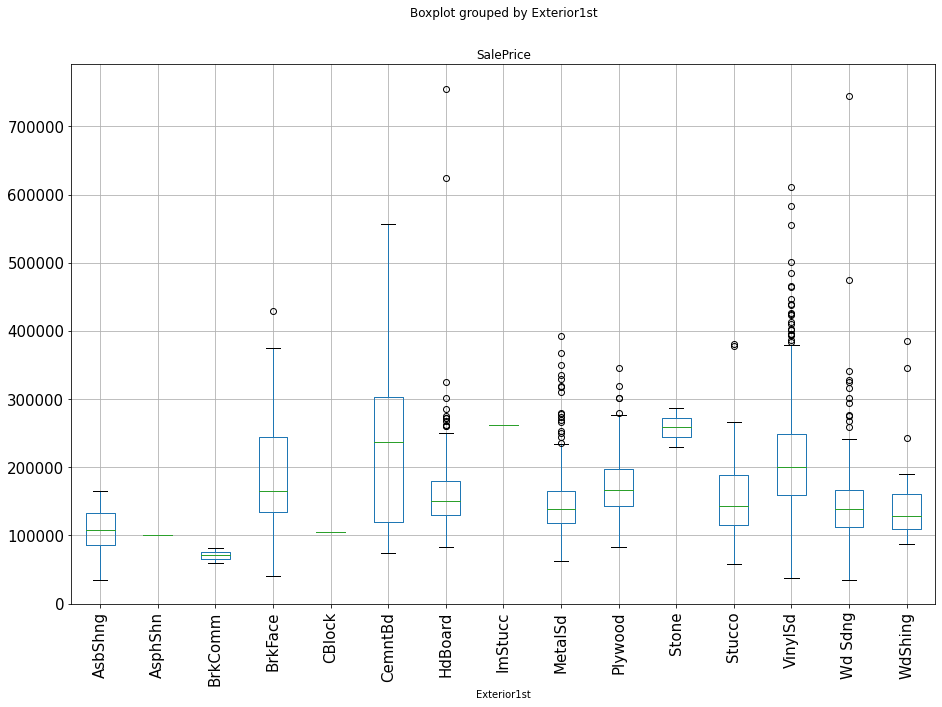

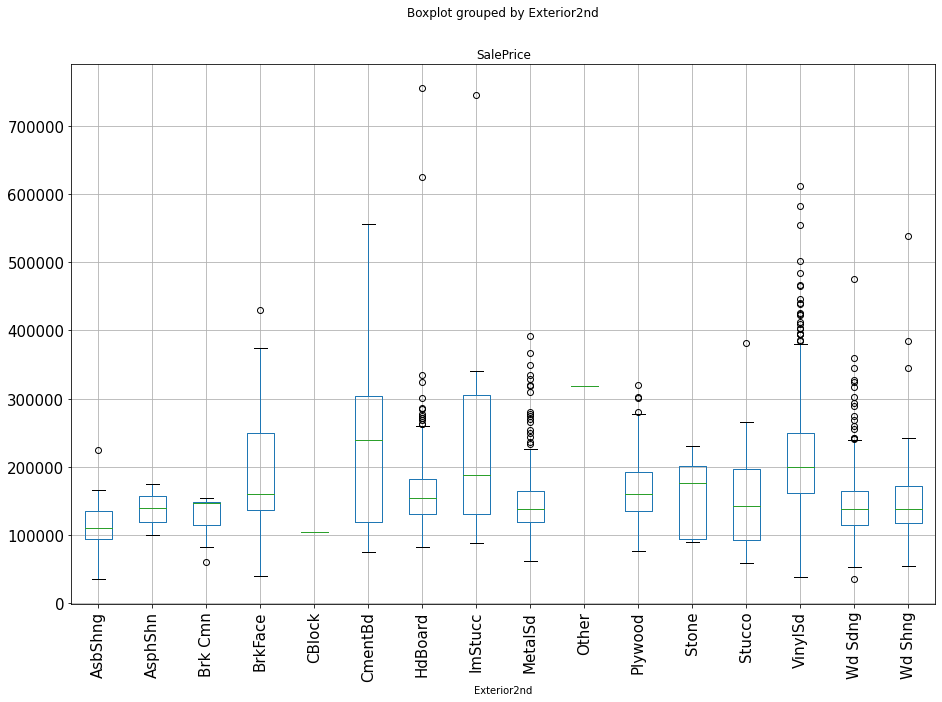

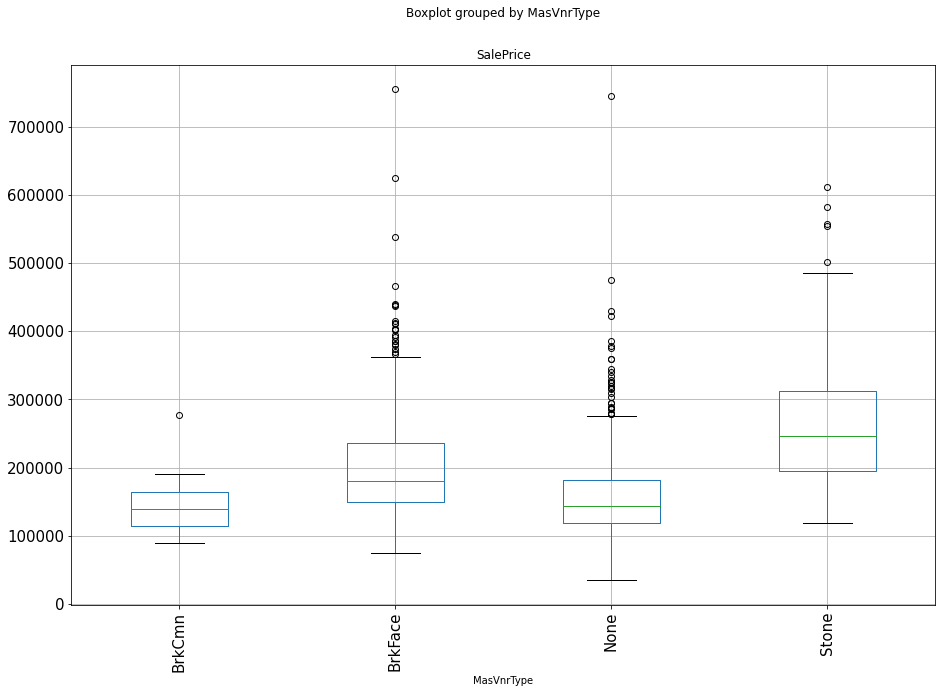

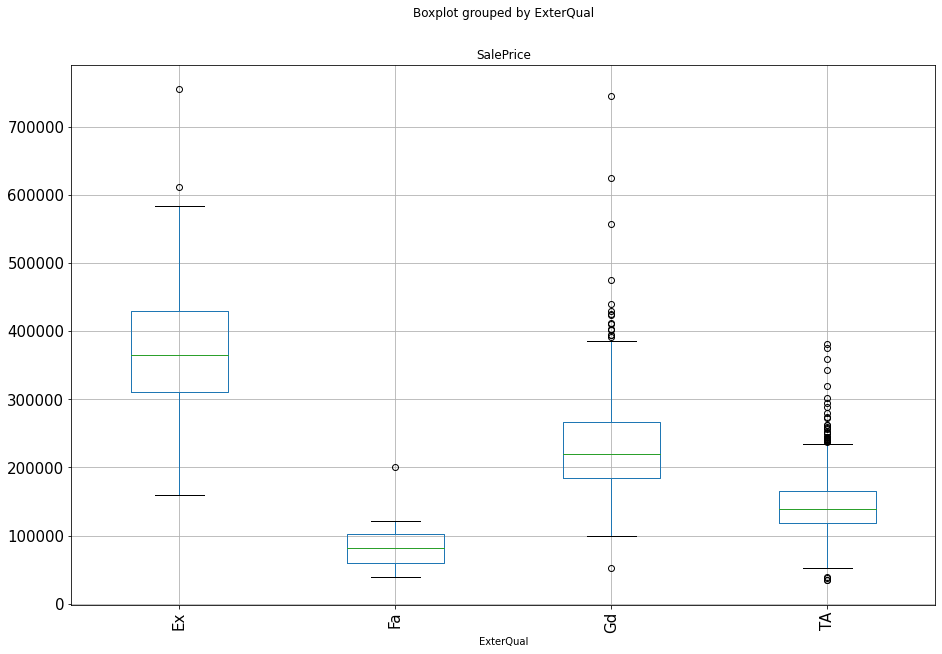

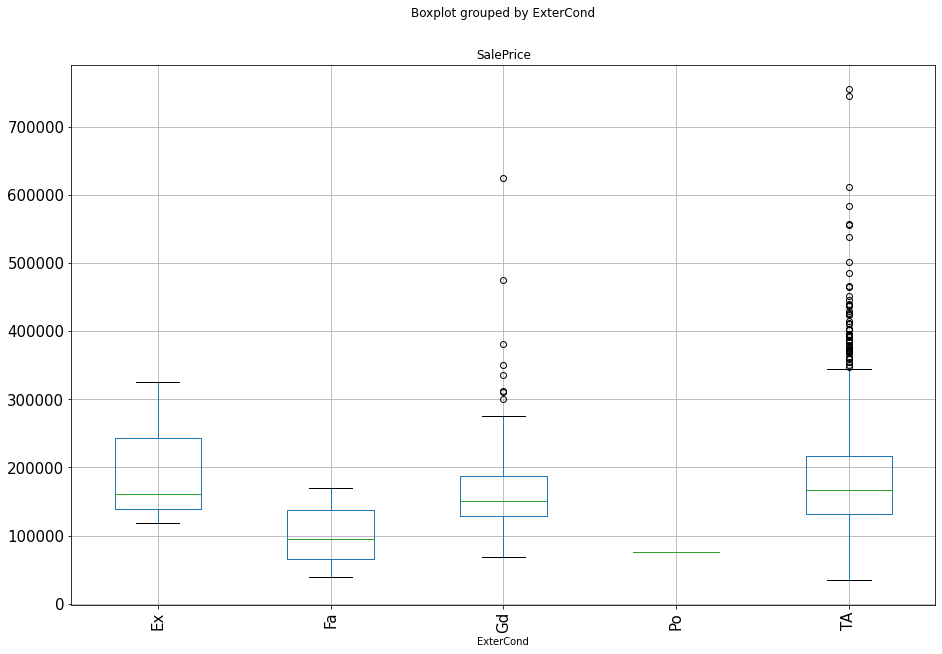

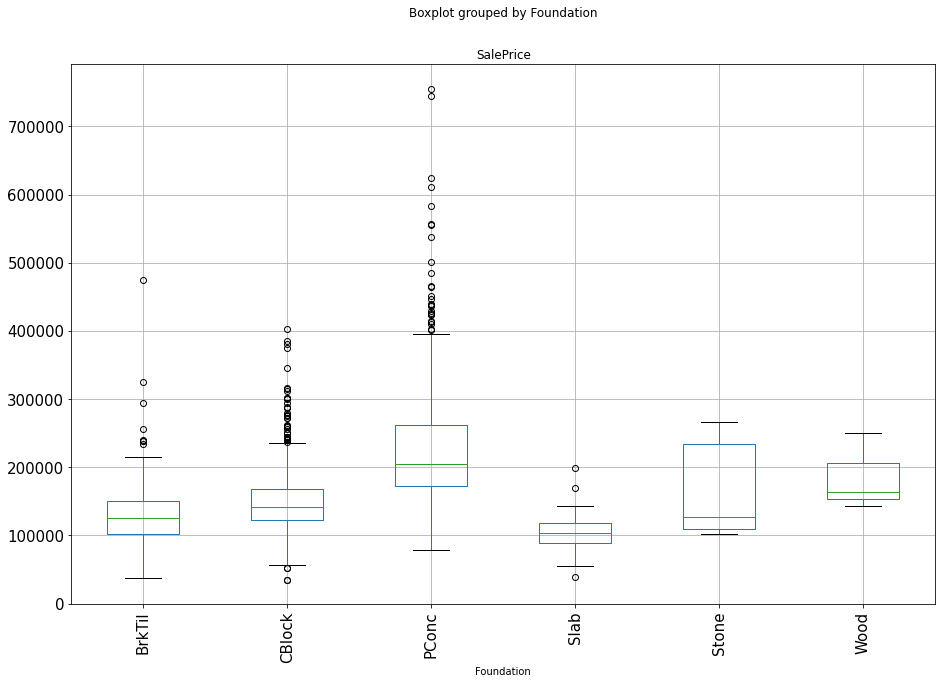

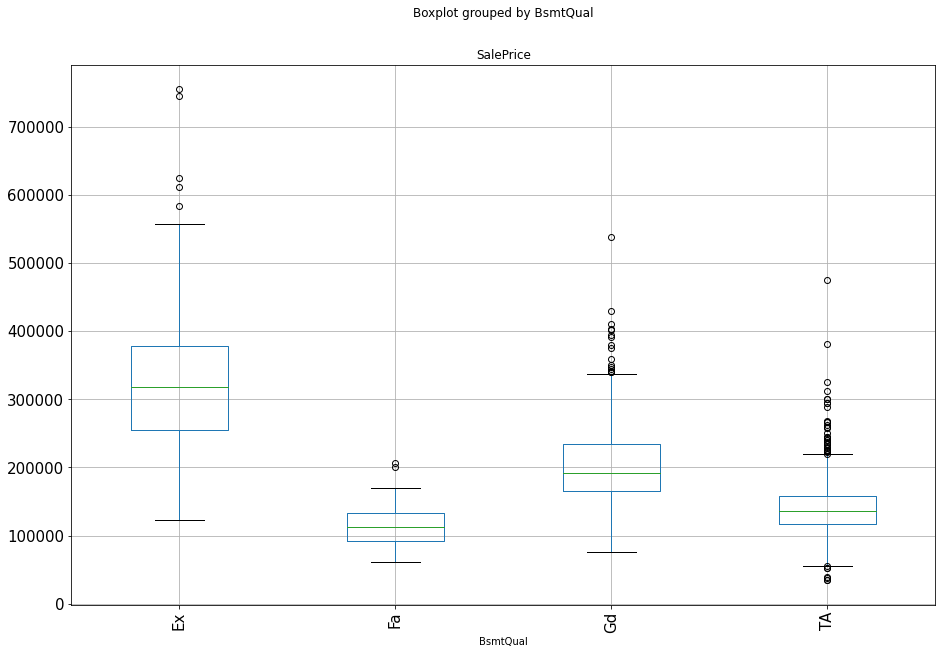

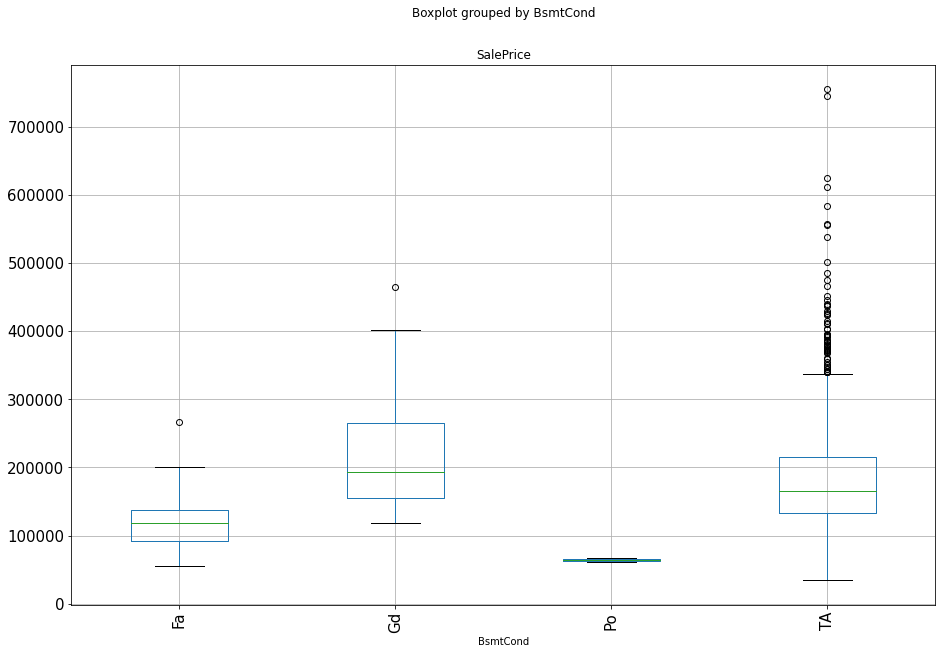

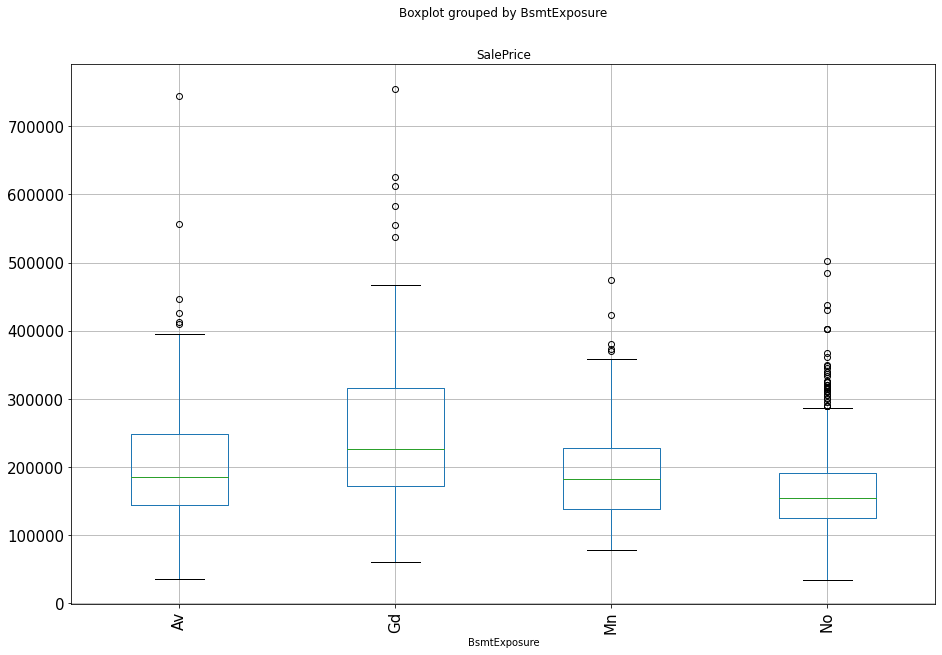

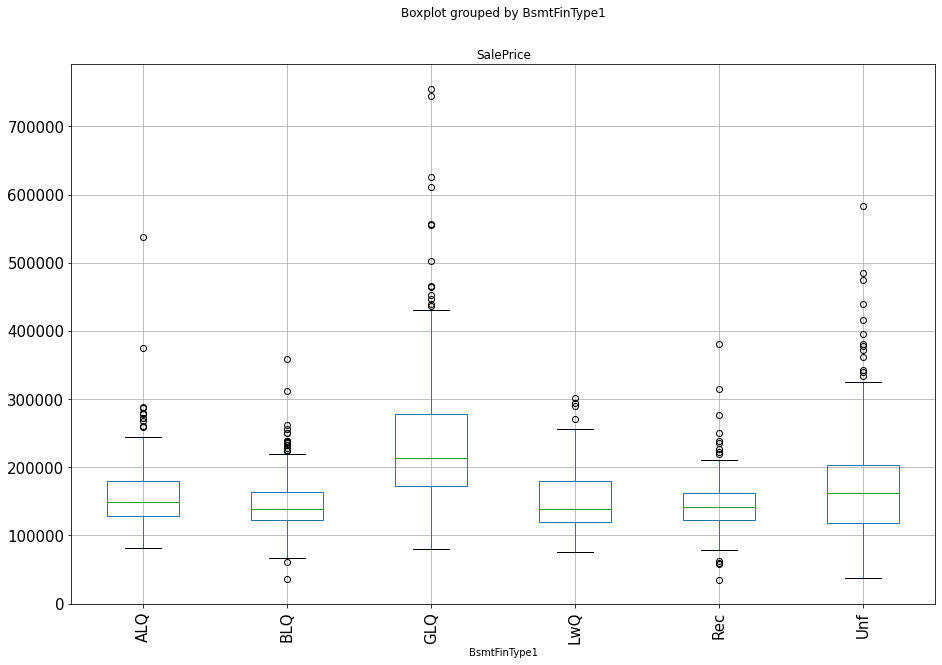

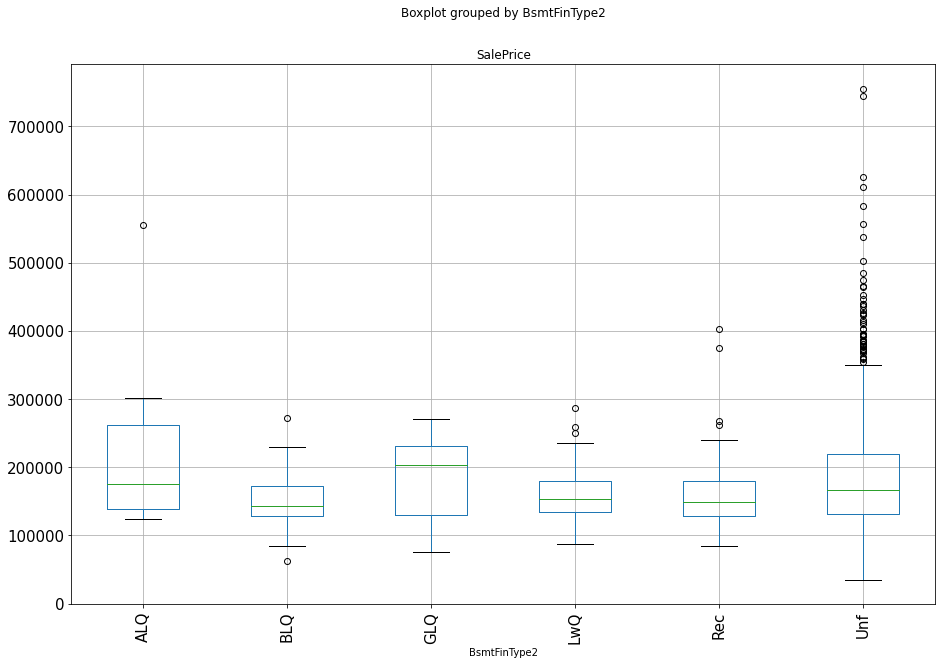

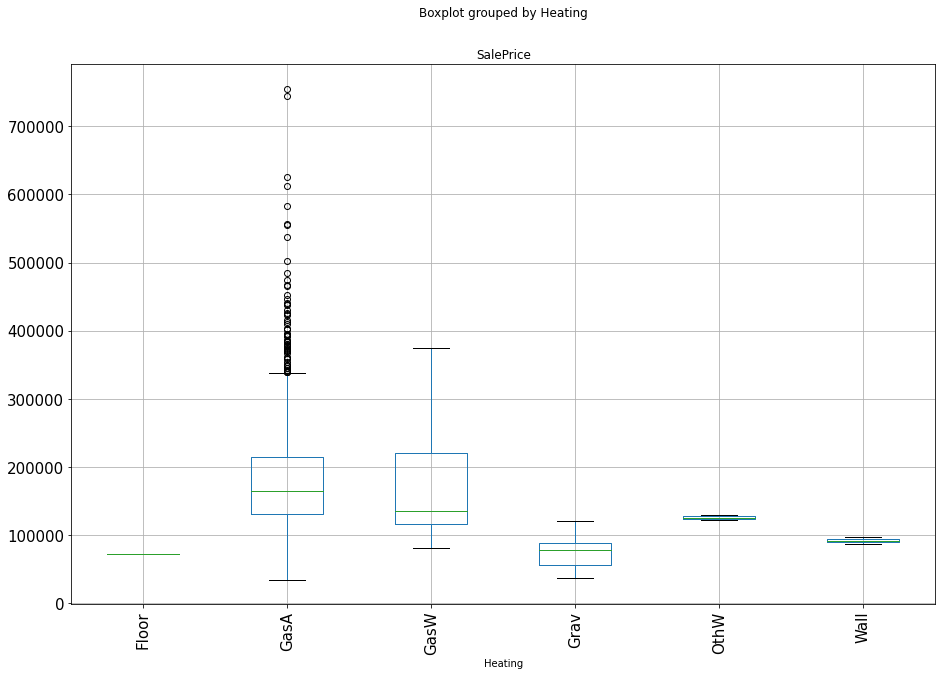

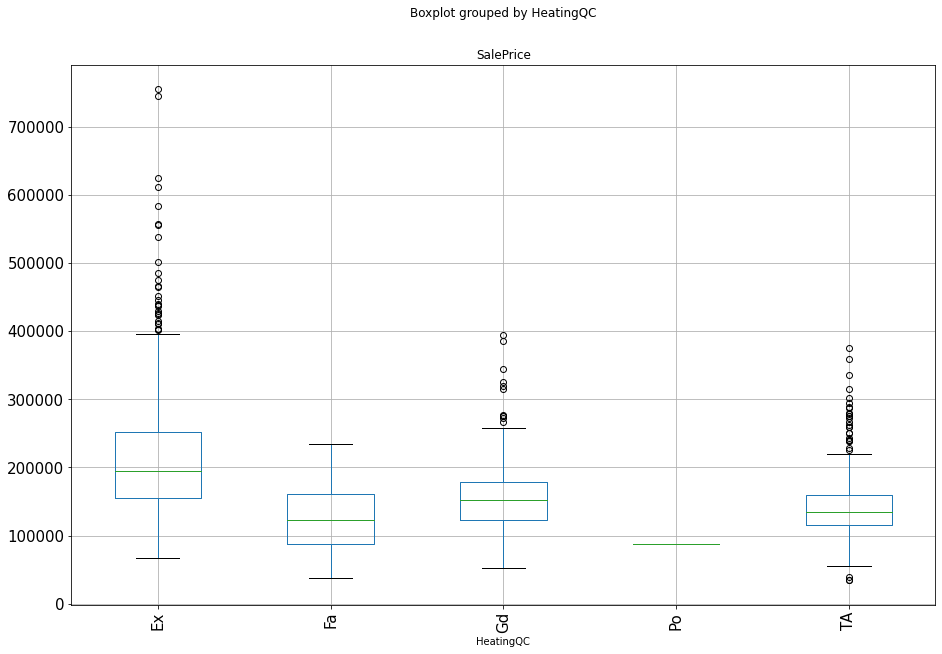

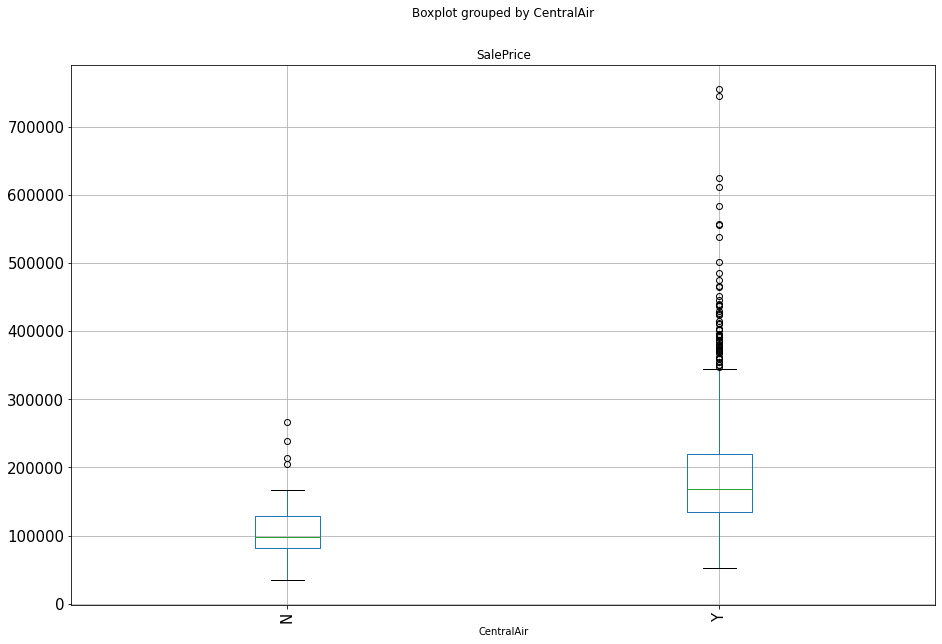

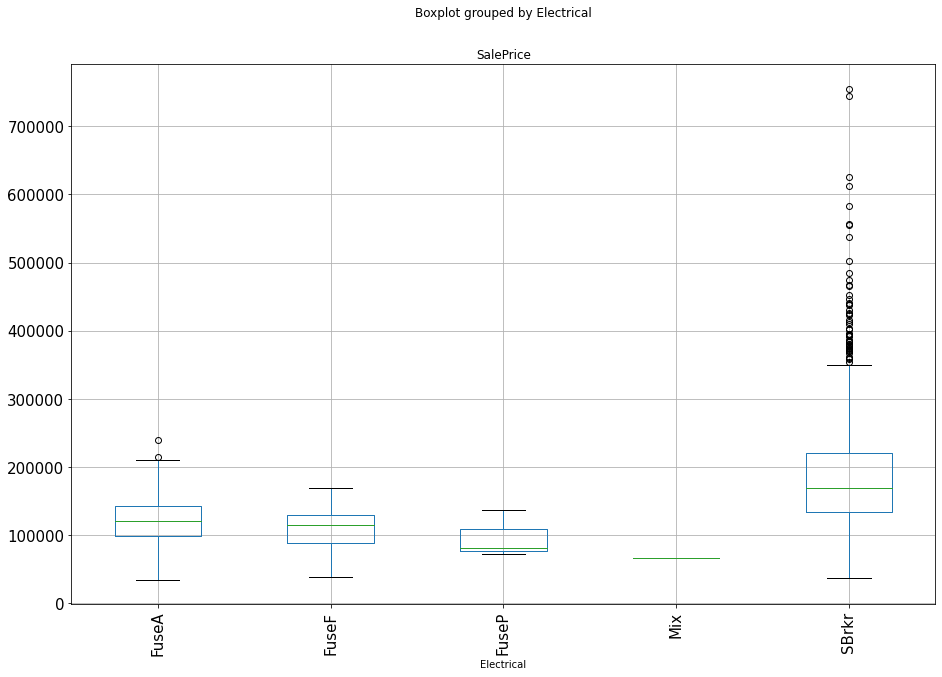

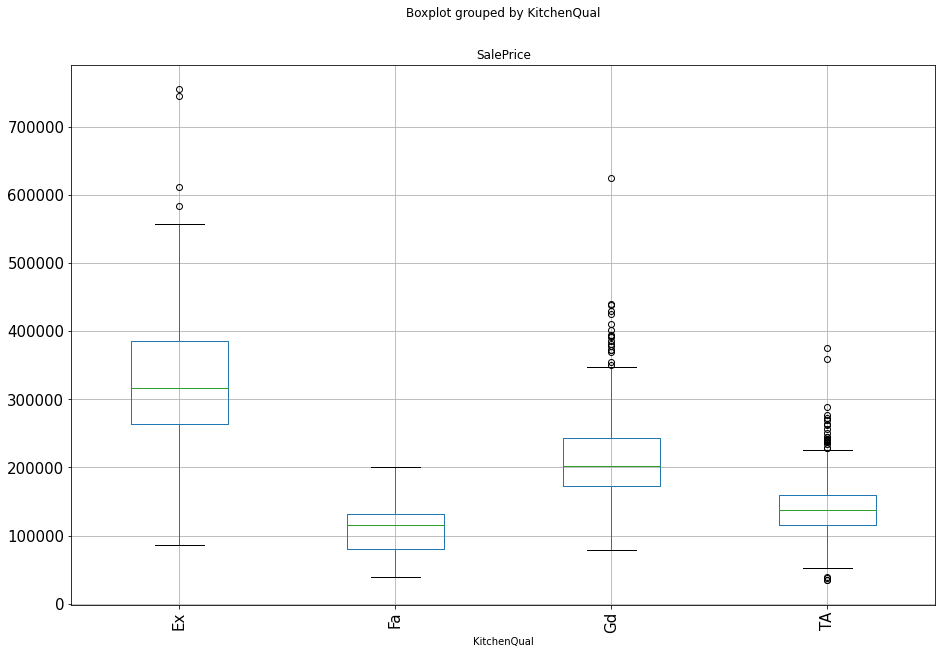

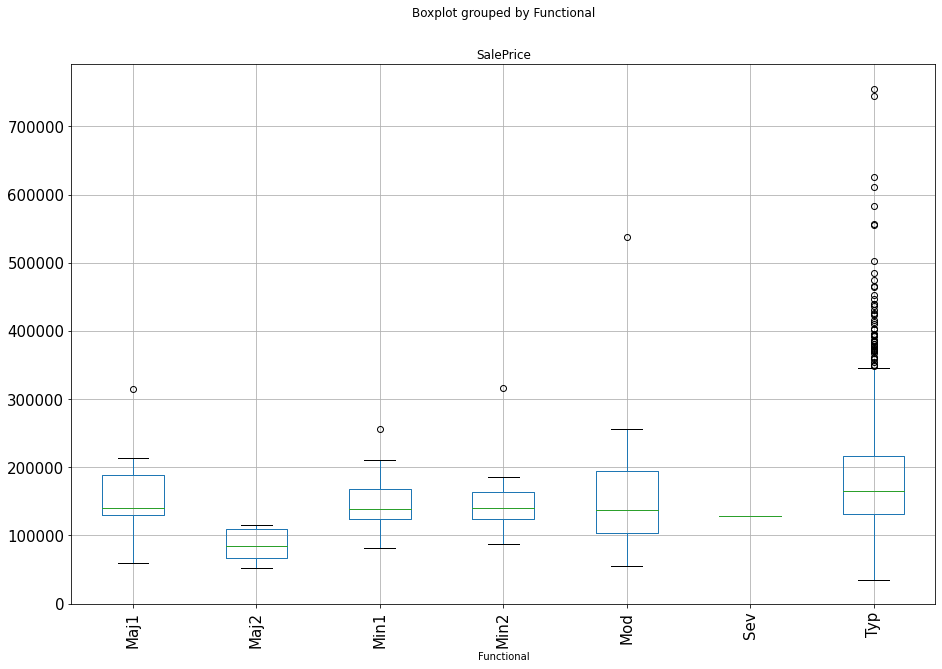

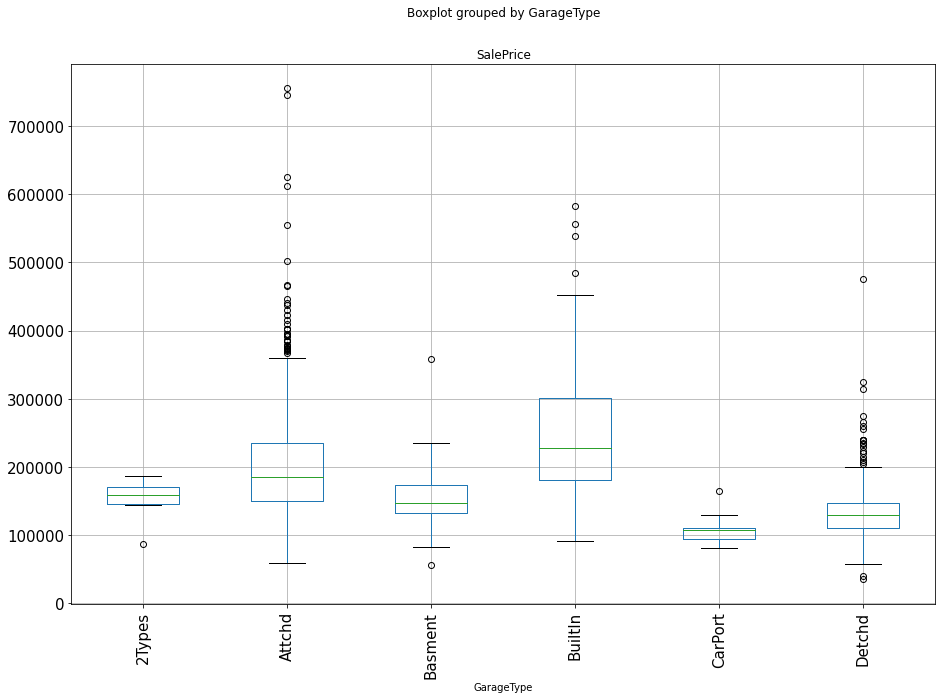

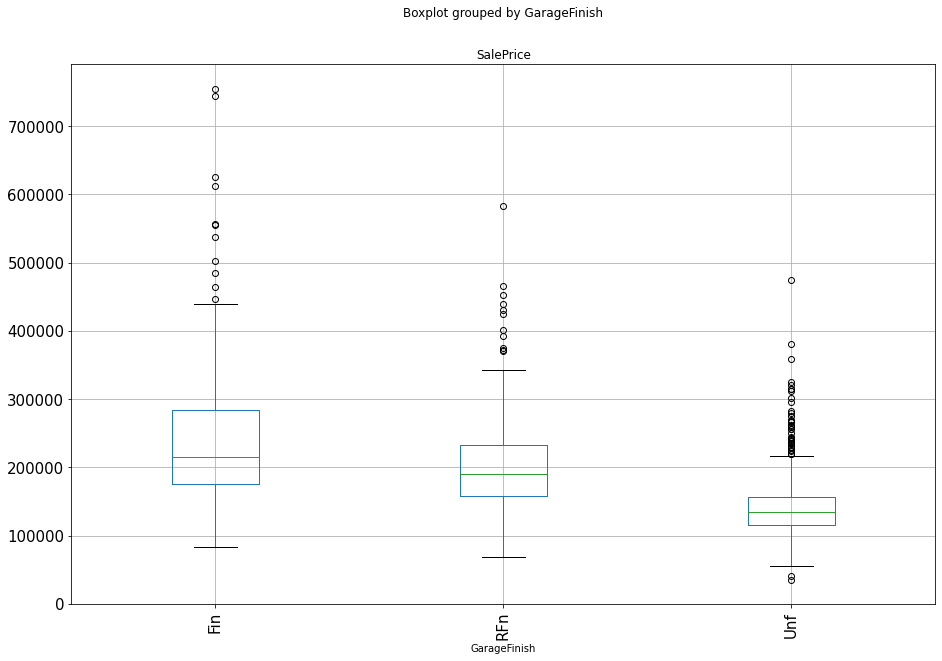

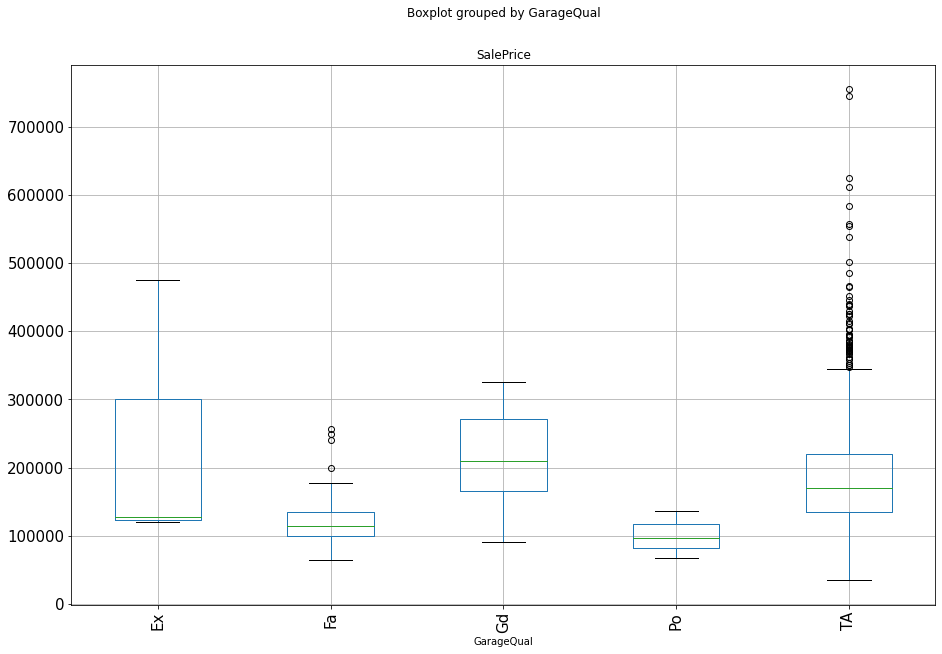

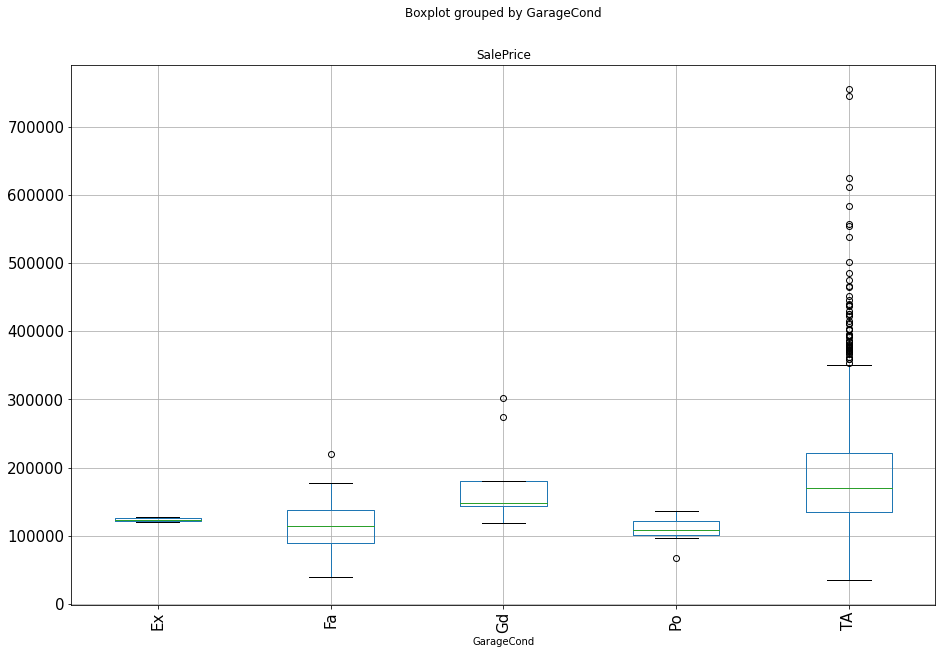

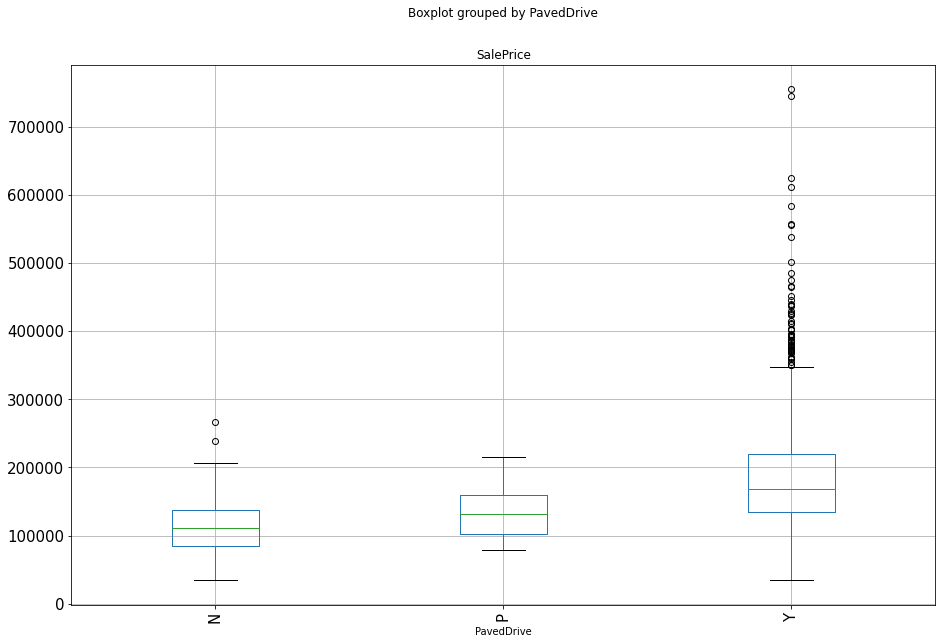

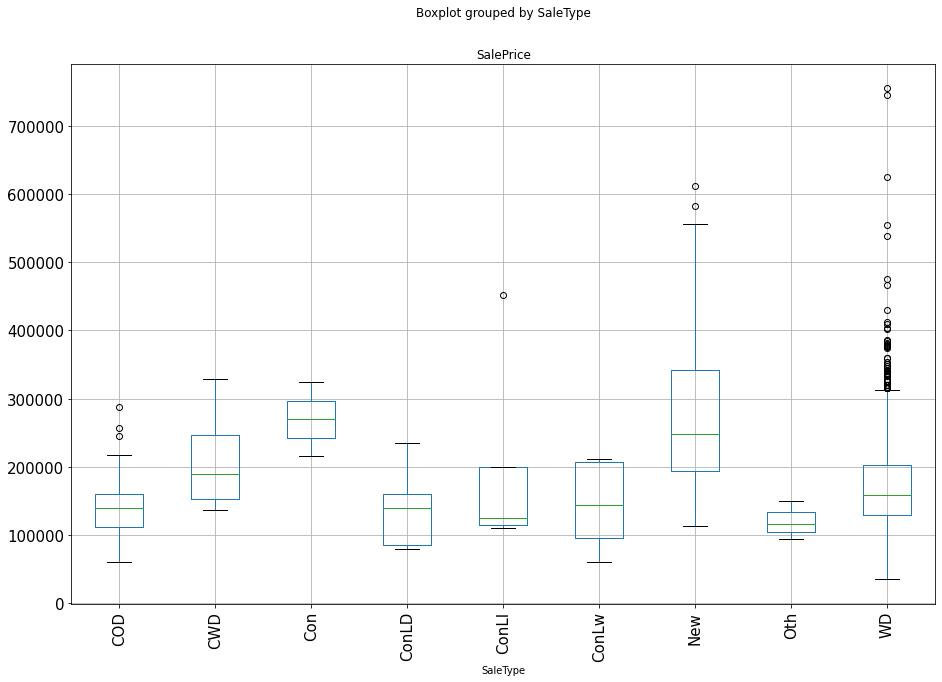

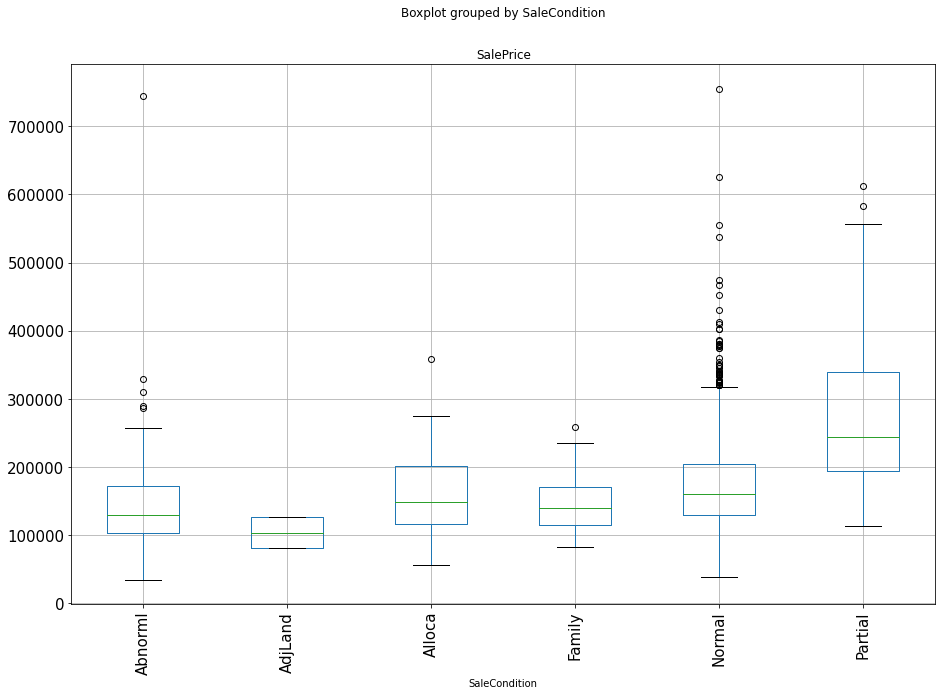

In [25]:
# link beteween categorical data and prices
# feature to kill
useless = []
for col in df_train.columns.values:
    if df_train[col].dtypes == 'object':
        value = df_train[col].value_counts().index.values
        kruskal_data = []
        if len(value) >= 2:
            for val in value:
                kruskal_data.append(df_train[df_train[col] == val]['SalePrice'].values)
            _, p_value = kruskal(*kruskal_data)
            print(col, ': ',p_value)
            df_train.boxplot(column='SalePrice', by=col, rot=90, fontsize=15, figsize=(15, 10))
            
            if p_value > 0.05:
                useless.append(col)

In [26]:
# feature to delete
print(useless)
for col in useless:
    del(df_train[col])
    del(df_test[col])

['Street', 'Utilities', 'LandSlope', 'BsmtFinType2']


In [27]:
# we treat categorical and numerical value separately  
cat = []
num = []
for col in df_train:
    if df_train[col].dtypes == 'object':
        cat.append(col)
    elif col != 'SalePrice':
        num.append(col)
        
df_train_cat = df_train[cat]
df_train_num = df_train[num]
df_test_cat = df_test[cat]
df_test_num = df_test[num]

In [28]:
# NOT USED

# We want to use a KNN imputer 
# to complete NA value.
# we have to ordinal encode
# because of imputer accept 
# only numrical values

# we take the first one value 'k1, k2'
# to complete all the NA.
# in the same time we kept
# the NA vlaue position
# with 'mask'.
k1 = df_train_cat.iloc[0,0]
k2 = df_test_cat.iloc[0,0]
# mask to record the actual NA value
# posistions
mask_cat_train = df_train_cat.isna()
mask_cat_test1 = df_test_cat.isna()
# fill the NA value
df_train_cat = df_train_cat.fillna(k1)
df_test_cat = df_test_cat.fillna(k2)

# Ordinal Encoder
X_train = df_train_cat.to_numpy()
X_test = df_test_cat.to_numpy()
# to manage unknow value on X_test
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
X_train = oe.fit_transform(X_train)
# to avoid dataleakage
X_test = oe.transform(X_test)

# we create a DataFrame
# with encoded value and
# we put back NA value
df_train_cat = pd.DataFrame(data=X_train, columns=df_train_cat.columns, index=df_train.index)
df_train_cat = df_train_cat.where(~mask_cat_train == True)

df_test_cat = pd.DataFrame(data=X_test, columns=df_test_cat.columns, index=df_test.index)
mask_cat_test2 = df_test_cat.isna()
# initial NA and NA generate on transform
mask = np.logical_or(mask_cat_test1, mask_cat_test2)
df_test_cat = df_test_cat.where(~mask == True)

ValueError: too many values to unpack (expected 3)

In [29]:
# we recreate df_train 
# with encoded values
df_train = pd.concat([df_train_num, df_train_cat], axis=1)
df_test = pd.concat([df_test_num, df_test_cat], axis=1)
df_train.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,3.0,3.0,3.0,4.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,3.0,2.0,1.0,0.0,1.0,5.0,2.0,6.0,1.0,1.0,5.0,5.0,2.0,8.0,4.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,3.0,3.0,3.0,2.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,1.0,0.0,1.0,5.0,3.0,6.0,1.0,1.0,5.0,5.0,2.0,8.0,4.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,3.0,0.0,3.0,4.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,1.0,0.0,1.0,5.0,2.0,6.0,1.0,1.0,5.0,5.0,2.0,8.0,4.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,3.0,0.0,3.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,4.0,1.0,3.0,0.0,1.0,2.0,1.0,5.0,2.0,6.0,5.0,3.0,5.0,5.0,2.0,8.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,3.0,0.0,3.0,2.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,1.0,0.0,1.0,5.0,2.0,6.0,1.0,1.0,5.0,5.0,2.0,8.0,4.0


In [30]:
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,2.0,3.0,3.0,4.0,12.0,1.0,2.0,0.0,2.0,1.0,1.0,12.0,13.0,2.0,3.0,4.0,1.0,4.0,4.0,3.0,5.0,1.0,4.0,1.0,5.0,3.0,6.0,1.0,3.0,5.0,5.0,2.0,8.0,4.0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,3.0,0.0,3.0,0.0,12.0,2.0,2.0,0.0,2.0,3.0,1.0,13.0,14.0,1.0,3.0,4.0,1.0,4.0,4.0,3.0,0.0,1.0,4.0,1.0,5.0,2.0,6.0,1.0,3.0,5.0,5.0,2.0,8.0,4.0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,3.0,0.0,3.0,4.0,8.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,2.0,3.0,4.0,2.0,2.0,4.0,3.0,2.0,1.0,2.0,1.0,5.0,3.0,6.0,1.0,0.0,5.0,5.0,2.0,8.0,4.0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,3.0,0.0,3.0,4.0,8.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,3.0,4.0,2.0,4.0,4.0,3.0,2.0,1.0,0.0,1.0,5.0,2.0,6.0,1.0,0.0,5.0,5.0,2.0,8.0,4.0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,3.0,0.0,1.0,4.0,22.0,2.0,2.0,4.0,2.0,1.0,1.0,6.0,6.0,2.0,2.0,4.0,2.0,2.0,4.0,3.0,0.0,1.0,0.0,1.0,5.0,2.0,6.0,1.0,1.0,5.0,5.0,2.0,8.0,4.0


In [31]:
# we use KNN imputer
imputer = KNNImputer(n_neighbors=2)
df_train = pd.DataFrame(data=imputer.fit_transform(df_train), columns=df_train.columns, index=df_train.index)
df_test = pd.DataFrame(data=imputer.transform(df_test), columns=df_test.columns, index=df_test.index)


In [32]:
# we can OneHotEncode
# categorical values
ohe = OneHotEncoder(handle_unknown = 'ignore')

for col in cat:
    X_train = df_train[col].to_numpy().reshape(-1,1)
    X_test = df_test[col].to_numpy().reshape(-1,1)
    dfc = pd.get_dummies(df_train[col].values)
    colu = dfc.columns.tolist()
    
    # among the new feature due
    # to OneHotEncode, many of
    # them are to much empty
    # => suppress if empty rate > 90%
    X_train = ohe.fit_transform(X_train).toarray()
    X_test = ohe.transform(X_test).toarray()
    
    # rename dfc columns
    for i, j in enumerate(colu):
        colu[i] = col + str(j)
    dfc_train = pd.DataFrame(data=X_train, columns=colu, index=df_train.index)
    dfc_test = pd.DataFrame(data=X_test, columns=colu, index=df_test.index)
    
    kill = []
    for i in range(len(X_train[0, :])):
        print(X_train[:, i].sum()/df_train.shape[0])
        if X_train[:, i].sum()/df_train.shape[0] >= 0.1:
            kill.append(dfc_train.columns.values[i])
    
    # we had new feature to df_train
    if len(kill) >= 2:
        dfc_train = dfc_train[kill]
        dfc_test = dfc_test[kill]
        df_train = pd.concat([df_train, dfc_train], axis=1)
        df_test = pd.concat([df_test, dfc_test], axis=1)        

In [33]:
for col in cat:
    del(df_train[col])
    del(df_test[col])

In [34]:
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning3.0,MSZoning4.0,LotShape0.0,LotShape3.0,LotConfig0.0,LotConfig4.0,Neighborhood5.0,Neighborhood12.0,HouseStyle0.0,HouseStyle2.0,HouseStyle5.0,RoofStyle1.0,RoofStyle3.0,Exterior1st6.0,Exterior1st8.0,Exterior1st12.0,Exterior1st13.0,Exterior2nd6.0,Exterior2nd8.0,Exterior2nd13.0,Exterior2nd14.0,MasVnrType1.0,MasVnrType2.0,ExterQual2.0,ExterQual3.0,ExterCond2.0,ExterCond4.0,Foundation0.0,Foundation1.0,Foundation2.0,BsmtQual2.0,BsmtQual4.0,BsmtExposure0.0,BsmtExposure3.0,BsmtFinType10.0,BsmtFinType11.0,BsmtFinType12.0,BsmtFinType16.0,HeatingQC0.0,HeatingQC2.0,HeatingQC4.0,KitchenQual2.0,KitchenQual3.0,GarageType1.0,GarageType5.0,GarageFinish0.0,GarageFinish1.0,GarageFinish3.0
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1998.0,2.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,1992.0,2.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
df_test.shape

(1459, 85)

In [36]:
df_test.count()/df_test.shape[0]

Id                  1.0
MSSubClass          1.0
LotFrontage         1.0
LotArea             1.0
OverallQual         1.0
OverallCond         1.0
YearBuilt           1.0
YearRemodAdd        1.0
MasVnrArea          1.0
BsmtFinSF1          1.0
BsmtFinSF2          1.0
BsmtUnfSF           1.0
TotalBsmtSF         1.0
1stFlrSF            1.0
2ndFlrSF            1.0
LowQualFinSF        1.0
GrLivArea           1.0
BsmtFullBath        1.0
BsmtHalfBath        1.0
FullBath            1.0
HalfBath            1.0
BedroomAbvGr        1.0
KitchenAbvGr        1.0
TotRmsAbvGrd        1.0
Fireplaces          1.0
GarageYrBlt         1.0
GarageCars          1.0
GarageArea          1.0
WoodDeckSF          1.0
OpenPorchSF         1.0
EnclosedPorch       1.0
3SsnPorch           1.0
ScreenPorch         1.0
PoolArea            1.0
MiscVal             1.0
MoSold              1.0
YrSold              1.0
MSZoning3.0         1.0
MSZoning4.0         1.0
LotShape0.0         1.0
LotShape3.0         1.0
LotConfig0.0    

## Numerical data

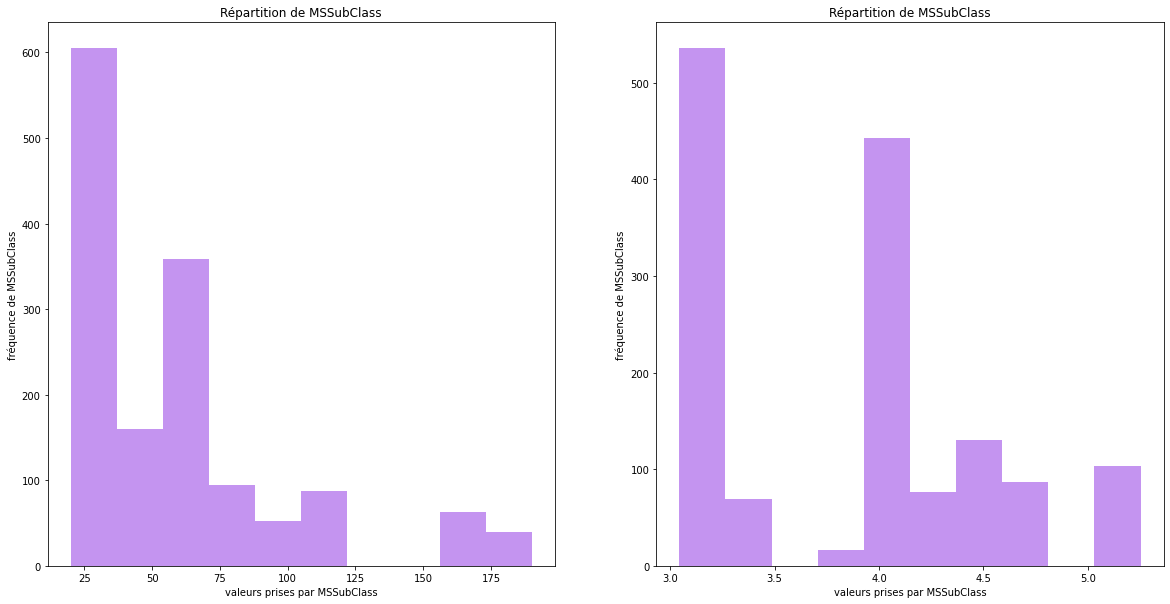

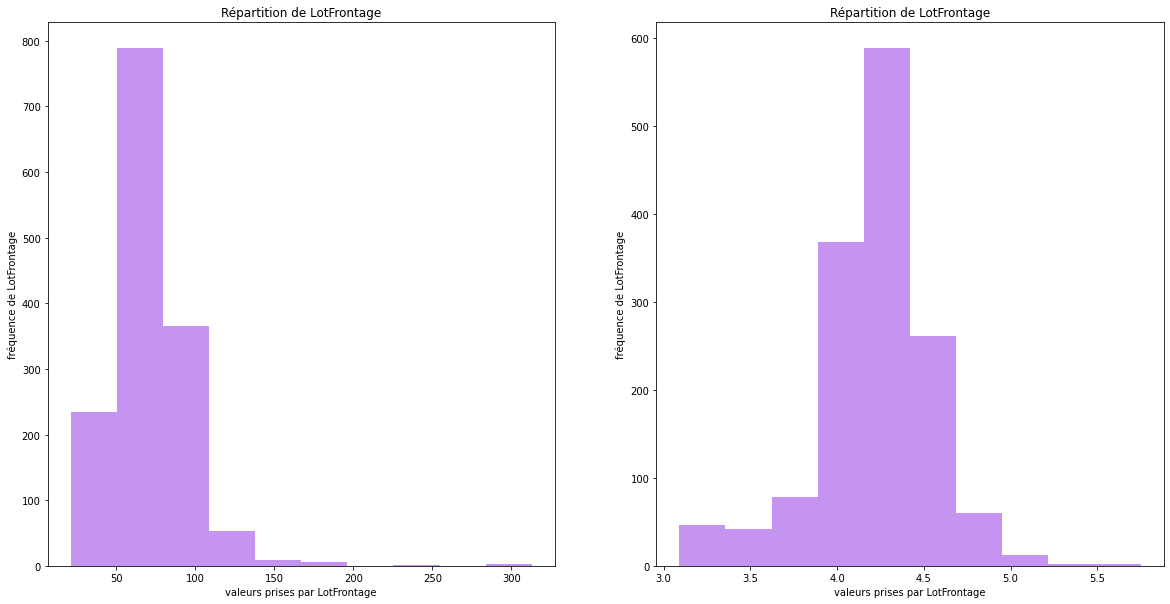

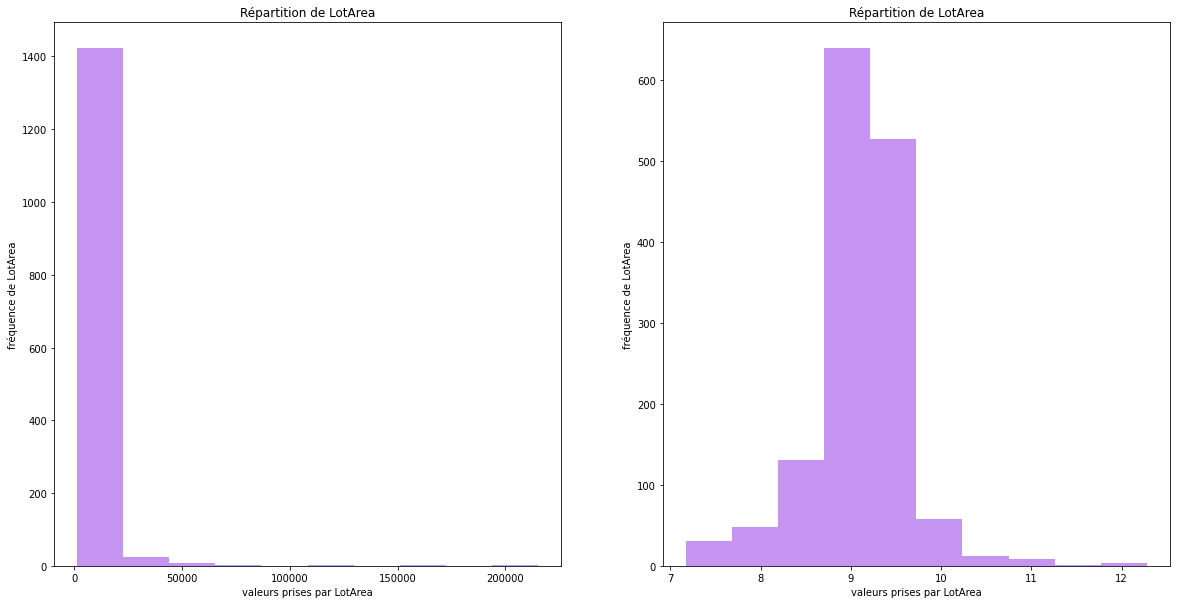

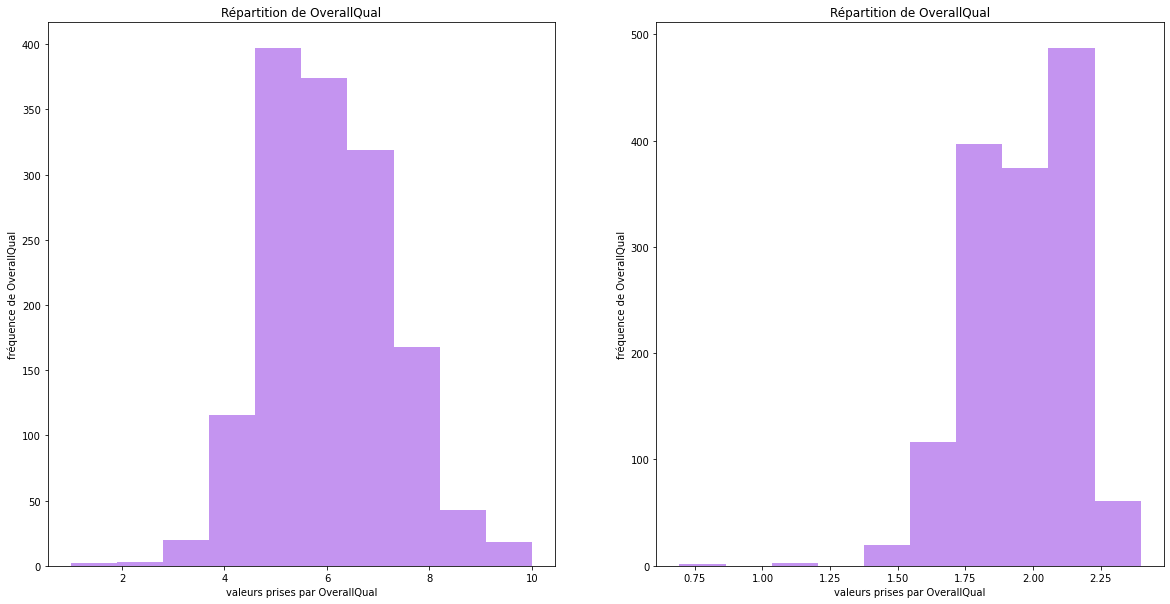

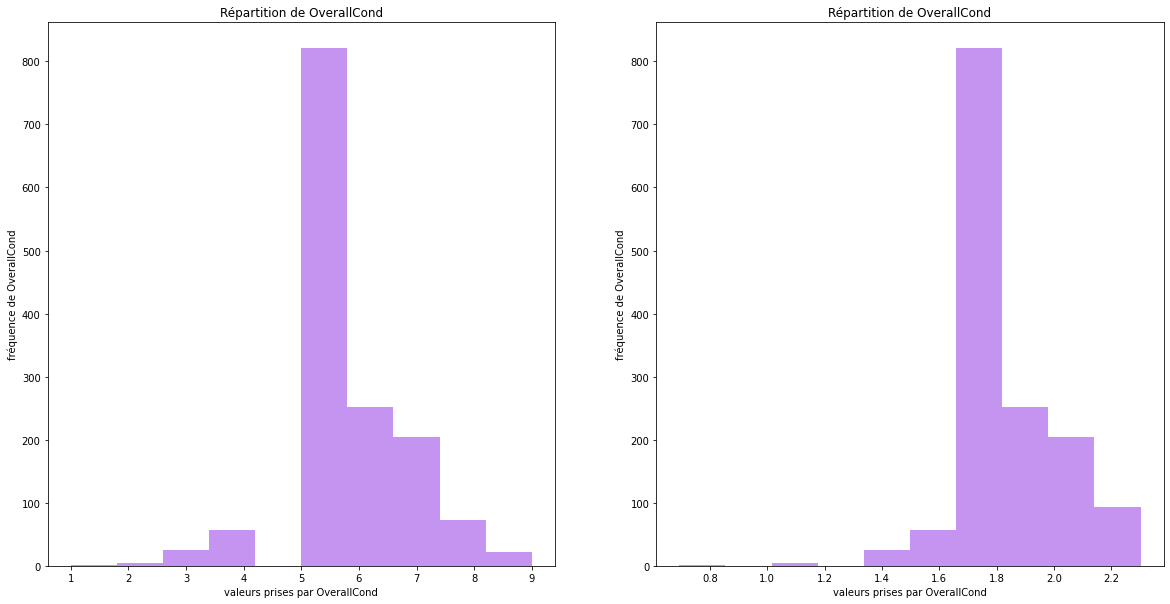

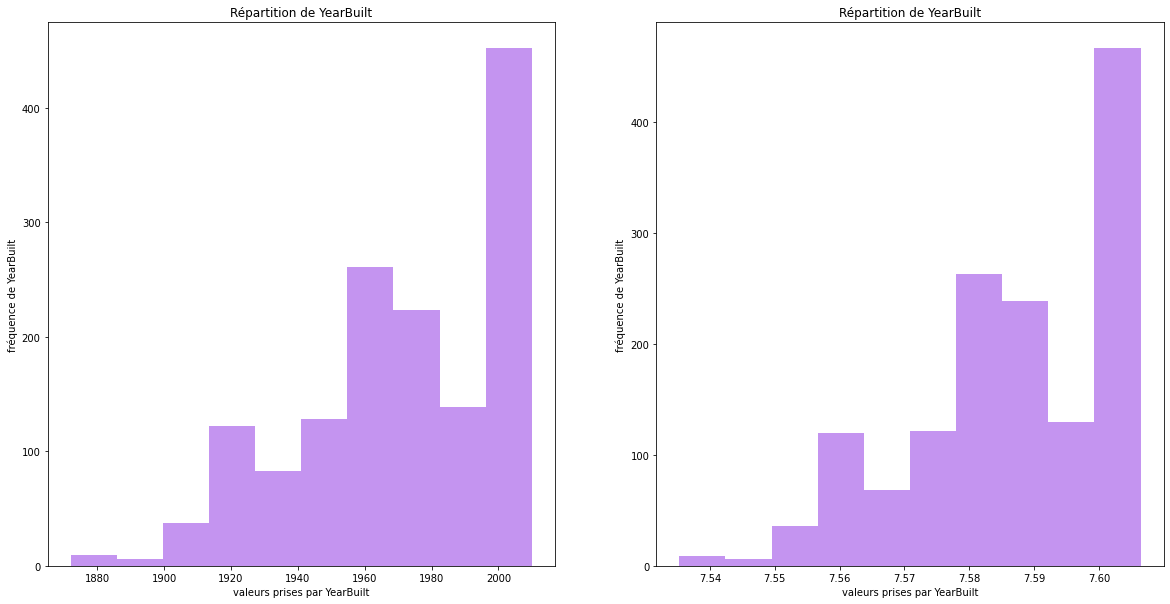

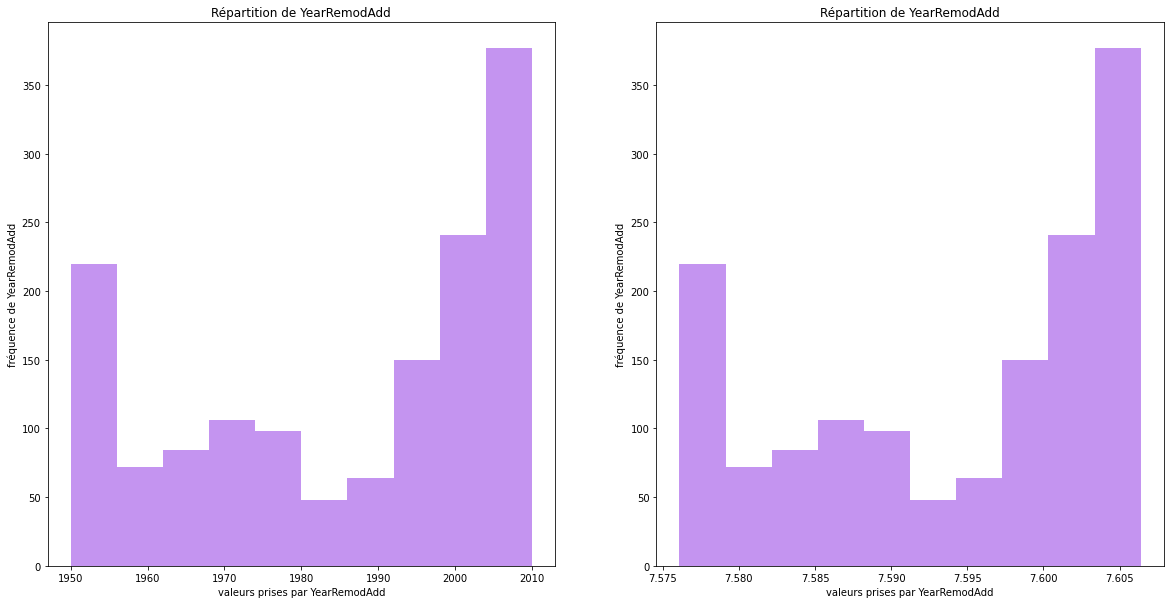

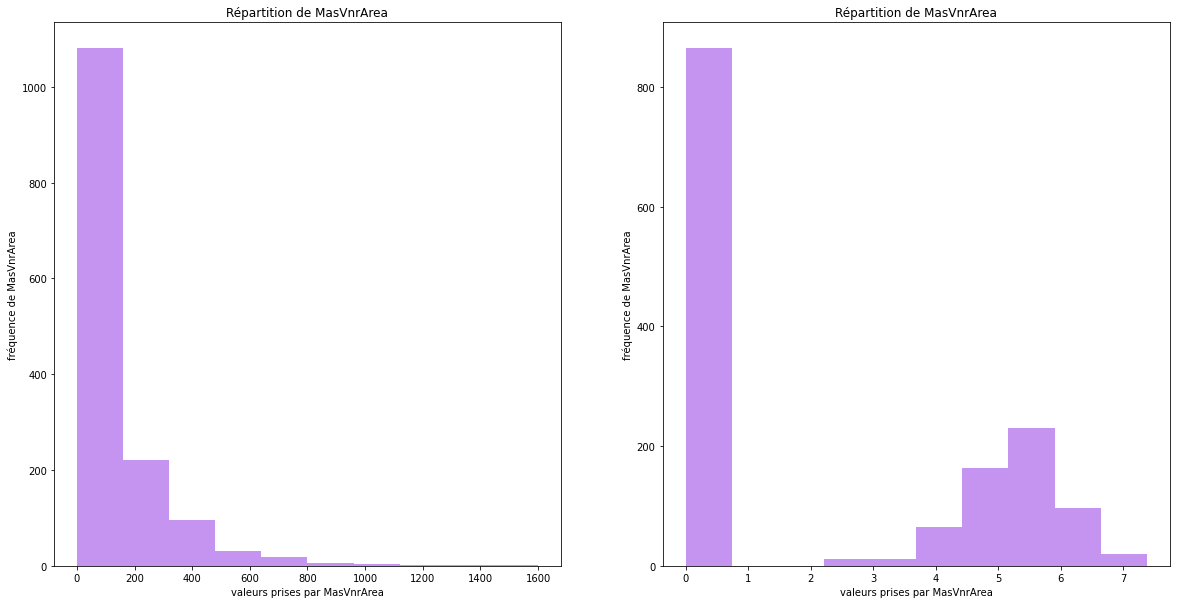

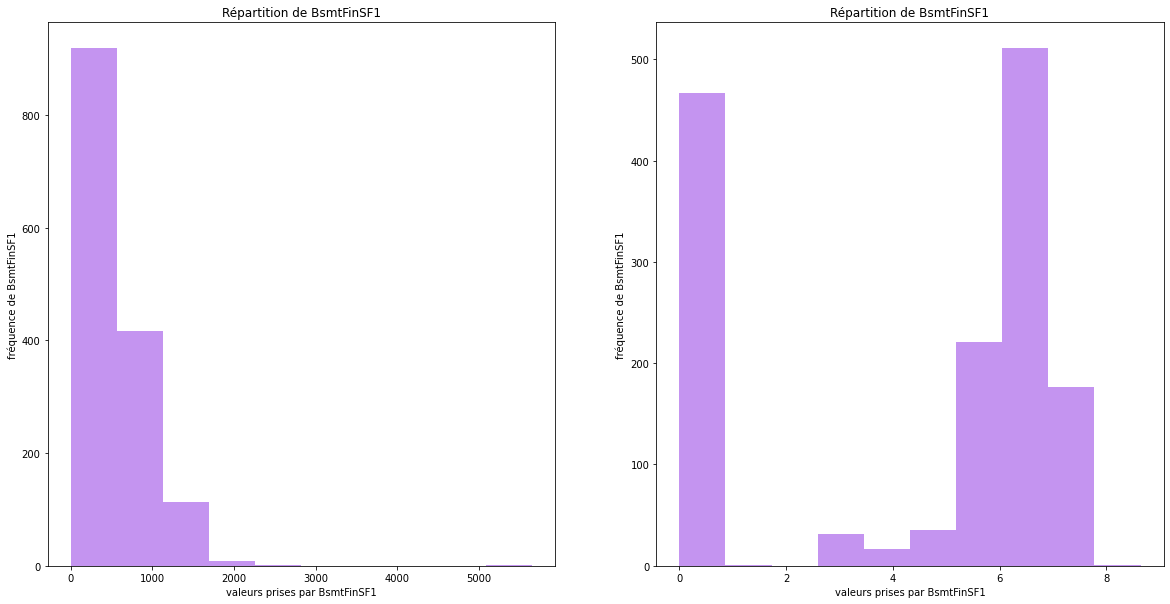

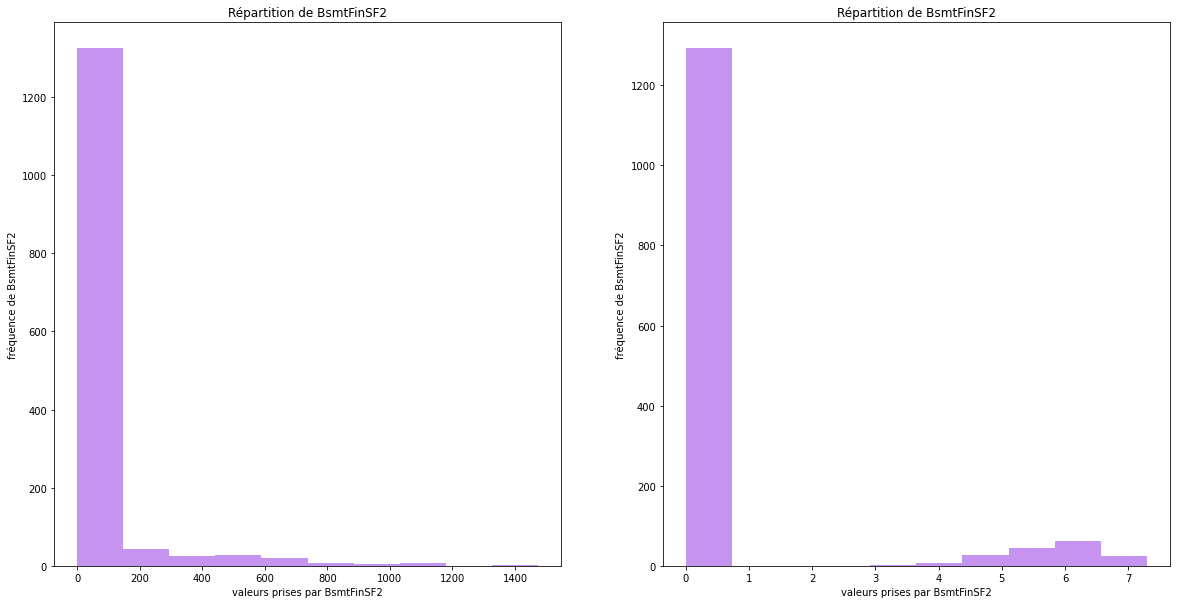

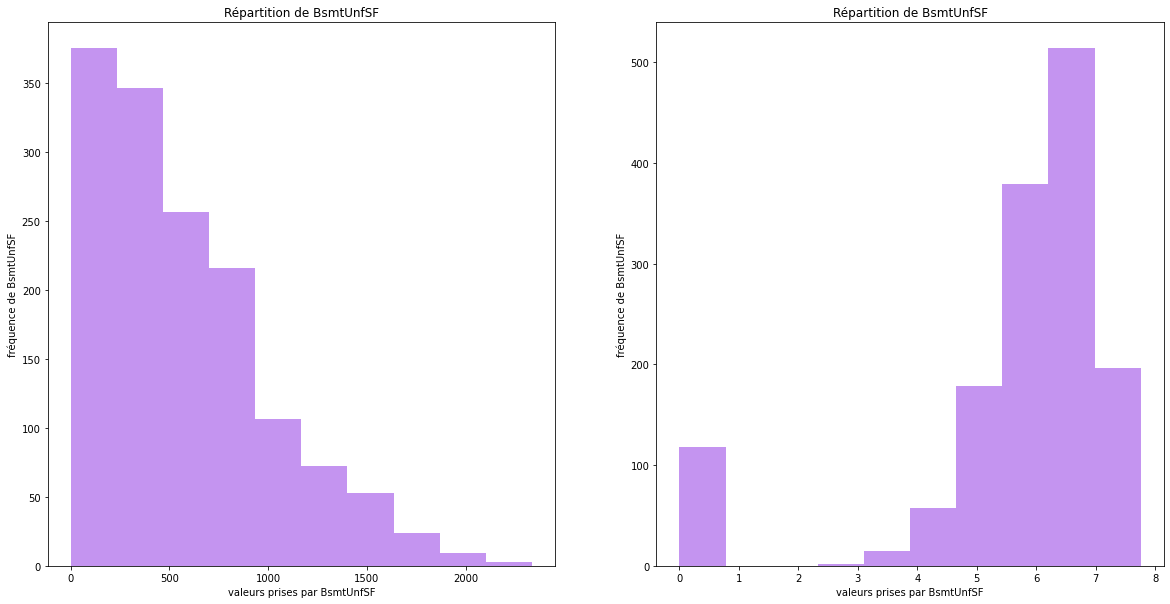

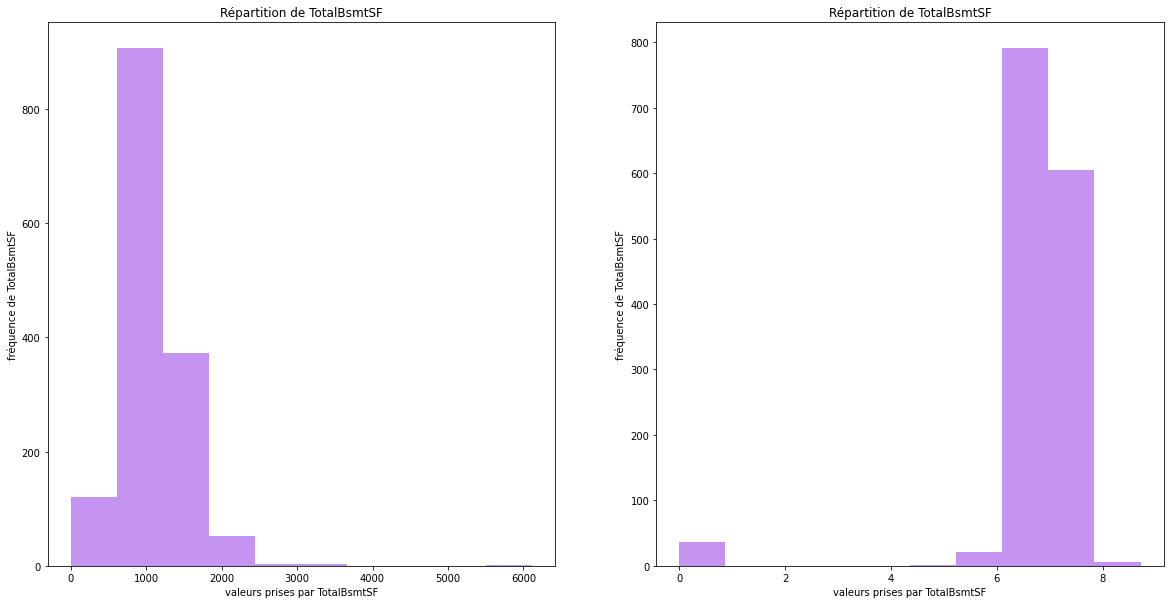

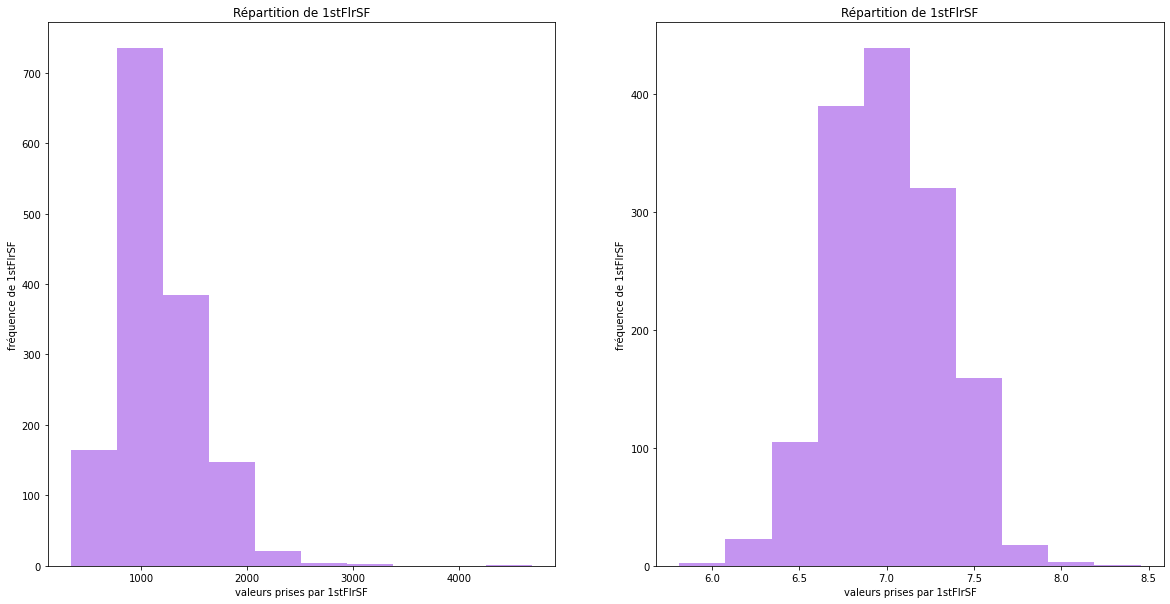

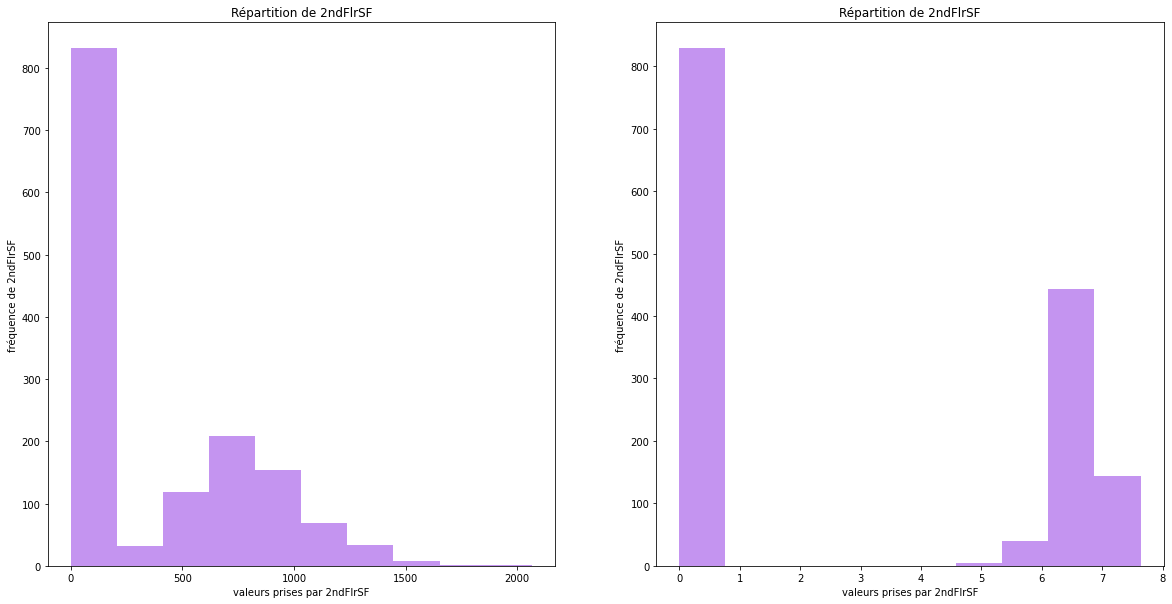

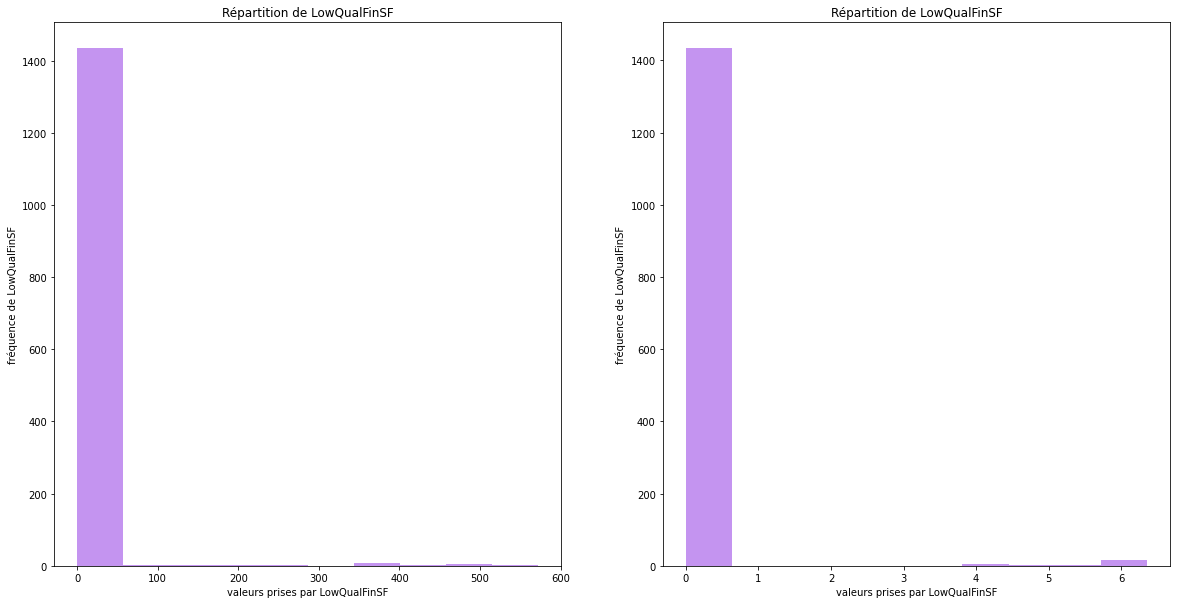

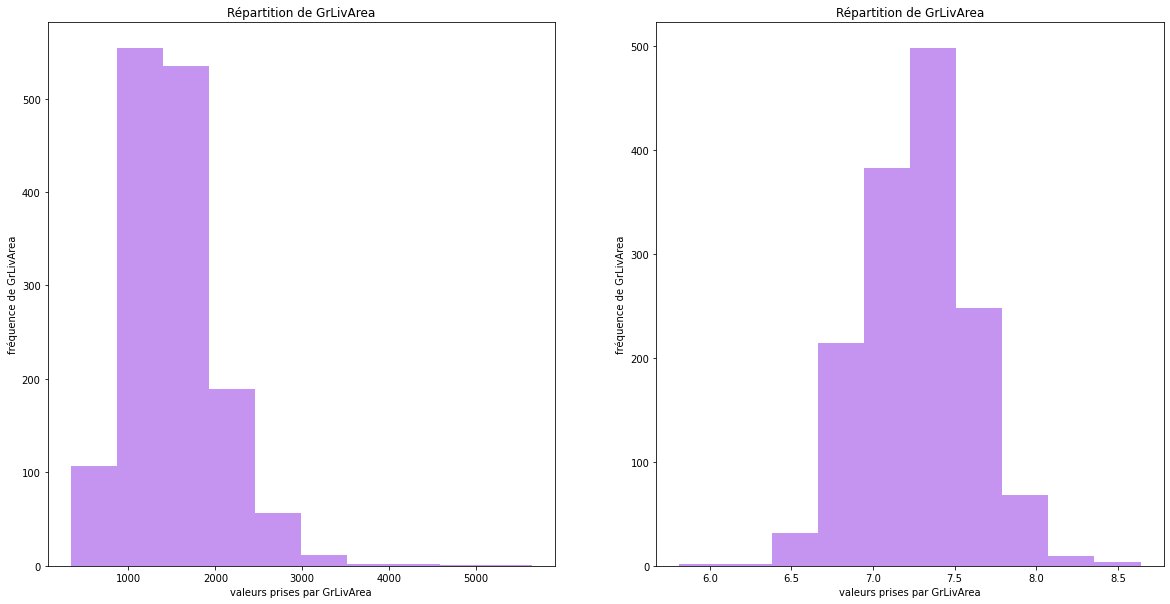

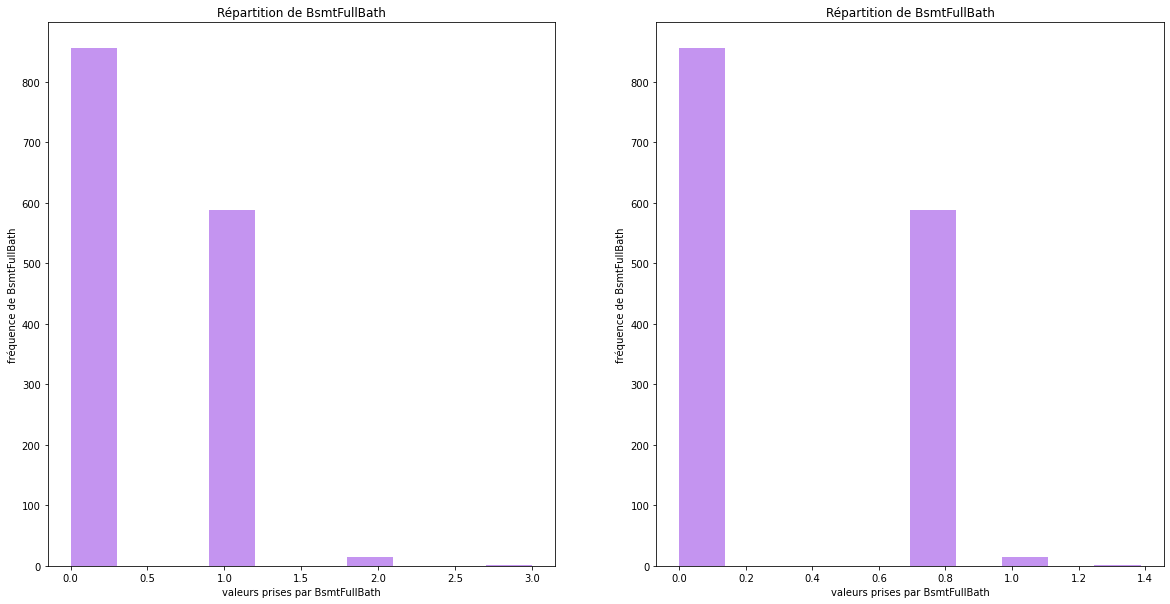

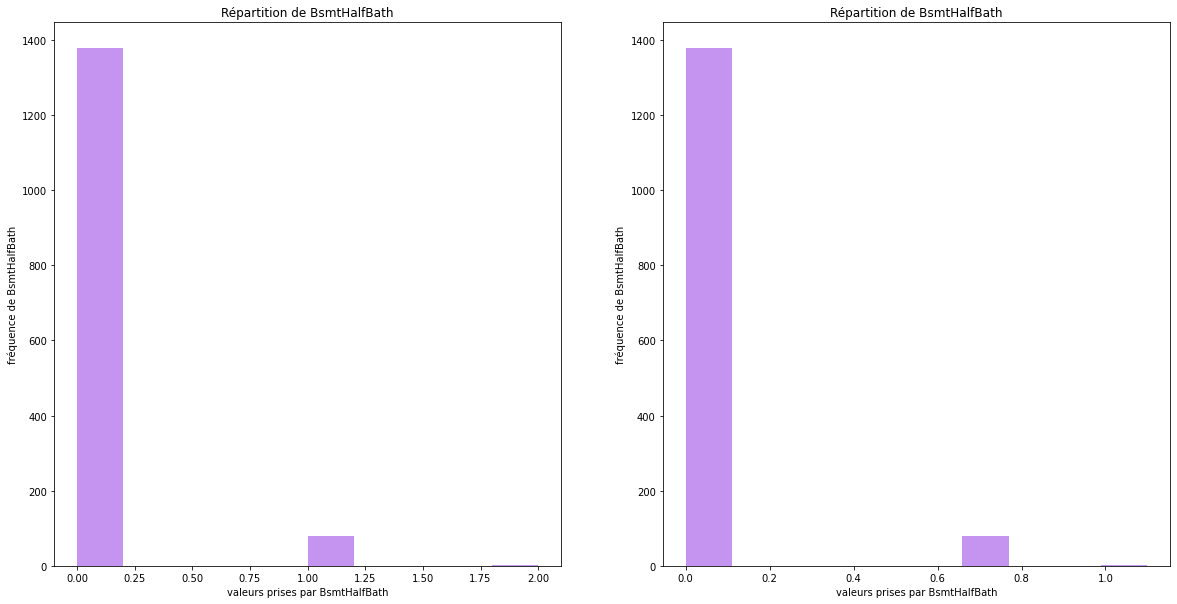

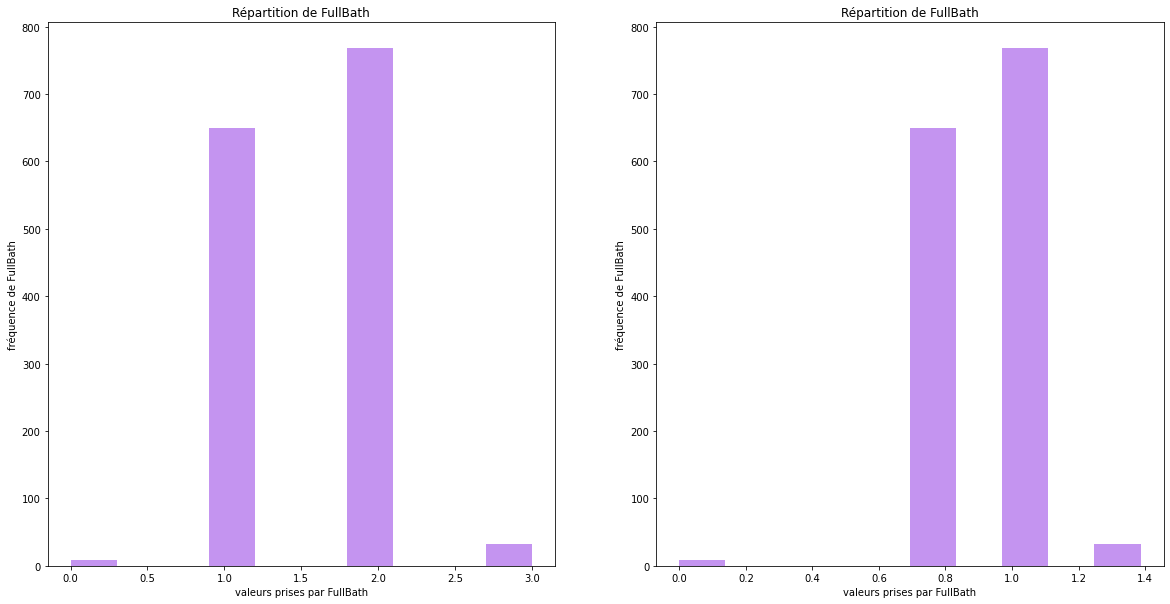

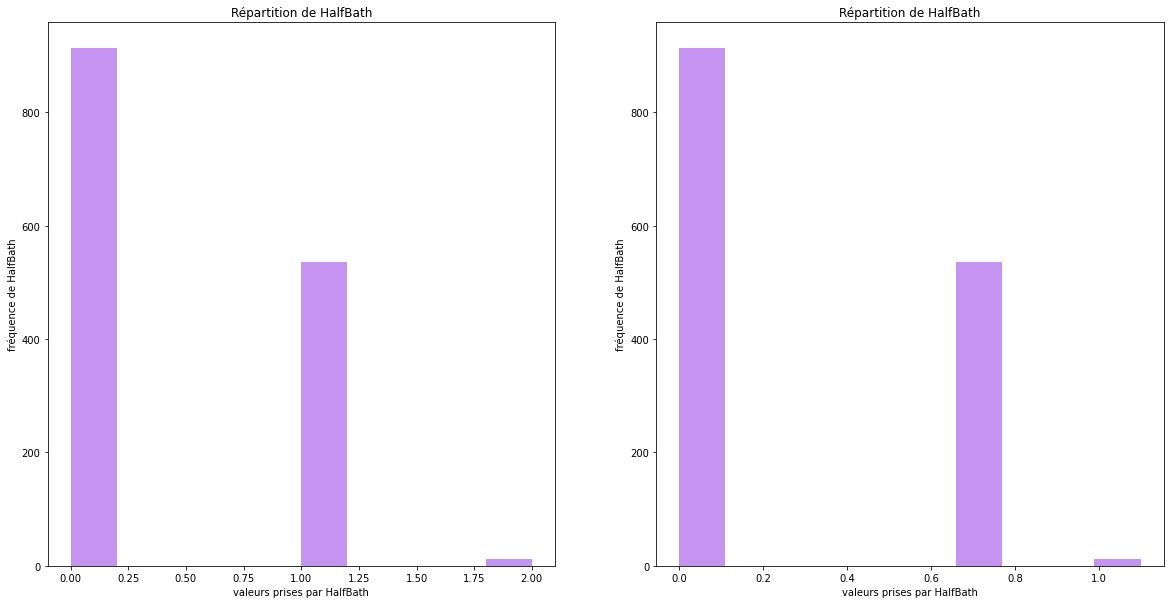

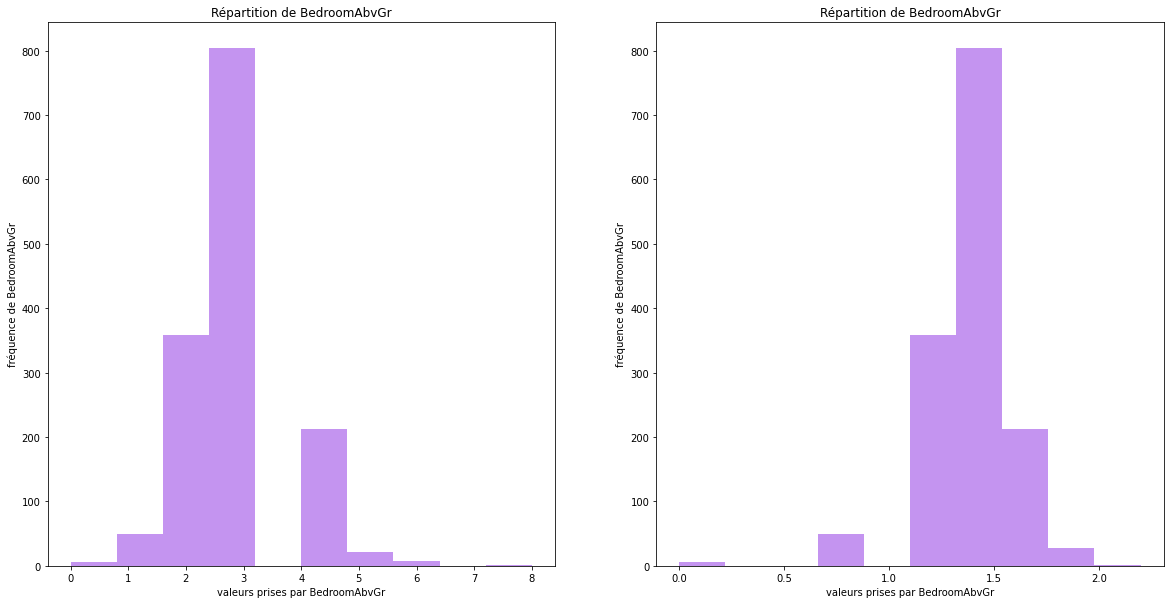

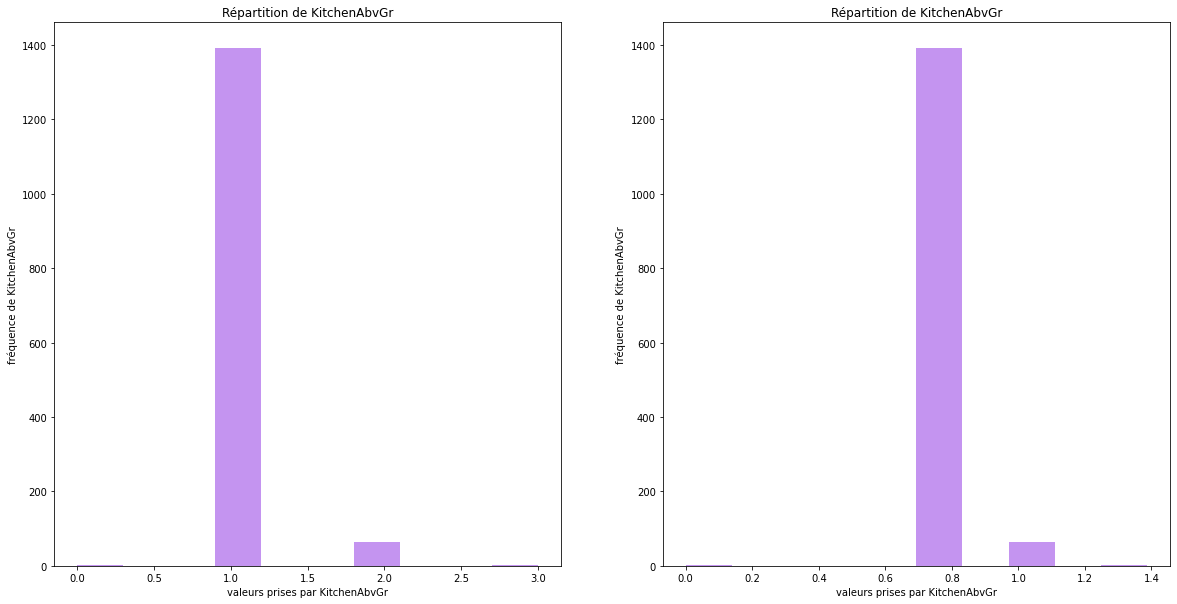

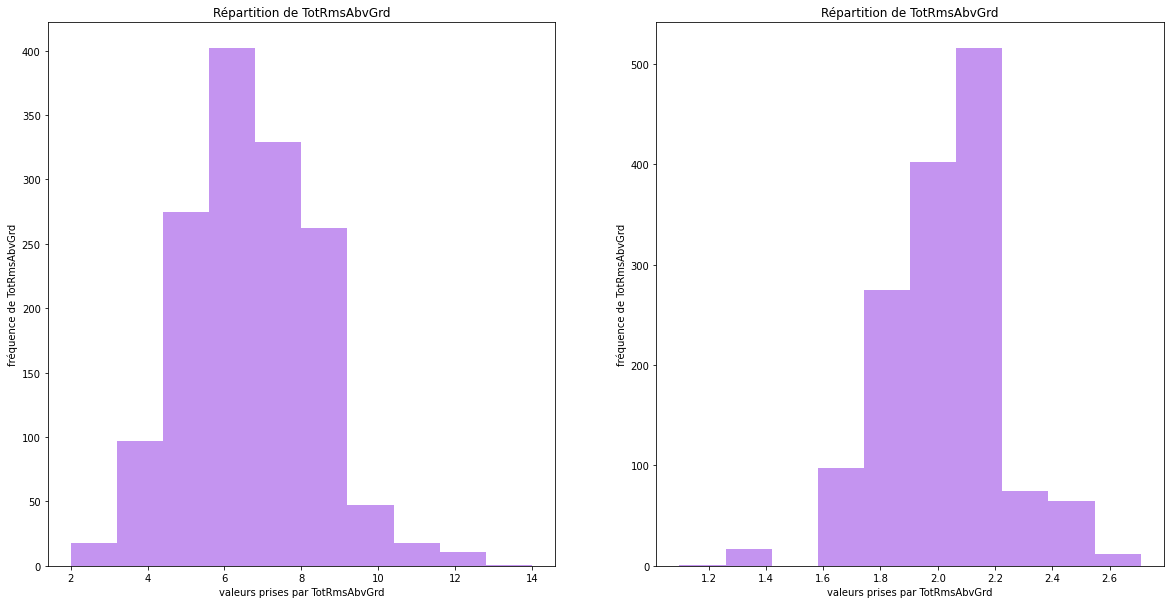

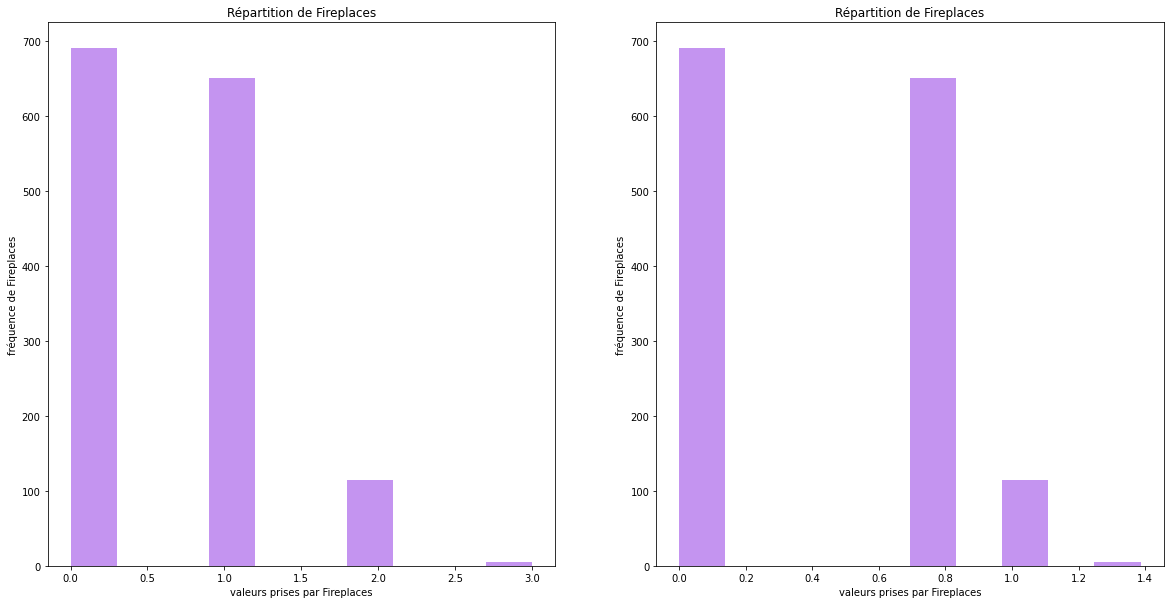

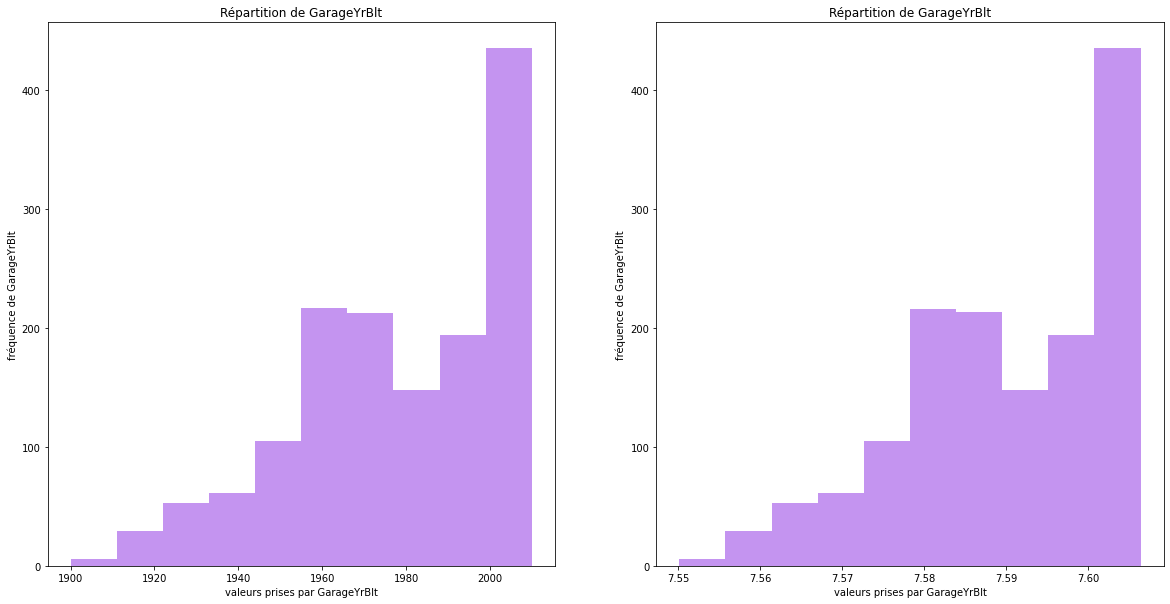

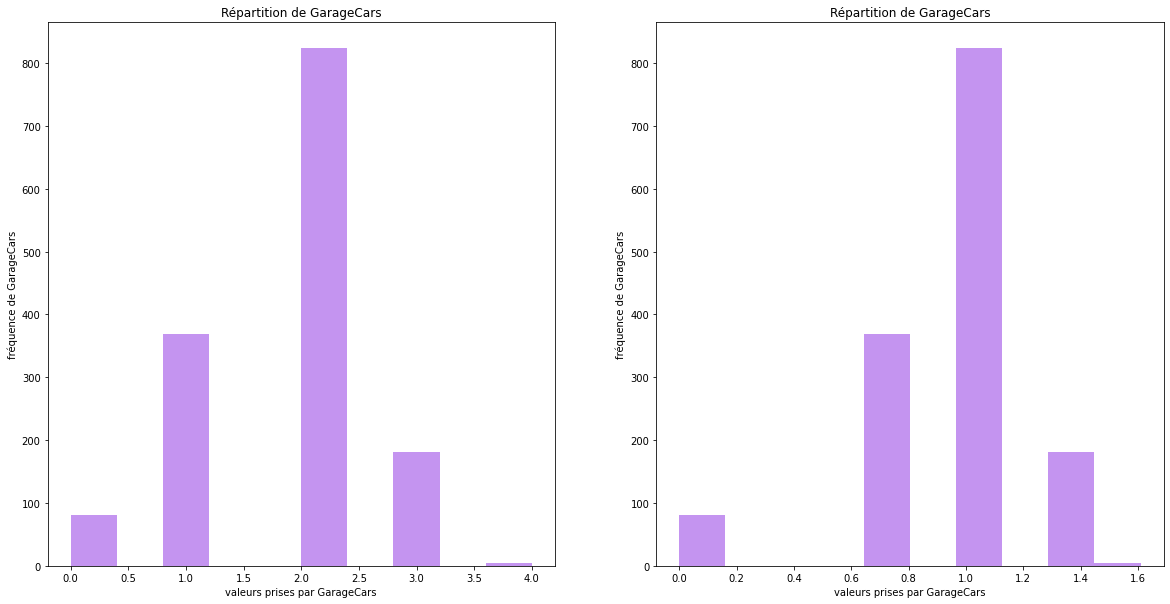

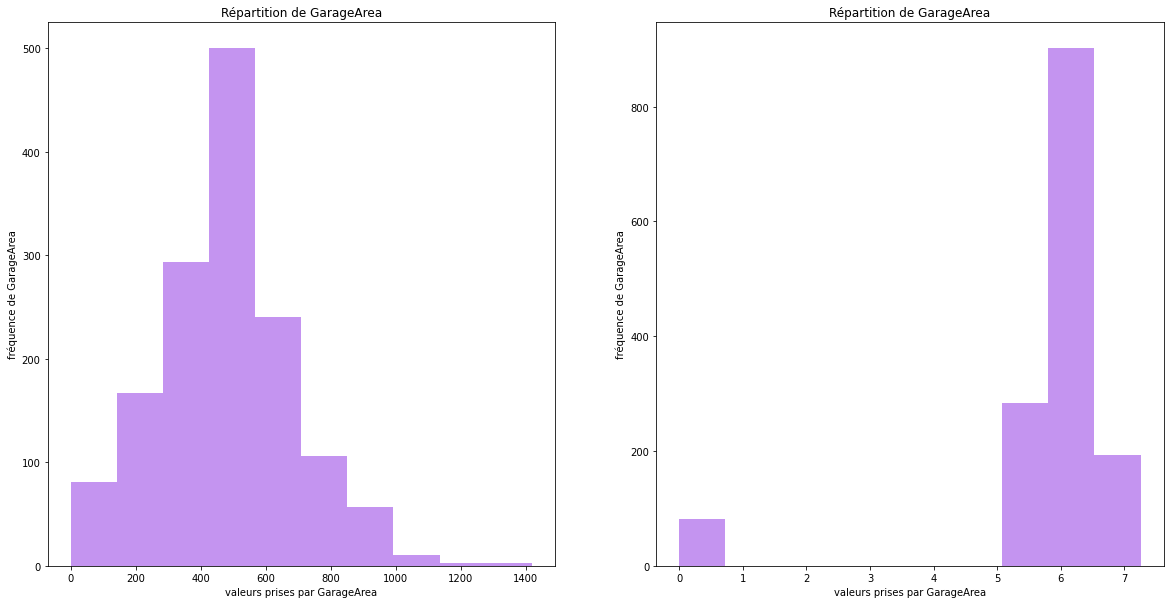

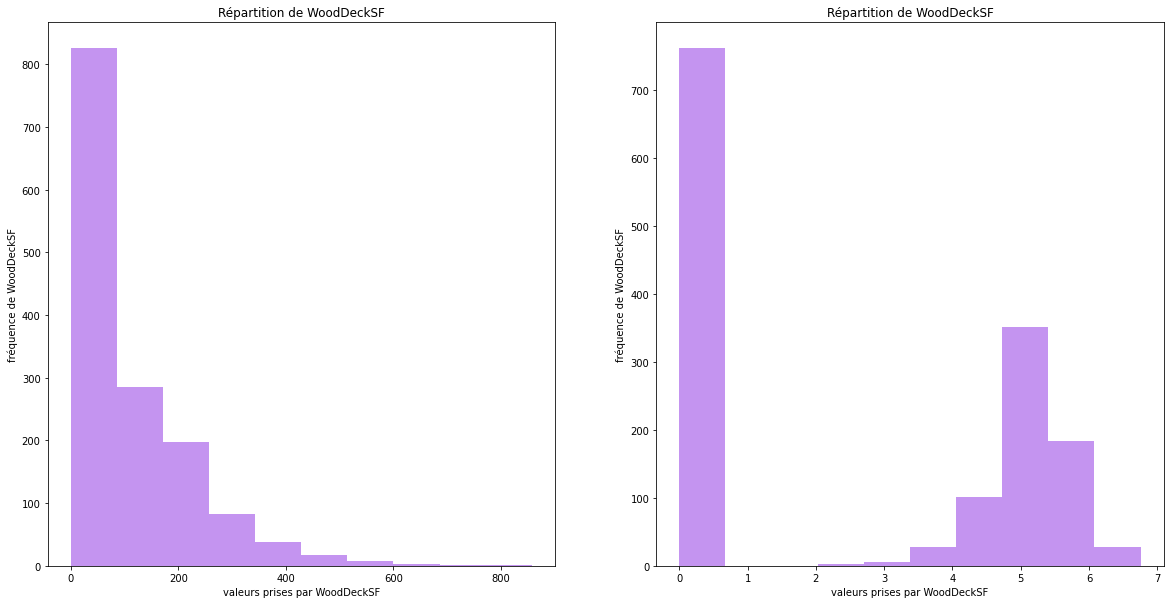

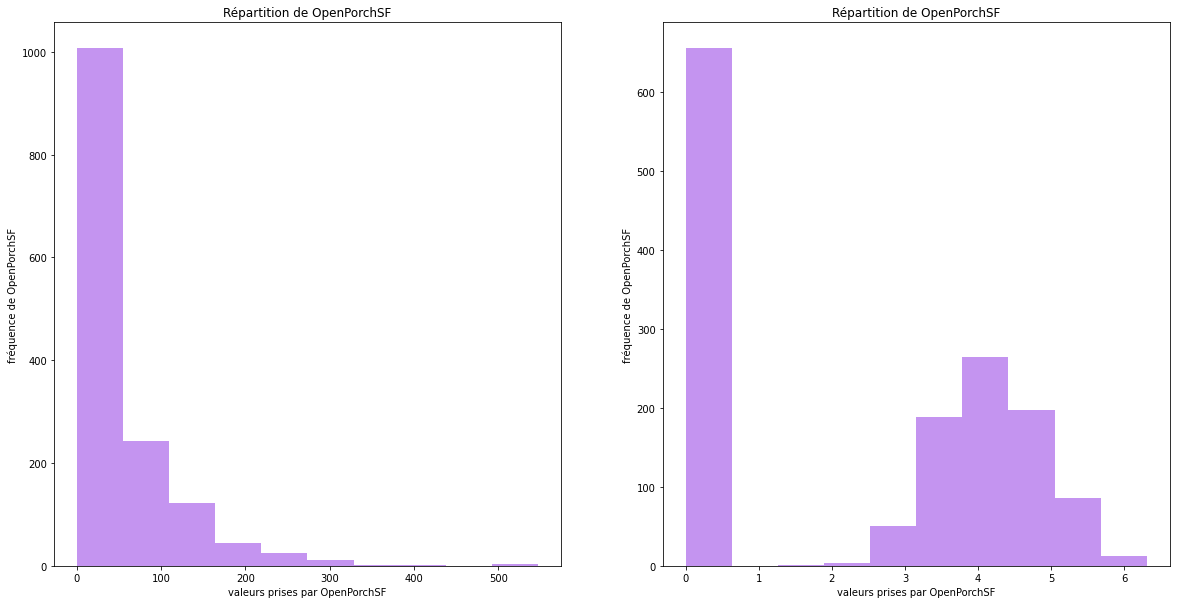

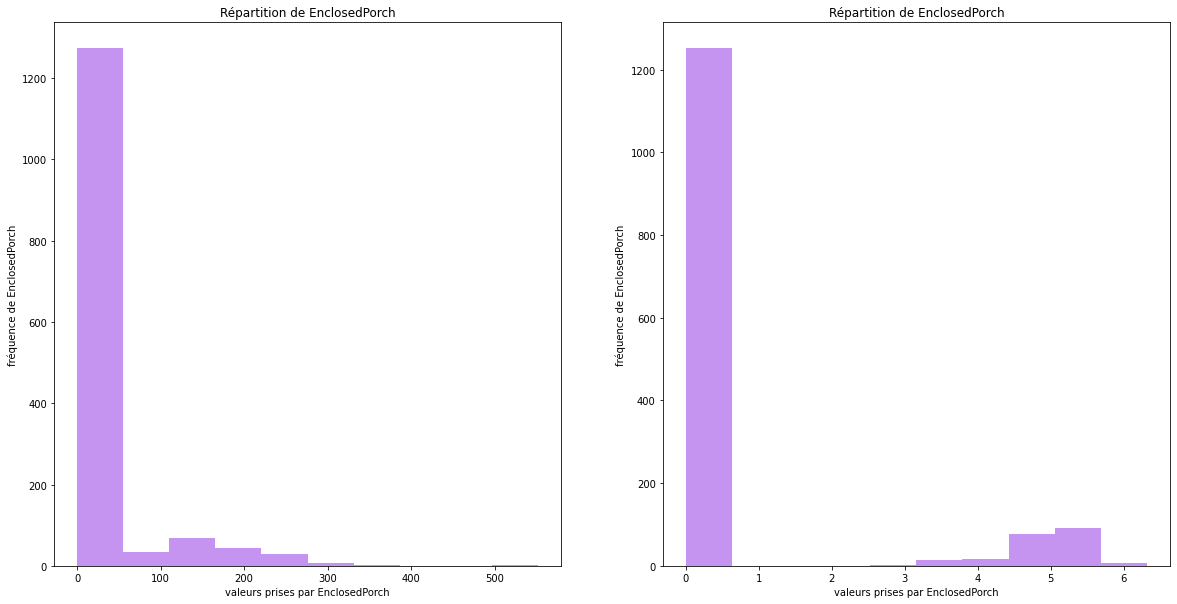

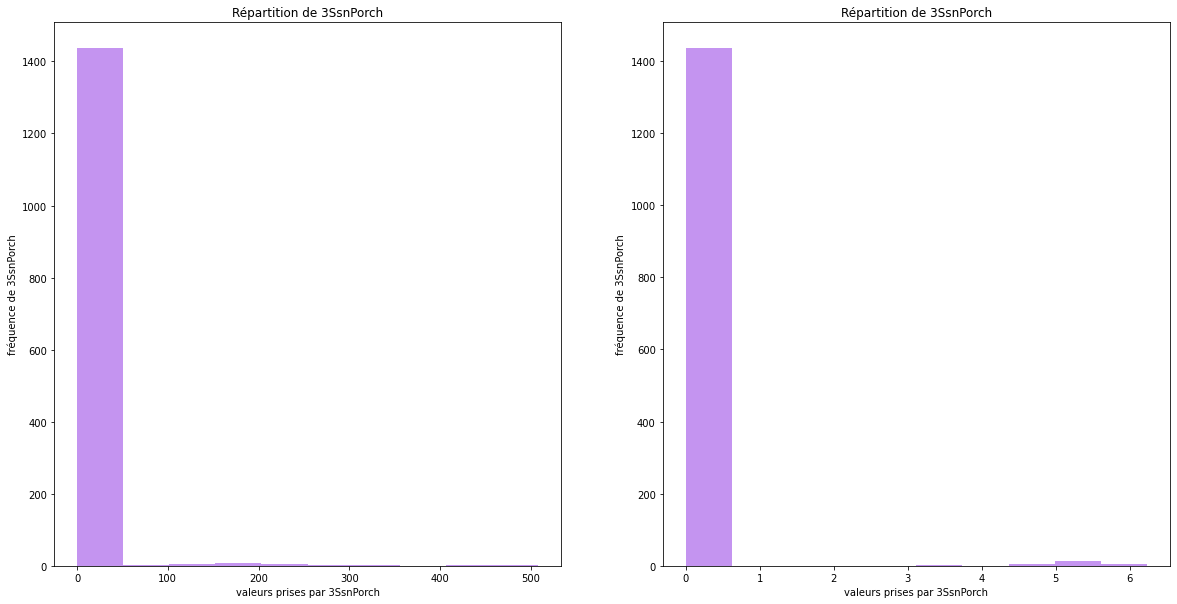

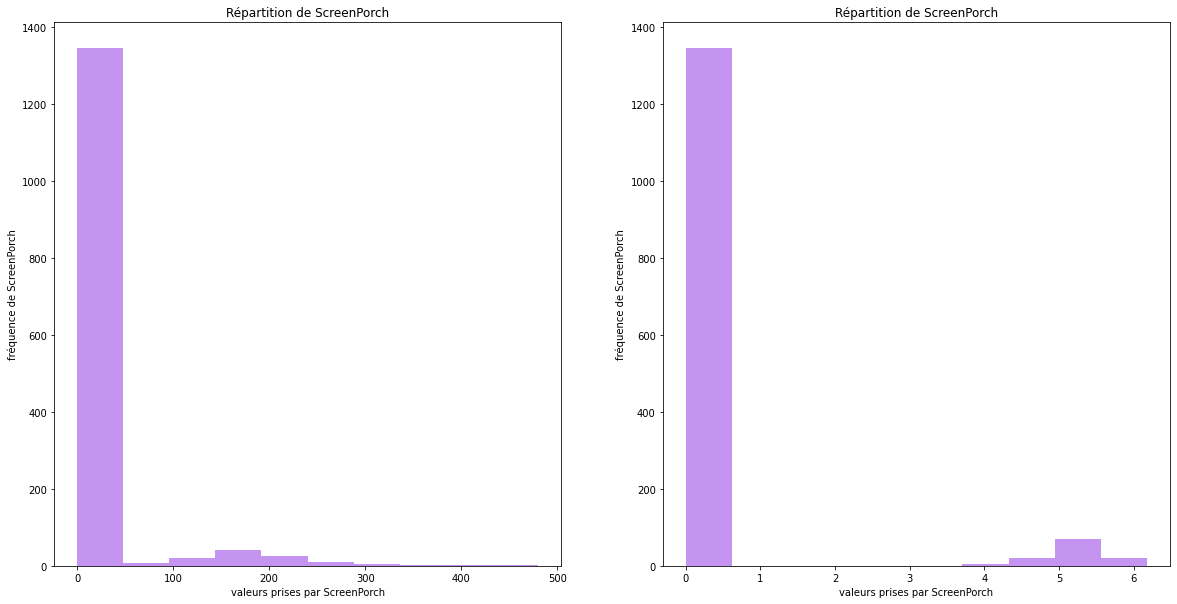

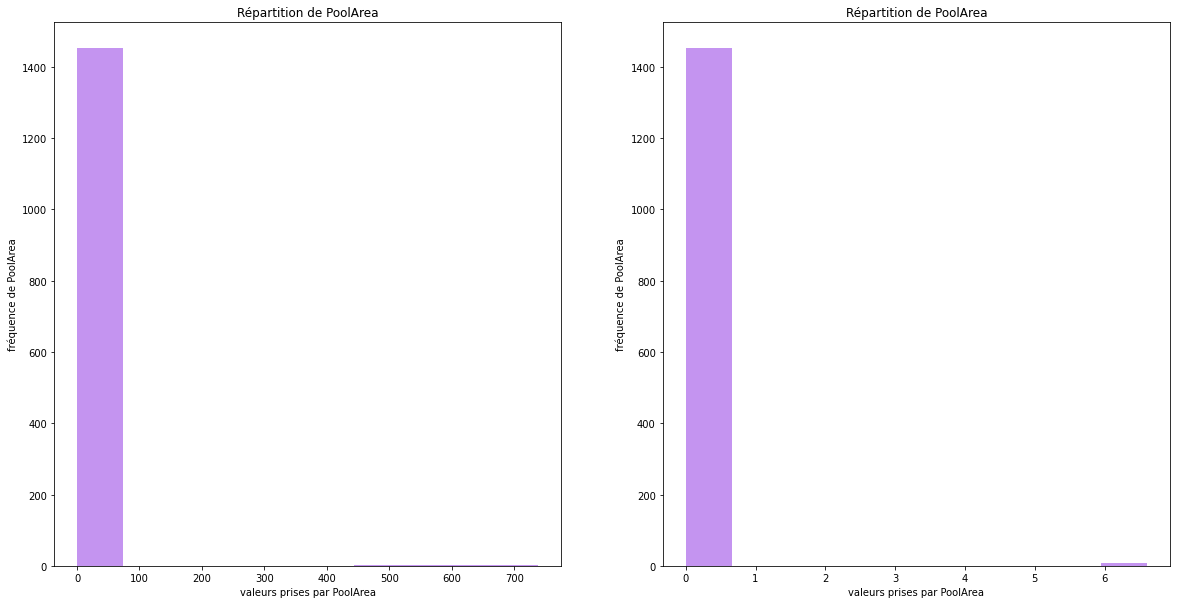

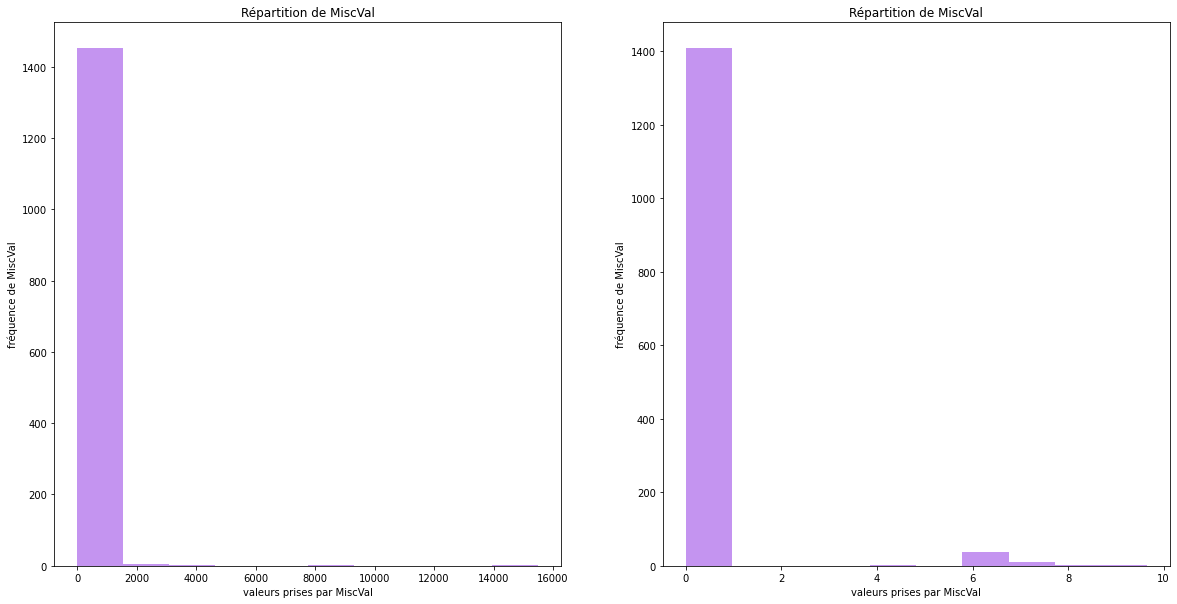

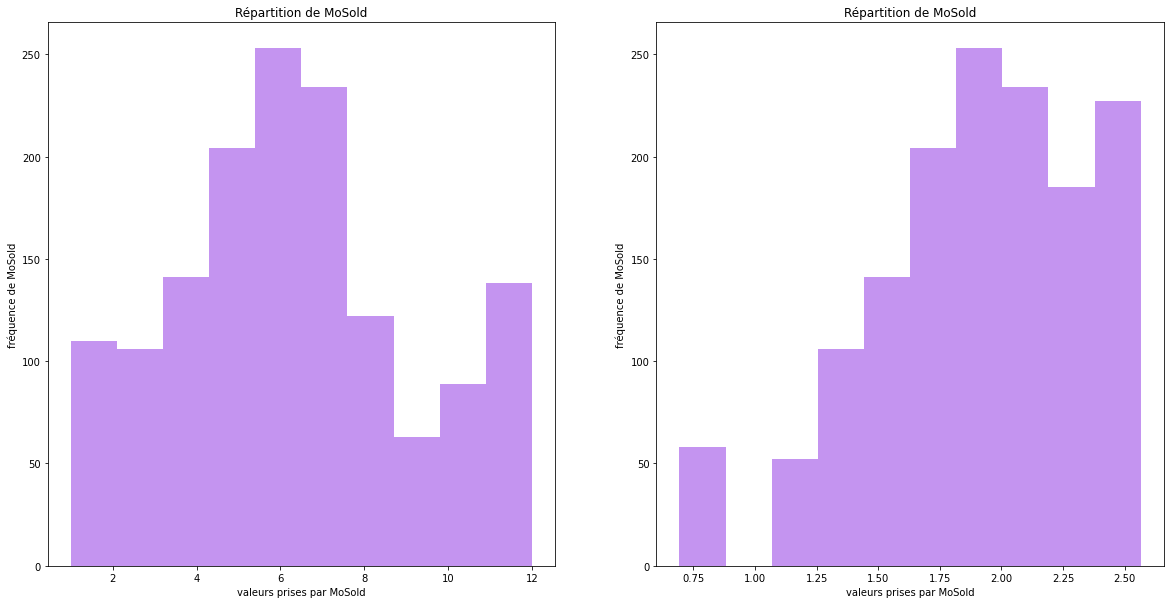

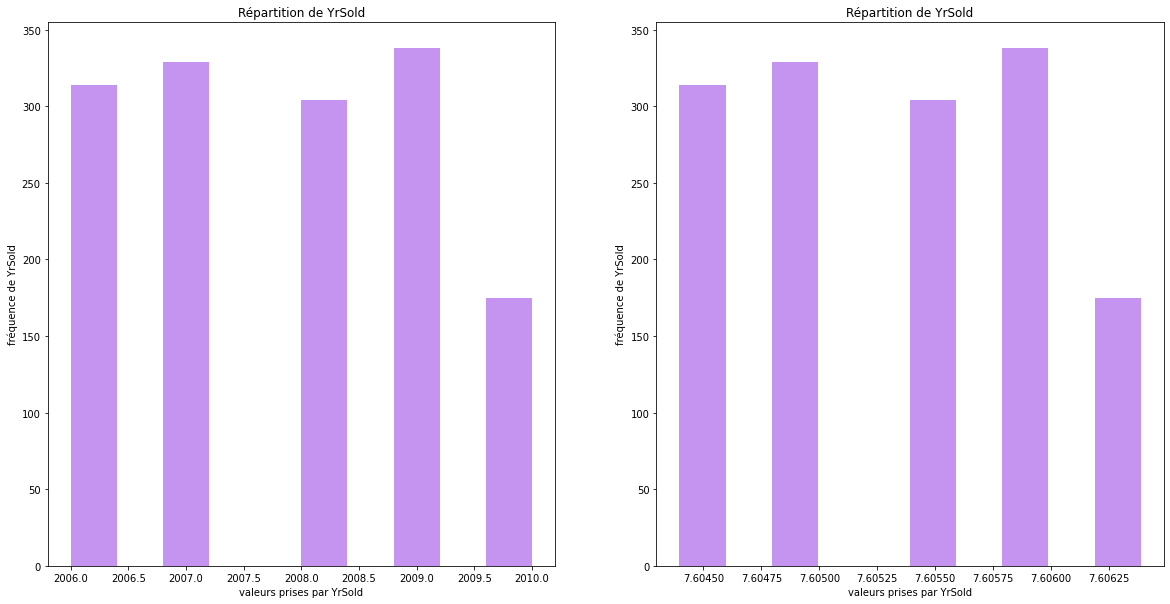

In [37]:
# log transform to reduce the value range
for col in num:
    if col != 'Id':
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

        ax[0].hist(df_train[col], color='blueviolet', alpha=0.5, histtype='barstacked')
        ax[0].set_xlabel('valeurs prises par {}'.format(col))
        ax[0].set_ylabel('fréquence de {}'.format(col))
        ax[0].set_title('Répartition de {}'.format(col))

        ax[1].hist(np.log(1+df_train[col]), color='blueviolet', alpha=0.5, histtype='barstacked')
        ax[1].set_xlabel('valeurs prises par {}'.format(col))
        ax[1].set_ylabel('fréquence de {}'.format(col))
        ax[1].set_title('Répartition de {}'.format(col))

        plt.show()
        
        # Passage au log
        df_train[col] = np.log(df_train[col] + 1) 
        df_test[col] = np.log(df_test[col] + 1)
        
y['SalePrice'] = np.log(y['SalePrice'].values + 1)

In [39]:
# Standardisation
scaler = StandardScaler()
scalery = StandardScaler()
df_train[num] = scaler.fit_transform(df_train[num].to_numpy())
df_test[num] = scaler.transform(df_test[num].to_numpy())
y['SalePrice'] = scalery.fit_transform(y['SalePrice'].values.reshape(-1,1))
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning3.0,MSZoning4.0,LotShape0.0,LotShape3.0,LotConfig0.0,LotConfig4.0,Neighborhood5.0,Neighborhood12.0,HouseStyle0.0,HouseStyle2.0,HouseStyle5.0,RoofStyle1.0,RoofStyle3.0,Exterior1st6.0,Exterior1st8.0,Exterior1st12.0,Exterior1st13.0,Exterior2nd6.0,Exterior2nd8.0,Exterior2nd13.0,Exterior2nd14.0,MasVnrType1.0,MasVnrType2.0,ExterQual2.0,ExterQual3.0,ExterCond2.0,ExterCond4.0,Foundation0.0,Foundation1.0,Foundation2.0,BsmtQual2.0,BsmtQual4.0,BsmtExposure0.0,BsmtExposure3.0,BsmtFinType10.0,BsmtFinType11.0,BsmtFinType12.0,BsmtFinType16.0,HeatingQC0.0,HeatingQC2.0,HeatingQC4.0,KitchenQual2.0,KitchenQual3.0,GarageType1.0,GarageType5.0,GarageFinish0.0,GarageFinish1.0,GarageFinish3.0
0,1.733238,-1.125202,0.512117,0.482944,-0.735707,0.455288,-0.331626,-1.155070,-0.813566,0.642211,2.342933,-0.024959,0.028608,-0.659886,-0.870117,-0.133602,-1.408978,-0.833225,-0.242923,-1.006612,-0.769639,-0.997834,-0.207607,-0.946189,-1.013562,-0.665377,-0.867435,0.540524,0.959934,-1.072916,-0.404244,-0.128521,3.126170,-0.069393,-0.190481,0.082470,1.644698,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.735610,-1.125202,0.547915,0.879380,0.027742,0.455288,-0.431095,-1.301918,0.968431,0.868926,-0.355342,0.194474,0.386245,0.581370,-0.870117,-0.133602,-0.226831,-0.833225,-0.242923,-1.006612,1.258580,0.253890,-0.207607,-0.226437,-1.013562,-0.787612,-0.867435,-0.042590,1.355840,0.605292,-0.404244,-0.128521,-0.292769,-0.069393,7.506556,0.082470,1.644698,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.737983,0.424462,0.287586,0.819235,-0.735707,-0.460408,0.850270,0.637809,-0.813566,0.817388,-0.355342,-0.389085,0.072948,-0.549422,1.120638,-0.133602,0.383637,-0.833225,-0.242923,0.809954,1.258580,0.253890,-0.207607,-0.226437,0.743356,0.787030,0.391154,0.255641,1.118873,0.579466,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,-1.233053,1.644698,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.740356,0.424462,0.439177,0.188077,0.027742,0.455288,0.882796,0.637809,0.342888,0.726234,-0.355342,0.073081,0.071066,-0.556213,1.110520,-0.133602,0.337248,-0.833225,-0.242923,0.809954,1.258580,0.253890,-0.207607,0.397039,0.743356,0.827000,0.391154,0.238346,1.322139,0.605292,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,0.082470,1.644698,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.742728,1.419810,-1.268294,-1.145753,1.272406,-0.460408,0.687397,0.349337,-0.813566,0.450086,-0.355342,0.689127,0.353470,0.463074,-0.870117,-0.133602,-0.339494,-0.833225,-0.242923,0.809954,-0.769639,-0.997834,-0.207607,-0.946189,-1.013562,0.586879,0.391154,0.288979,-0.946701,0.980782,-0.404244,-0.128521,3.255165,-0.069393,-0.190481,-2.862476,1.644698,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
# Adding of 'SalePrice'
num.append('SalePrice')
df_train = pd.concat([df_train, y], axis=1)
# Correlation 
cor = df_train[num].corr()
cor.style.background_gradient(cmap='coolwarm').set_precision(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.01,-0.01,-0.02,-0.03,0.01,-0.01,-0.02,-0.03,-0.01,-0.01,-0.01,-0.00,0.01,0.01,-0.03,0.00,0.00,-0.02,0.01,0.00,0.03,0.00,0.02,-0.01,0.01,0.02,0.01,-0.05,0.01,-0.01,-0.04,0.00,0.06,-0.04,0.02,0.00,-0.02
MSSubClass,0.01,1.00,-0.41,-0.38,0.09,-0.04,-0.00,0.04,0.01,-0.09,-0.09,-0.11,-0.11,-0.32,0.53,0.08,0.20,-0.05,0.00,0.18,0.29,0.01,0.25,0.13,0.01,0.05,-0.01,-0.07,0.04,0.03,0.01,-0.04,-0.02,0.03,-0.03,0.02,-0.03,-0.02
LotFrontage,-0.01,-0.41,1.00,0.74,0.18,-0.01,0.06,0.04,0.11,0.08,0.06,0.08,0.12,0.44,-0.04,-0.00,0.35,0.07,0.02,0.16,0.03,0.30,0.02,0.36,0.25,0.03,0.25,0.19,0.06,0.13,-0.01,0.07,0.06,0.12,0.04,0.01,0.01,0.35
LotArea,-0.02,-0.38,0.74,1.00,0.17,-0.01,0.02,0.03,0.07,0.10,0.08,0.05,0.13,0.47,-0.01,-0.01,0.39,0.13,0.05,0.16,0.04,0.27,0.00,0.37,0.31,-0.00,0.26,0.21,0.12,0.14,-0.02,0.06,0.09,0.10,0.08,-0.01,-0.03,0.40
OverallQual,-0.03,0.09,0.18,0.17,1.00,-0.01,0.56,0.54,0.40,0.06,-0.08,0.27,0.36,0.44,0.21,-0.03,0.61,0.11,-0.03,0.54,0.28,0.13,-0.19,0.43,0.41,0.52,0.56,0.39,0.27,0.43,-0.15,0.03,0.06,0.06,-0.08,0.07,-0.03,0.80
OverallCond,0.01,-0.04,-0.01,-0.01,-0.01,1.00,-0.32,0.09,-0.14,0.06,0.08,-0.03,0.02,-0.12,0.06,0.02,-0.09,-0.05,0.11,-0.16,-0.05,0.03,-0.09,-0.05,-0.02,-0.26,-0.12,-0.01,-0.03,-0.08,0.08,0.04,0.06,-0.01,0.07,0.02,0.03,-0.00
YearBuilt,-0.01,-0.00,0.06,0.02,0.56,-0.32,1.00,0.59,0.41,0.15,-0.07,0.09,0.20,0.28,-0.08,-0.18,0.23,0.19,-0.04,0.46,0.25,-0.06,-0.17,0.10,0.18,0.80,0.51,0.34,0.31,0.39,-0.45,0.03,-0.06,0.01,-0.08,0.00,-0.01,0.58
YearRemodAdd,-0.02,0.04,0.04,0.03,0.54,0.09,0.59,1.00,0.23,0.01,-0.10,0.17,0.21,0.23,0.07,-0.06,0.31,0.12,-0.01,0.43,0.19,-0.03,-0.15,0.20,0.14,0.62,0.38,0.21,0.29,0.38,-0.23,0.05,-0.04,0.01,-0.07,0.02,0.04,0.57
MasVnrArea,-0.03,0.01,0.11,0.07,0.40,-0.14,0.41,0.23,1.00,0.19,-0.06,0.09,0.19,0.33,-0.02,-0.11,0.31,0.13,0.04,0.28,0.15,0.09,-0.06,0.24,0.24,0.33,0.36,0.24,0.16,0.21,-0.18,0.05,0.04,0.01,-0.05,0.01,-0.00,0.42
BsmtFinSF1,-0.01,-0.09,0.08,0.10,0.06,0.06,0.15,0.01,0.19,1.00,0.19,-0.27,0.29,0.20,-0.21,-0.06,-0.01,0.60,0.11,-0.09,-0.01,-0.10,-0.13,-0.09,0.13,0.05,0.09,0.12,0.08,0.02,-0.13,0.05,0.07,0.04,0.02,-0.03,0.03,0.21


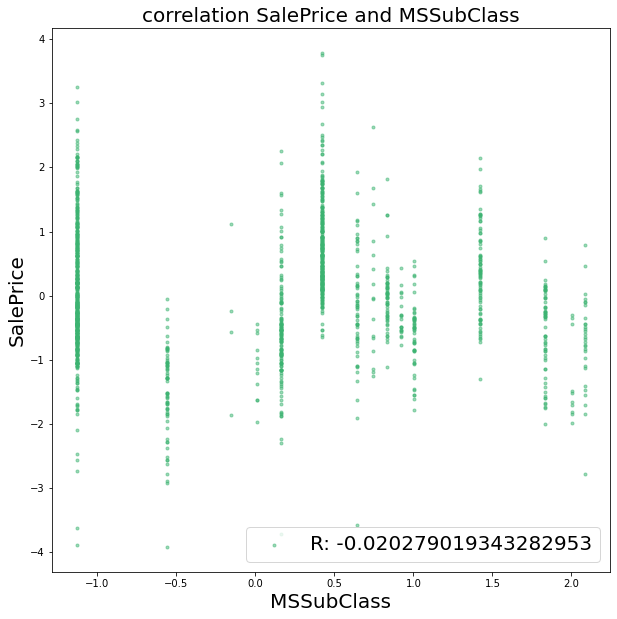

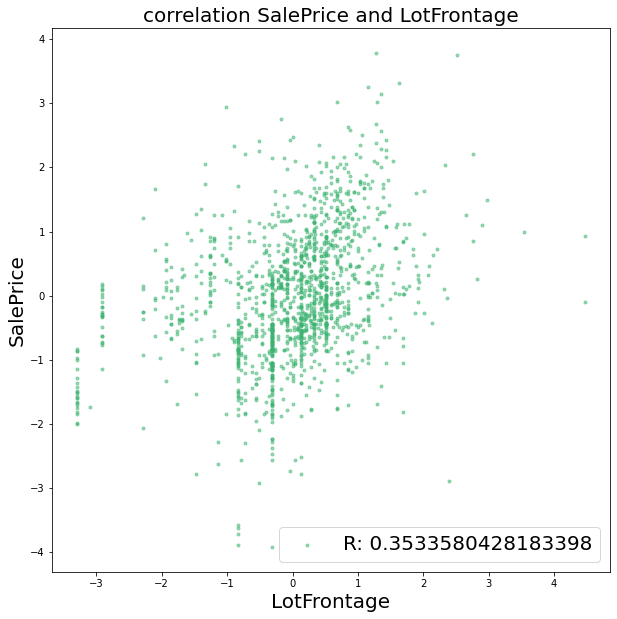

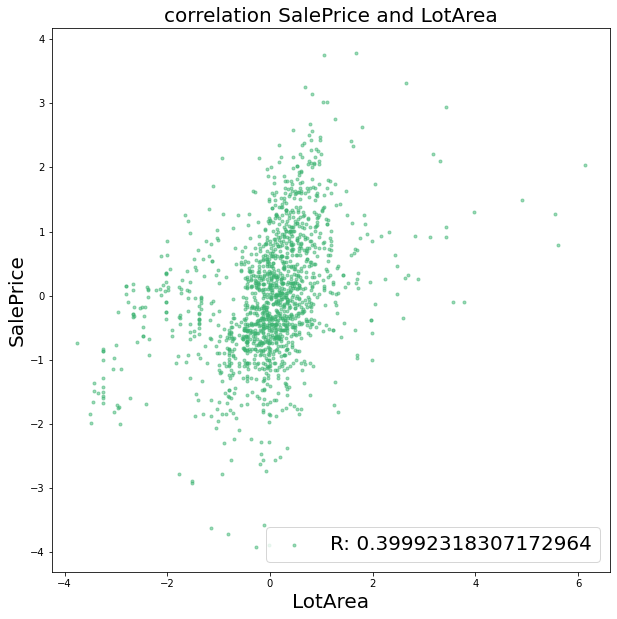

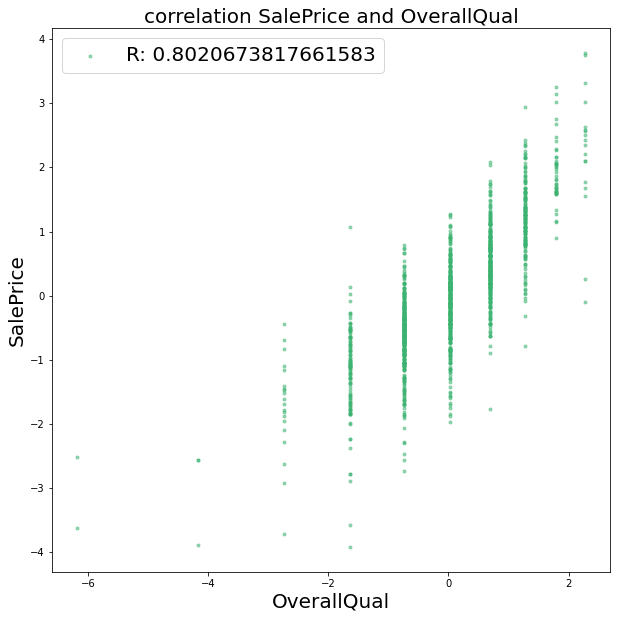

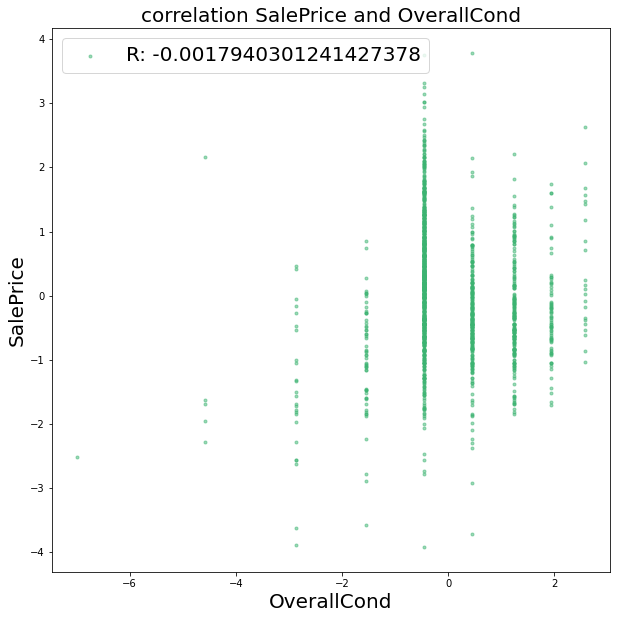

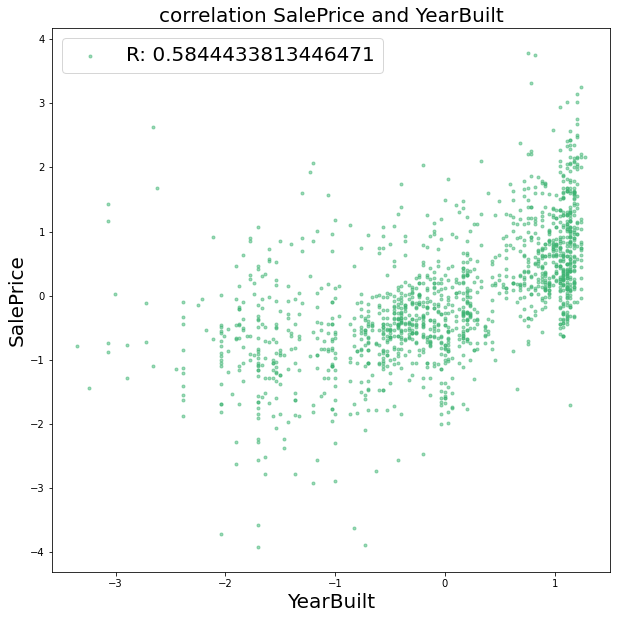

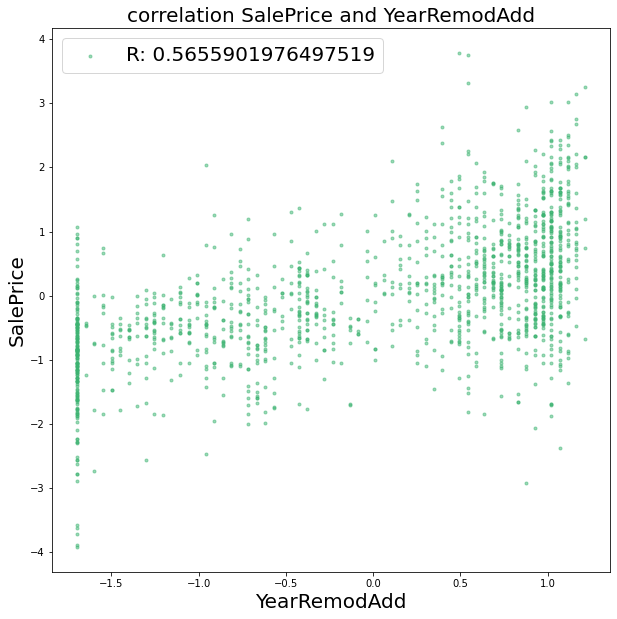

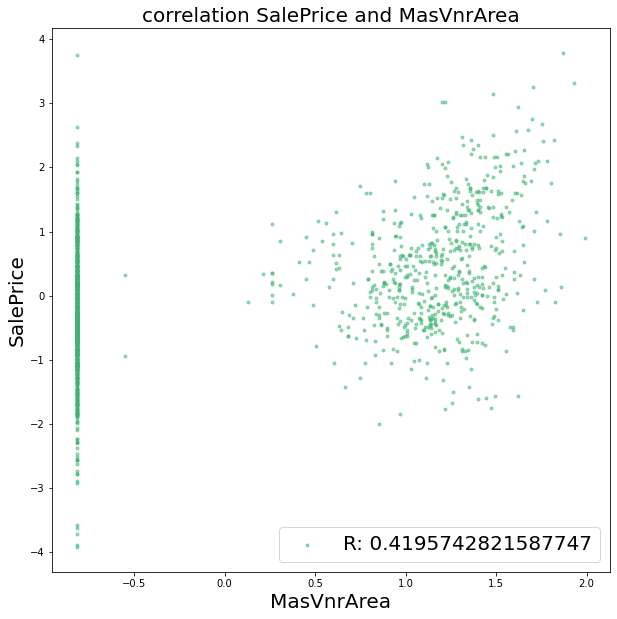

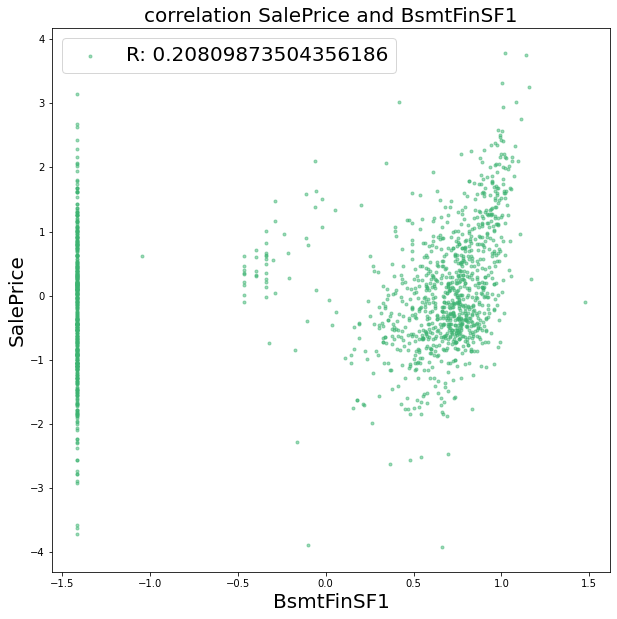

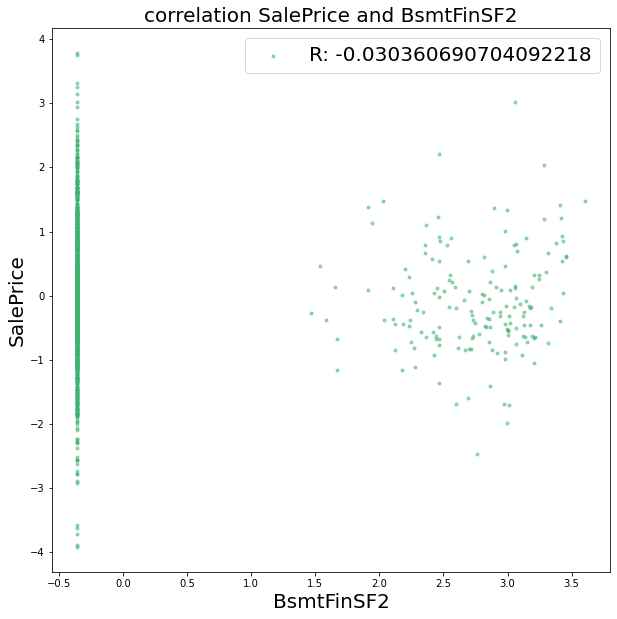

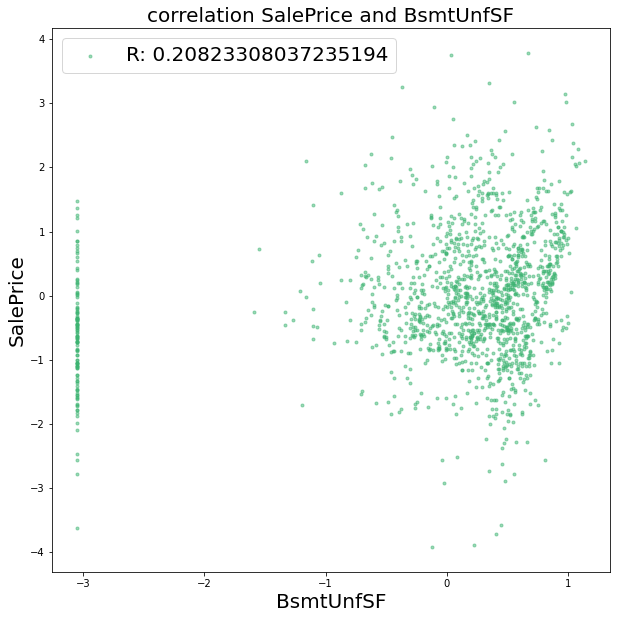

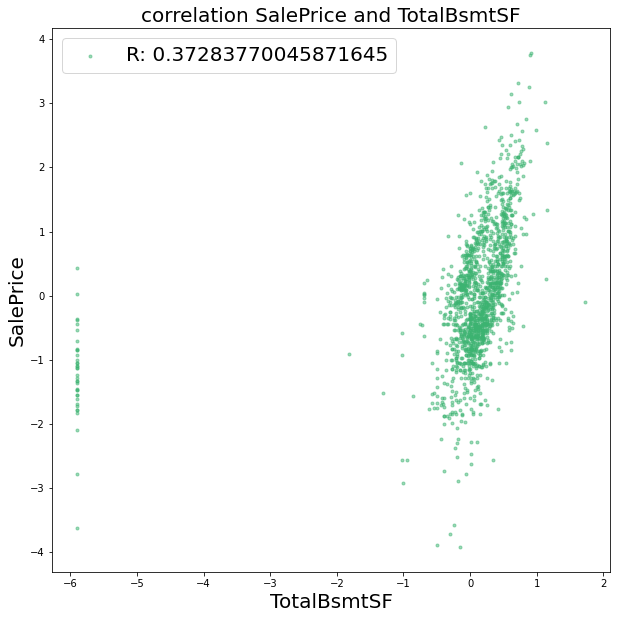

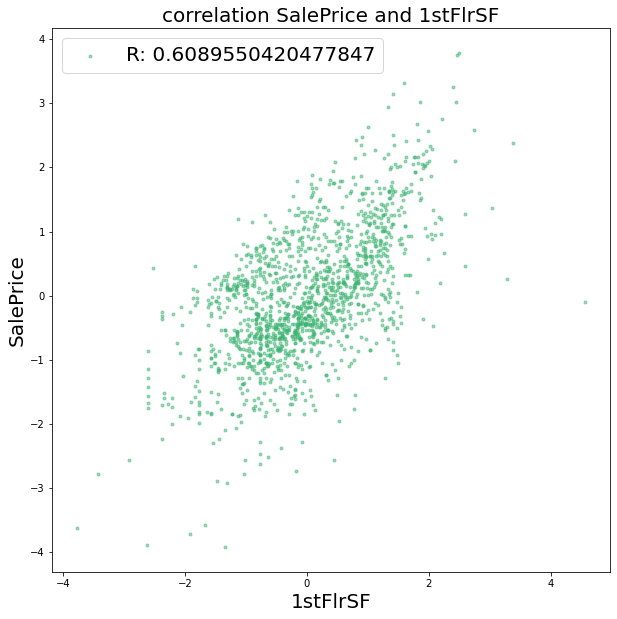

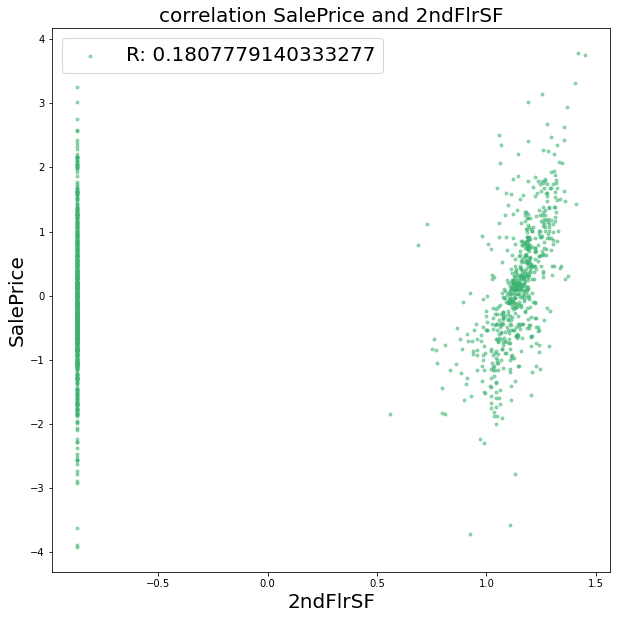

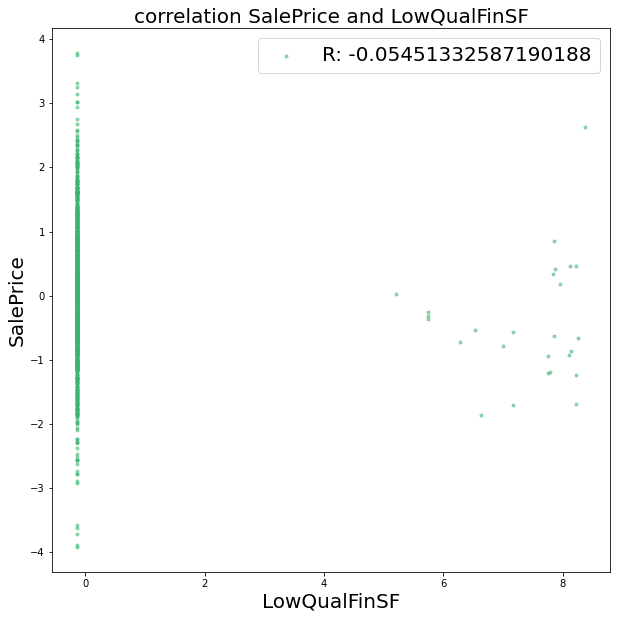

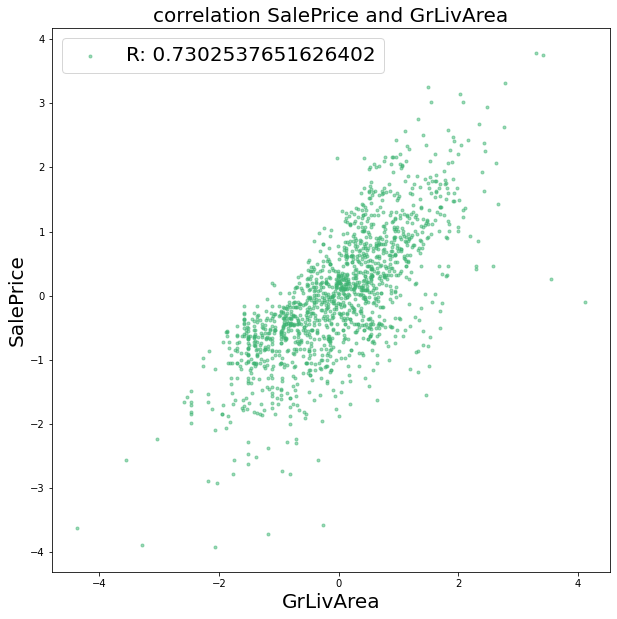

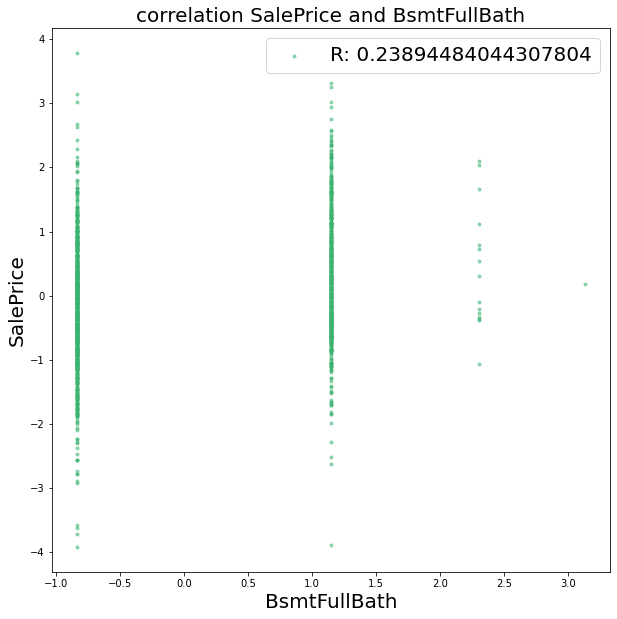

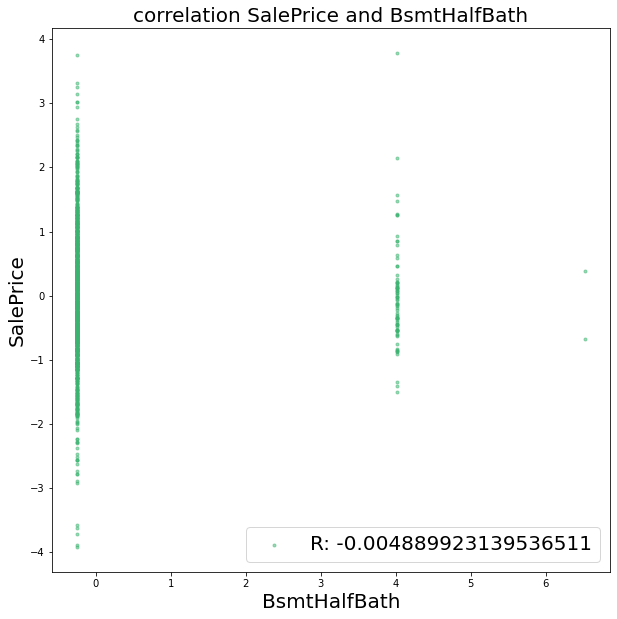

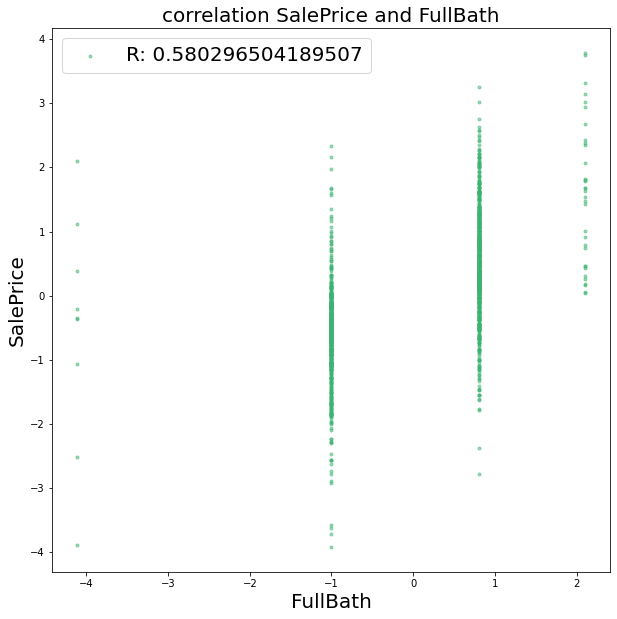

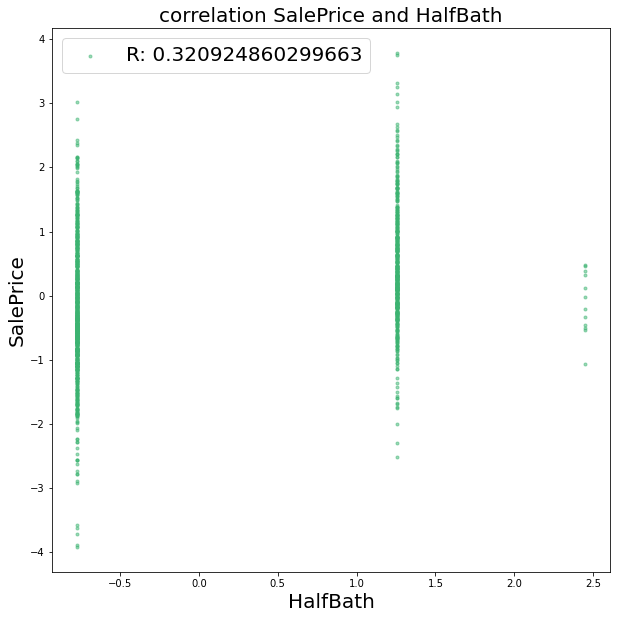

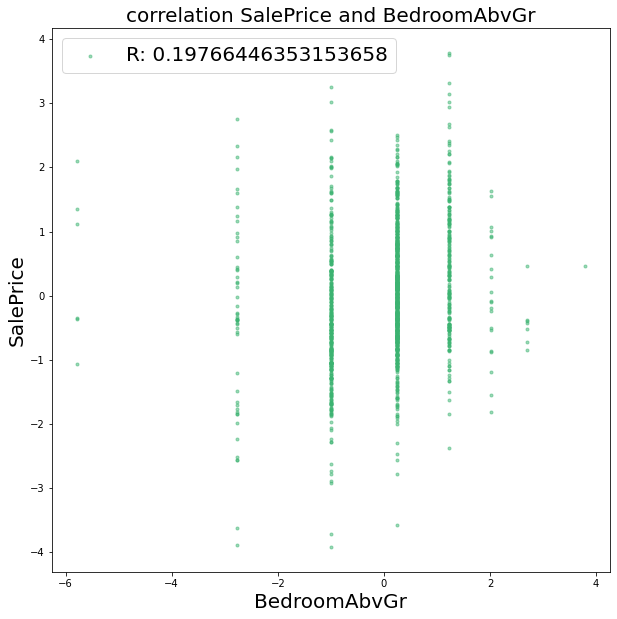

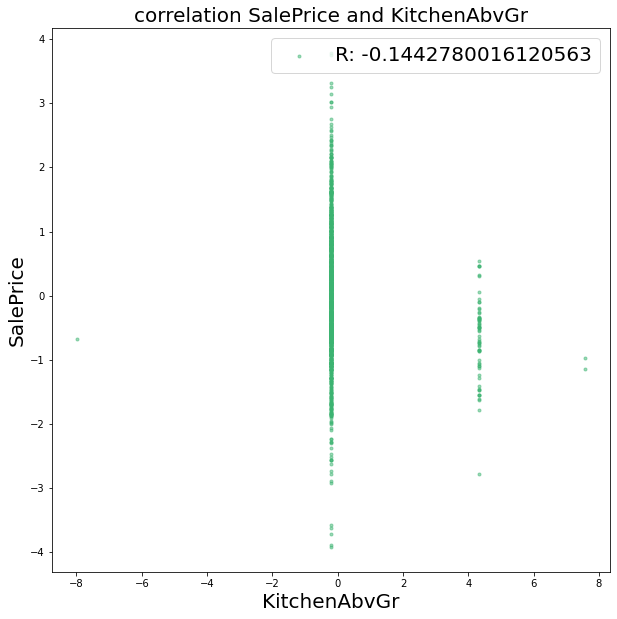

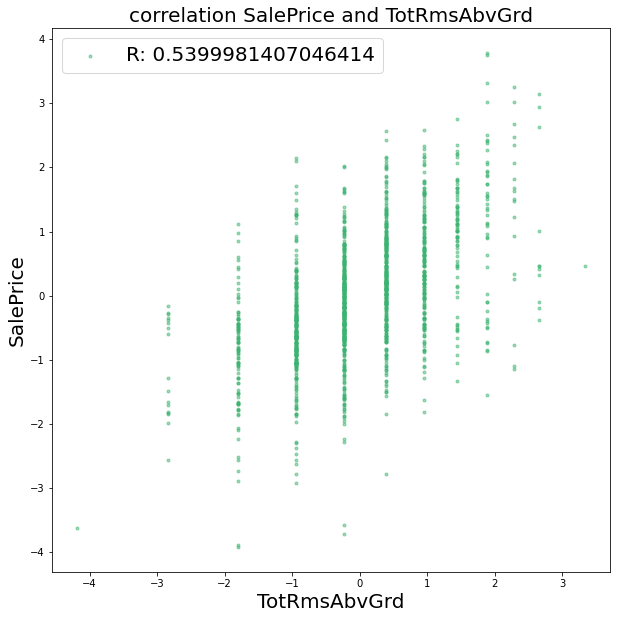

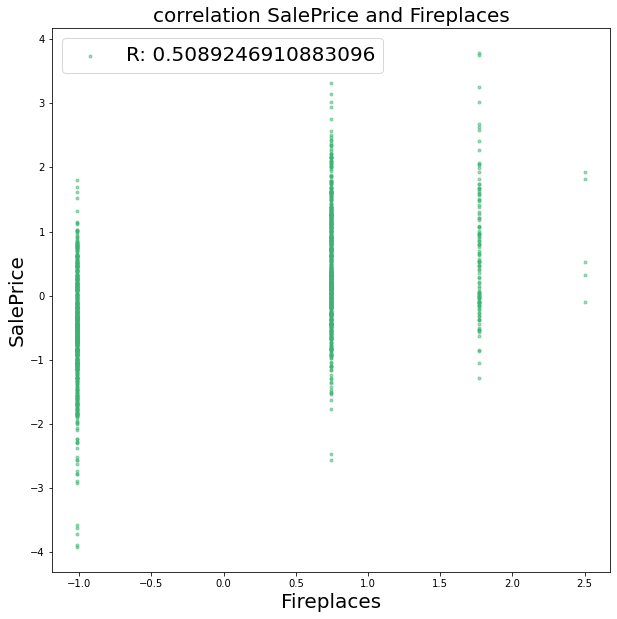

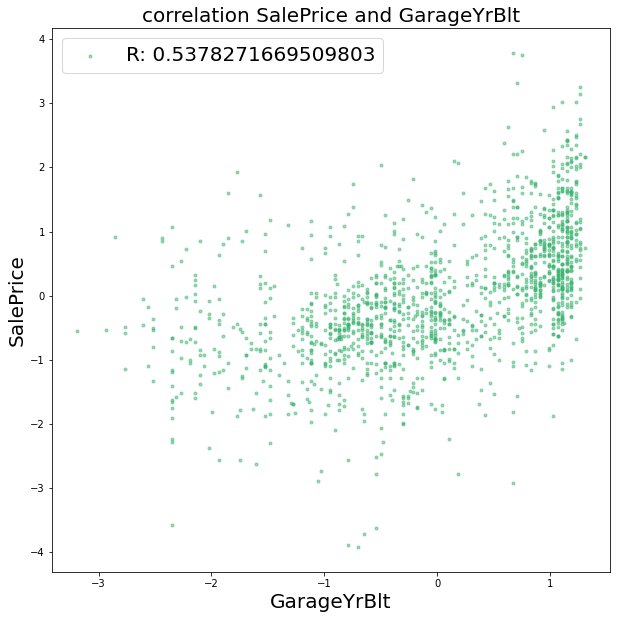

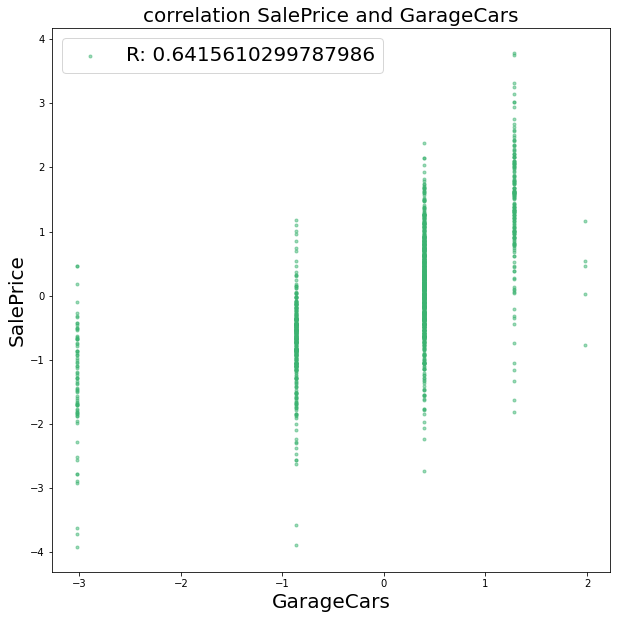

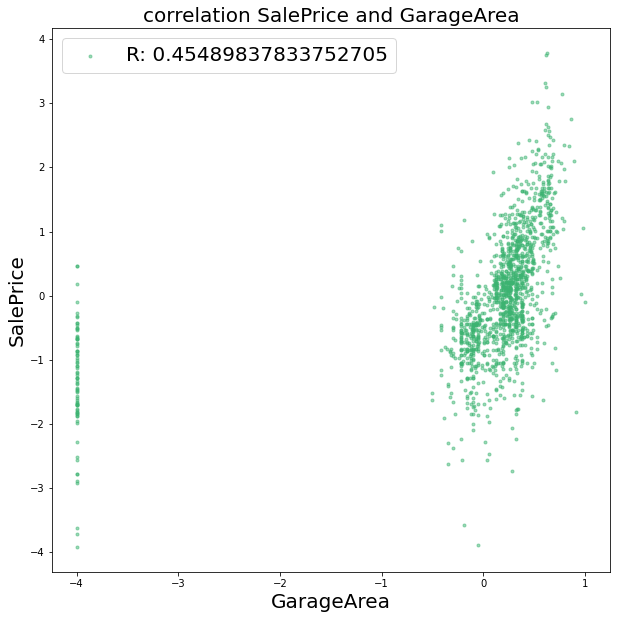

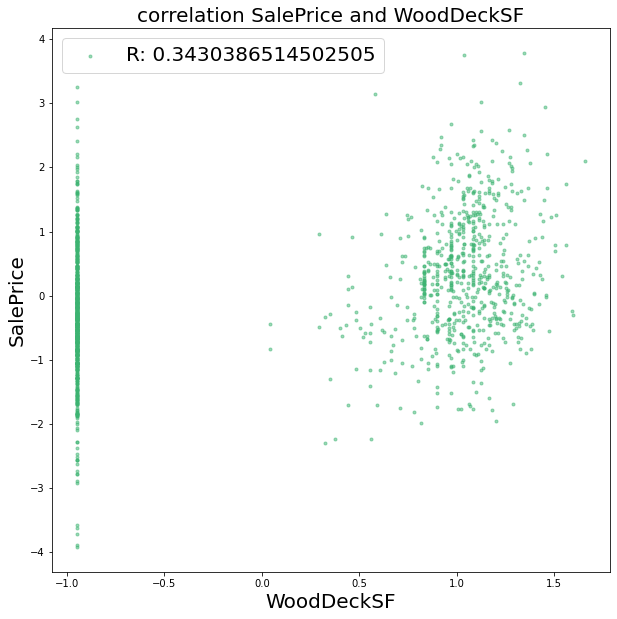

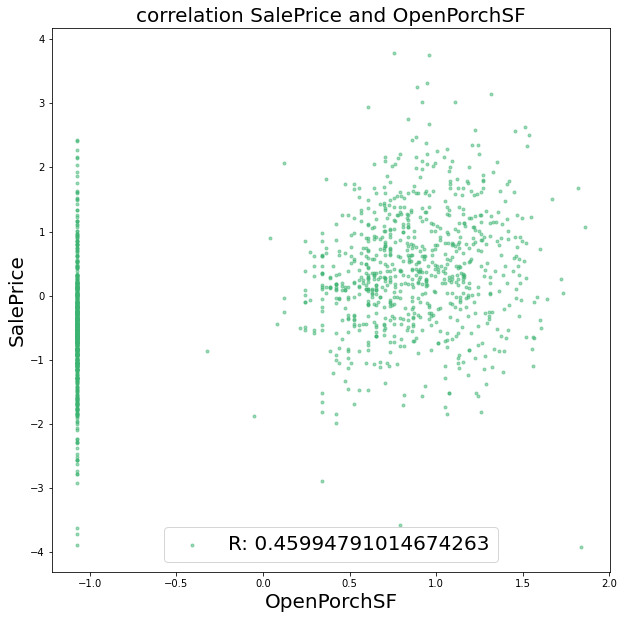

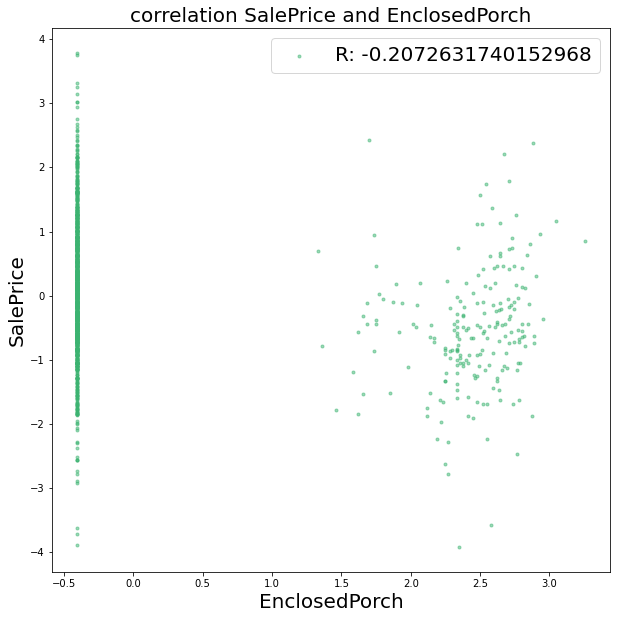

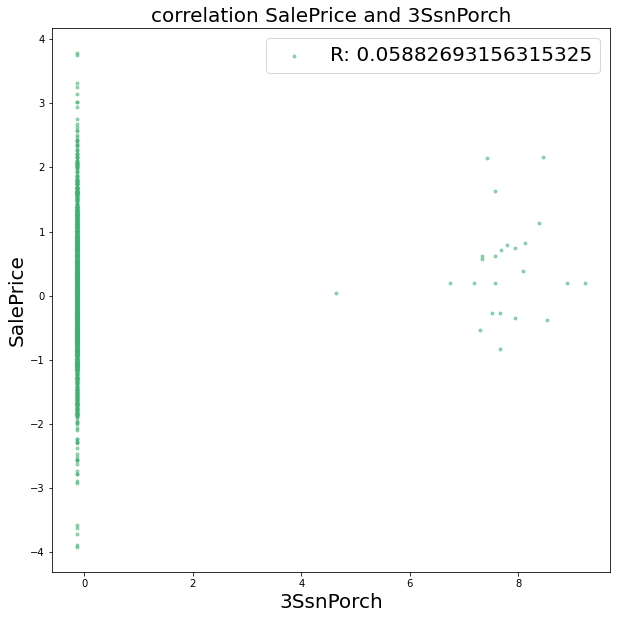

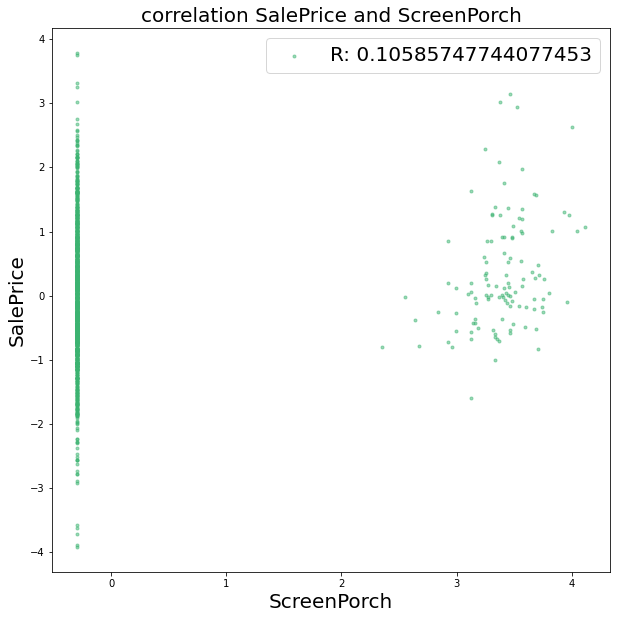

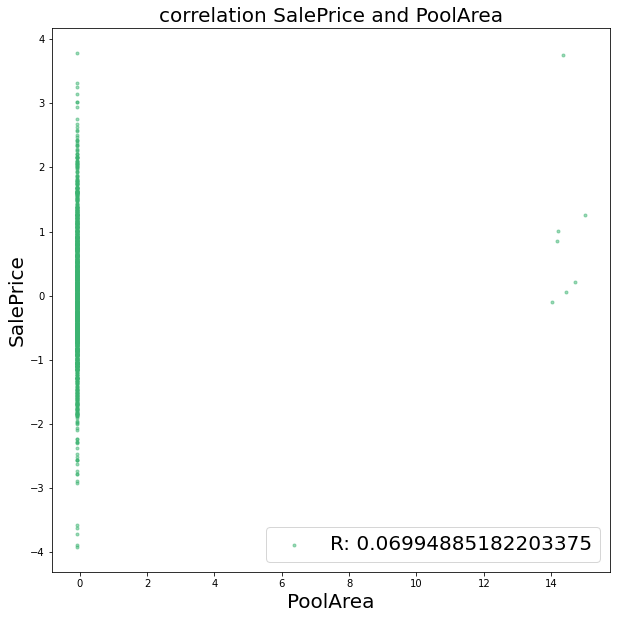

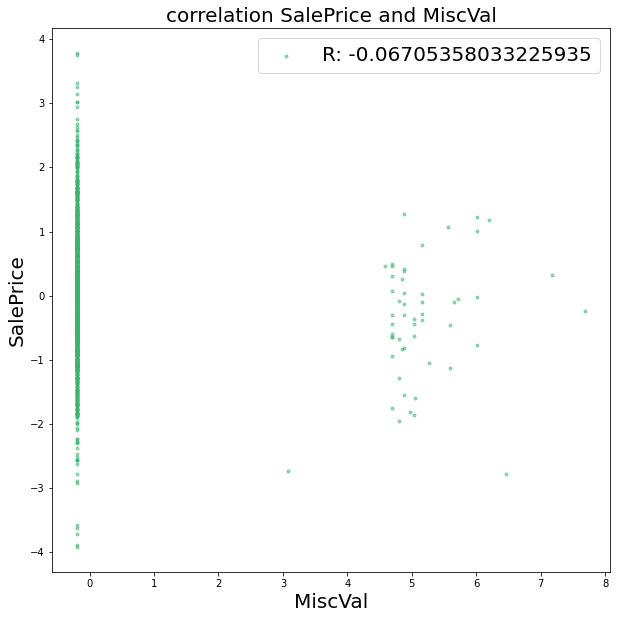

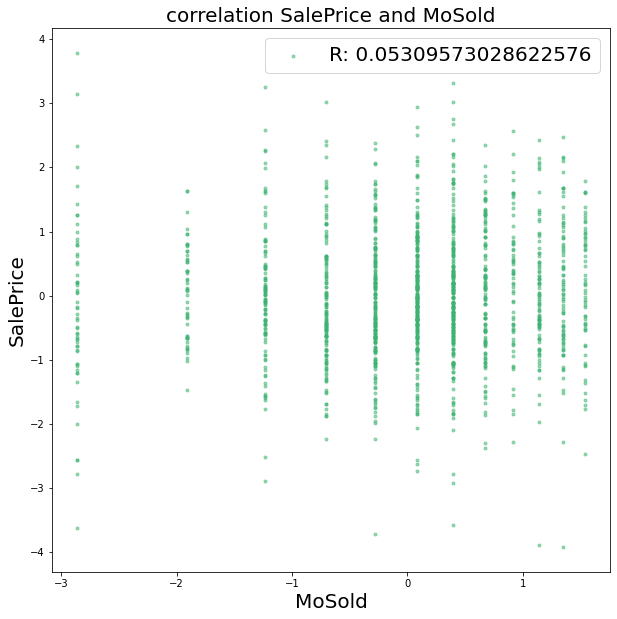

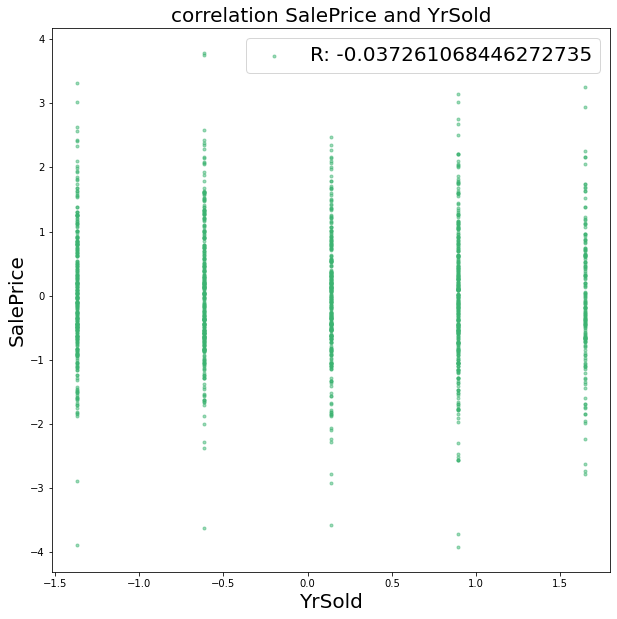

In [41]:
# correlation display
for col in num:
    if col not in ['Id', 'SalePrice']:
        r = np.corrcoef(df_train[col].values, df_train['SalePrice'].values)[0][1]
        print(r)
        plt.figure(figsize=(10, 10))
        plt.scatter(df_train[col].values, df_train['SalePrice'].values, marker='.', alpha=0.5, color = 'mediumseagreen', label="R: {}".format(r))
        plt.xlabel("{}".format(col), fontsize=20)
        plt.ylabel("SalePrice", fontsize=20)
        plt.title("correlation SalePrice and {}".format(col), fontsize=20)
        plt.legend(fontsize=20)
        plt.show()

In [42]:
# We suppress all the feature 
# which are not enough correlated
# with 'SalePrice'

# list of feature with 
# low correlation with 
# 'SalesPrice'

low_cor = cor['SalePrice'].where(abs(cor['SalePrice']) < 0.3 ).dropna().index.tolist()
for col in low_cor:
    if col != 'Id' and col != 'SalePrice':
        del(df_train[col])
        del(df_test[col])

In [44]:
# new display of correlation
new_num = []
for col in df_train:
    if col in num:
        new_num.append(col)
        
cor = df_train[new_num].corr()
cor.style.background_gradient(cmap='coolwarm').set_precision(2)

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,1.00,-0.01,-0.02,-0.03,-0.01,-0.02,-0.03,-0.00,0.01,0.00,0.01,0.00,0.02,-0.01,0.01,0.02,0.01,-0.05,0.01,-0.02
LotFrontage,-0.01,1.00,0.74,0.18,0.06,0.04,0.11,0.12,0.44,0.35,0.16,0.03,0.36,0.25,0.03,0.25,0.19,0.06,0.13,0.35
LotArea,-0.02,0.74,1.00,0.17,0.02,0.03,0.07,0.13,0.47,0.39,0.16,0.04,0.37,0.31,-0.00,0.26,0.21,0.12,0.14,0.40
OverallQual,-0.03,0.18,0.17,1.00,0.56,0.54,0.40,0.36,0.44,0.61,0.54,0.28,0.43,0.41,0.52,0.56,0.39,0.27,0.43,0.80
YearBuilt,-0.01,0.06,0.02,0.56,1.00,0.59,0.41,0.20,0.28,0.23,0.46,0.25,0.10,0.18,0.80,0.51,0.34,0.31,0.39,0.58
YearRemodAdd,-0.02,0.04,0.03,0.54,0.59,1.00,0.23,0.21,0.23,0.31,0.43,0.19,0.20,0.14,0.62,0.38,0.21,0.29,0.38,0.57
MasVnrArea,-0.03,0.11,0.07,0.40,0.41,0.23,1.00,0.19,0.33,0.31,0.28,0.15,0.24,0.24,0.33,0.36,0.24,0.16,0.21,0.42
TotalBsmtSF,-0.00,0.12,0.13,0.36,0.20,0.21,0.19,1.00,0.29,0.21,0.09,0.08,0.11,0.18,0.18,0.20,0.18,0.15,0.18,0.37
1stFlrSF,0.01,0.44,0.47,0.44,0.28,0.23,0.33,0.29,1.00,0.55,0.36,-0.14,0.41,0.40,0.24,0.41,0.29,0.20,0.24,0.61
GrLivArea,0.00,0.35,0.39,0.61,0.23,0.31,0.31,0.21,0.55,1.00,0.64,0.43,0.83,0.48,0.26,0.46,0.30,0.22,0.39,0.73


In [43]:
df_train.shape

(1460, 68)

In [46]:
df_test.shape

(1459, 67)

In [45]:
# NOT USED, ONLY if want to do linear regression
'''
# Multi colinearity problem
# feature selection
def featureSuppr(x):
    '''On garde les features pour lesquelles on obtient
    'inf' car il s'agit des features
    issues du OneHotEncoding. Lorsqu'une de ces
    variables bougent les autres ne bougent pas.
    Ce qui implique qu'elles sont parfaitment descriptibles
    par les autres, on botient donc un R² ~ 1
    et donc un vif -> inf'''
    viff = pd.DataFrame()
    viff['score'] = [vif(x.values, i) for i in range(x.shape[1])]
    viff['feature'] = x.columns
    viff = viff[viff['score'] != np.inf]
    viff = viff.sort_values('score', ascending=False)
    return viff['score'].iloc[0], viff['feature'].iloc[0]


def featureSelect(x):
    '''On supprime la feature qui est la plus corrélée
    puis on relance featureSuppr jusqu'a
    ce que plus aucune feature n'est un score supérieur
    supérieur à 2.5.'''
    x = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns)
    while featureSuppr(x)[0] > 2:
        del(x[featureSuppr(x)[1]])
    return x.columns.tolist()
'''


SyntaxError: invalid syntax (<ipython-input-45-5c31d5b057cf>, line 6)

In [49]:
from pickle import Pickler as Pck
with open('dataL', 'wb') as file:
    pickler = Pck(file)
    pickler.dump(df_train)
    pickler.dump(df_test)

# GridSearchCV

In [ ]:
reg_rf = RandomForestRegressor()
tuned_parameters_rf = {'n_estimators': [176, 175, 177, 178, 179, 180],
                       'criterion' : ['mse', 'mae'],
                       'max_depth': [4, 8, 13], 
                       'min_samples_split': [3, 7, 11], 
                       'min_samples_leaf': [1, 4],
                       'bootstrap': [True, False],
                       'max_features': ['auto', 'sqrt', 'log2']}'''

#reg_rf = Pipeline(steps = [('std', StandardScaler()), ('rf', RandomForestRegressor())])
tuned_parameters_rf = {'rf__n_estimators': [100, 250, 160, 175, 200, 300],
                    'rf__random_state' : [0],
                    'rf__bootstrap': [True]}